## 1. Problem Understanding

### Problem Statement:
An aviation company that provides domestic as well as international trips to the customers now wants to apply a targeted approach instead of reaching out to each of the customers. This time they want to do it digitally instead of tele calling. Hence they have collaborated with a social networking platform, so they can learn the digital and social behaviour of the customers and provide the digital advertisement on the user page of the targeted customers who have a high propensity to take up the product. Propensity of buying tickets is different for different login devices. Hence, you have to create 2 models separately for Laptop and Mobile. [Anything which is not a laptop can be considered as mobile phone usage.] The advertisements on the digital platform are a bit expensive; hence, you need to be very accurate while creating the models.

Propensity of buying tickets is different for different login devices. Hence, you have to create 2 models separately for Laptop and Mobile. [Anything which is not a laptop can be considered as mobile phone usage.]

The advertisements on the digital platform are a bit expensive; hence, you need to be very accurate while creating the models.

### *Defining problem statement*
Create 2 different models for each type of device customer use to access social networking platforms to learn the customer behaviour on travel related pages and their recent travel checkins and also their influence on others. Model should be created for two type of device, one is for Laptop another one is for Mobile (anything which is not laptop shall be considered as mobile device)

### *Need of the study/project*
Nowadays people's digital footprint is increasing as they sucked into the cultural of social media. Thus targeting a customer via digital marketing is much more benifical to a company rather than a physical advertisement, which might reach larger group of people but we cannot be sure of how much of those people are going to be a potential customer. To find out the customer's interest on travel, which could help the aviation company to pitch their product rightly on time to the right customer, by accessing the customer digital and social behaviour via social networking platforms. And provide digital ad only the customer who has higher propensity of planning a travel in the near future.

### *Understanding business/social opportunity*
- #### Business Opportunity: 
As we can target only the potential customer who has a good chance of buying the product, ROI on Marketing spends could be higher. Also, there is a reduction of tele calling which this translates into less spends on call centres and more control over the marketing spends. This will help businees concentrate more only on interested customers and increase the customer retention rate.
- #### Social Opportunity: 
As we avoid calling every one out there to pitch the prodcut, even if they have very little or no chance of buying the product in near future we could save customer's valuable time and frustration.

### Variable Description
- UserID  : Unique ID of user
- Buy_ticket  : Buy ticket in next month
- Yearly_avg_view_on_travel_page  : Average yearly views on any travel related page by user
- preferred_device  :  Through which device user preferred to do login
- total_likes_on_outstation_checkin_given : Total number of likes given by a user on out of station checkings in last year
- yearly_avg_Outstation_checkins  : Average number of out of station check-in done by user
- member_in_family  : Total number of relationship mentioned by user in the account
- preferred_location_type : Preferred type of the location for travelling of user
- Yearly_avg_comment_on_travel_page : Average yearly comments on any travel related page by user
- total_likes_on_outofstation_checkin_received  : Total number of likes received by a user on out of station checkings in last year
- week_since_last_outstation_checkin  : Number of weeks since last out of station check-in update by user
- following_company_page  : Weather the customer is following company page (Yes or No)
- montly_avg_comment_on_company_page  : Average monthly comments on company page by user
- working_flag  : Weather the customer is working or not
- travelling_network_rating : Does user have close friends who also like travelling. 1 is highs and 4 is lowest
- Adult_flag  : Weather the customer is adult or not
- Daily_Avg_mins_spend_on_traveling_page  : Average time spend on the company page by user on daily basis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import random

In [2]:
sns.set()
sns.set_context('notebook',font_scale=1.2)
sns.set_style("darkgrid")
sns.set_palette(palette='deep')
pd.set_option("display.max_columns",None)
from IPython.display import display, HTML

## 2. Data Report

### 2.a) Understanding how data was collected in terms of time, frequency and methodology
The data has been collected by the third party, here in this case its the social networking site. Digital and Social behaviour of 11,760 unique customers has been collected in regards to their interest on travel. The data consist of their,
- Likes, comments and reviews on travel related pages.
- Outstation Checkins, their frequency, likes and interaction with other's checkins.
- Personal info such as their family, work status, whether they are adults, average time spent on travel related pages.
- Finally, the target columns states whether each customer has brought a ticket for their next trip from the aviation company.

### 2.b) Visual inspection of data (rows, columns, descriptive details)

In [3]:
user_data = pd.read_csv('Social Media Data for DSBA.csv')
display(HTML(user_data.head().to_html()))

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [4]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [5]:
print(f"The number of Observation (rows): {user_data.shape[0]} \n The number of Variables (columns): {user_data.shape[1]}")

The number of Observation (rows): 11760 
 The number of Variables (columns): 17


### Duplicate Observations

In [6]:
print(f'The number of duplicate observations: {user_data.duplicated().sum()}')

The number of duplicate observations: 0


In [7]:
#As there are no duplicate observation we can drop the UserID column
user_data.drop('UserID',axis=1,inplace=True)

### Missing Values

In [8]:
missing = pd.DataFrame(user_data.isnull().sum())
missing.reset_index(inplace=True)
missing.columns = ['Variables','Missing_values']
missing.sort_values('Missing_values',ascending=False)

,Variables,Missing_values
1,Yearly_avg_view_on_travel_page,581
3,total_likes_on_outstation_checkin_given,381
7,Yearly_avg_comment_on_travel_page,206
10,following_company_page,103
4,yearly_avg_Outstation_checkins,75
2,preferred_device,53
6,preferred_location_type,31
0,Taken_product,0
5,member_in_family,0
8,total_likes_on_outofstation_checkin_received,0


In [9]:
import textwrap
labels = list(missing.sort_values(by = 'Missing_values',ascending=False)['Variables'])
lbs = []
for l in labels:
    lbs.append(textwrap.fill(l,width=10))
lbs

['Yearly_avg\n_view_on_t\nravel_page',
 'total_like\ns_on_outst\nation_chec\nkin_given',
 'Yearly_avg\n_comment_o\nn_travel_p\nage',
 'following_\ncompany_pa\nge',
 'yearly_avg\n_Outstatio\nn_checkins',
 'preferred_\ndevice',
 'preferred_\nlocation_t\nype',
 'Taken_prod\nuct',
 'member_in_\nfamily',
 'total_like\ns_on_outof\nstation_ch\neckin_rece\nived',
 'week_since\n_last_outs\ntation_che\nckin',
 'montly_avg\n_comment_o\nn_company_\npage',
 'working_fl\nag',
 'travelling\n_network_r\nating',
 'Adult_flag',
 'Daily_Avg_\nmins_spend\n_on_travel\ning_page']

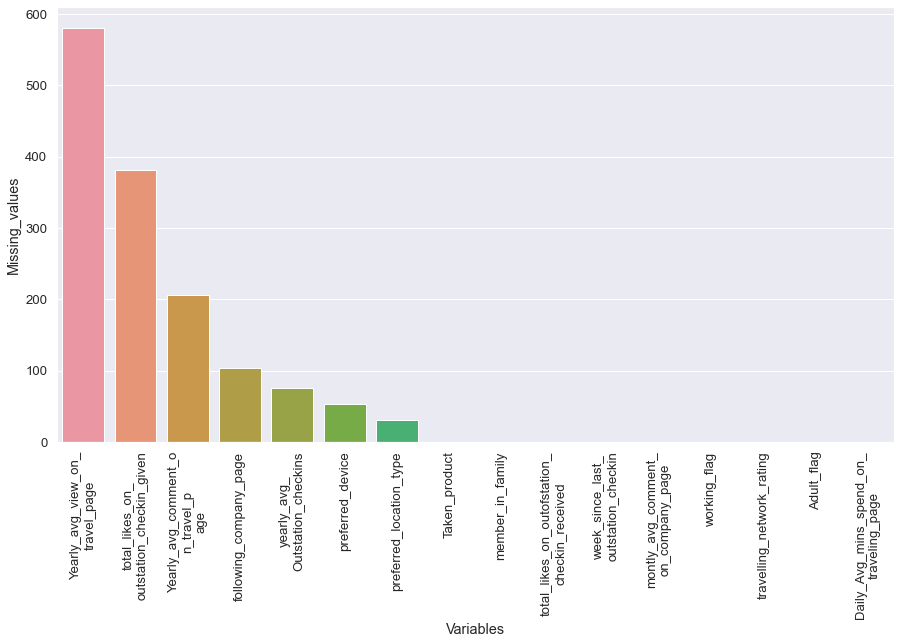

In [10]:
# Plotting the number of missing values per variable


fig,axes = plt.subplots(figsize=(15,8))
sns.barplot(x='Variables',y='Missing_values',data=missing.sort_values(by='Missing_values',ascending=False))
axes.set_xticklabels(labels =['Yearly_avg_view_on_\ntravel_page',
 'total_likes_on_\noutstation_checkin_given',
 'Yearly_avg_comment_o\nn_travel_p\nage',
 'following_company_page',
 'yearly_avg_\nOutstation_checkins',
 'preferred_device',
 'preferred_location_type',
 'Taken_product',
 'member_in_family',
 'total_likes_on_outofstation_\ncheckin_received',
 'week_since_last_\noutstation_checkin',
 'montly_avg_comment_\non_company_page',
 'working_flag',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_\ntraveling_page'] ,rotation=90)
plt.show()

In [11]:
round(user_data.isnull().sum() / len(user_data),3).sort_values()

Taken_product                                   0.000
member_in_family                                0.000
total_likes_on_outofstation_checkin_received    0.000
week_since_last_outstation_checkin              0.000
montly_avg_comment_on_company_page              0.000
working_flag                                    0.000
travelling_network_rating                       0.000
Adult_flag                                      0.000
Daily_Avg_mins_spend_on_traveling_page          0.000
preferred_location_type                         0.003
preferred_device                                0.005
yearly_avg_Outstation_checkins                  0.006
following_company_page                          0.009
Yearly_avg_comment_on_travel_page               0.018
total_likes_on_outstation_checkin_given         0.032
Yearly_avg_view_on_travel_page                  0.049
dtype: float64

In [12]:
print('Number of Rows with atleast 1 missing values: ',user_data[user_data.isnull().sum(axis=1)>0].shape[0])

Number of Rows with atleast 1 missing values:  1304


In [13]:
print('Percentage of Rows with atleast 1 missing values: {}%'.format(round((user_data[user_data.isnull().sum(axis=1)>0].shape[0] / user_data.shape[0])*100,2)))

Percentage of Rows with atleast 1 missing values: 11.09%


In [14]:
print("Total Missing value proportion in the given data",round(user_data.isnull().sum().sum() / user_data.size,4))

Total Missing value proportion in the given data 0.0076


- 5 columns has missing values. However missing values are not more than 5% of each column observations.
- Except 'following_company_page' variable all other variables are of continuous data type.
- 1304 rows has atleast 1 missing value, which is 11% of the total observations.
- And overall there are <1% of the missing values in the dataset.

In [15]:
round(user_data.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
Yearly_avg_view_on_travel_page,11179.0,280.831,68.183,35.0,232.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,11379.0,28170.482,14385.032,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_comment_on_travel_page,11554.0,74.790,24.027,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6531.699,4706.614,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.204,2.616,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,28.662,48.661,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,11760.0,2.712,1.081,1.0,2.00,3.0,4.00,4.0
Adult_flag,11760.0,0.794,0.852,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,13.817,9.071,0.0,8.00,12.0,18.00,270.0


In [16]:
user_data.describe(include=['object']).T

,count,unique,top,freq
Taken_product,11760,2,No,9864
preferred_device,11707,10,Tab,4172
yearly_avg_Outstation_checkins,11685,30,1,4543
member_in_family,11760,7,3,4561
preferred_location_type,11729,15,Beach,2424
following_company_page,11657,4,No,8355
working_flag,11760,2,No,9952


In [17]:
user_data['travelling_network_rating'].value_counts()

3    3672
4    3456
2    2424
1    2208
Name: travelling_network_rating, dtype: int64

In [18]:
user_data['Adult_flag'].value_counts()

0    5048
1    4768
2    1264
3     680
Name: Adult_flag, dtype: int64

- The variable 'Adult_flag' must have only binary value, whether the user is an adult: Yes or No. However, it has 2 and 3 as their values.
- Values can be imputed as such **0** is not adult and anything other than that shall be adult.

#### Converting 'Adult_flag','week_since_last_outstation_checkin' and 'travelling_network_rating' into 'object' datatype as it is a categorical variable.

In [19]:
user_data['travelling_network_rating'] = user_data['travelling_network_rating'].astype('object')
user_data['week_since_last_outstation_checkin'] = user_data['week_since_last_outstation_checkin'].astype('object')
user_data['Adult_flag'] = user_data['Adult_flag'].astype('object')

### Summary Statistics

In [20]:
round(user_data.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
Yearly_avg_view_on_travel_page,11179.0,280.831,68.183,35.0,232.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,11379.0,28170.482,14385.032,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_comment_on_travel_page,11554.0,74.790,24.027,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6531.699,4706.614,1009.0,2940.75,4948.0,8393.25,20065.0
montly_avg_comment_on_company_page,11760.0,28.662,48.661,11.0,17.00,22.0,27.00,500.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,13.817,9.071,0.0,8.00,12.0,18.00,270.0


- Few of the variable has larger difference in mean and median(50%) thus only few variables has outliers.
- 'travelling_network_rating' and 'Adult_flag' seems to be categorical column. But listed as numerical data which has to be convereted as categorical column.

In [21]:
user_data.describe(include='object').T

,count,unique,top,freq
Taken_product,11760,2,No,9864
preferred_device,11707,10,Tab,4172
yearly_avg_Outstation_checkins,11685,30,1,4543
member_in_family,11760,7,3,4561
preferred_location_type,11729,15,Beach,2424
week_since_last_outstation_checkin,11760,12,1,3070
following_company_page,11657,4,No,8355
working_flag,11760,2,No,9952
travelling_network_rating,11760,4,3,3672
Adult_flag,11760,4,0,5048


- There are more number of customer who are not taken the products that customer who took the product as per target variable 'Taken_product'
- Majority of people's preferred device is 'Tab'.
- Most preferred location shall be 'Beach'.
- Majority of the family has 3 members as per given dataset.
- With the given data we can see it consist of more non-working people.
- Most of the users are with the outstation checkins within 1 week.

In [22]:
num = user_data.select_dtypes(exclude=['object']).columns
cat = user_data.select_dtypes(exclude=['int64','float64']).columns

In [23]:
user_data.groupby(user_data['Taken_product'])[num].mean()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page
Taken_product,,,,,,
No,285.438207,28517.944258,74.848106,6861.478609,28.64852,14.386963
Yes,256.966280,26363.298093,74.487923,4816.010549,28.72943,10.854430


In [24]:
user_data.groupby(user_data['Taken_product'])[cat.drop('Taken_product')].count()

,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,week_since_last_outstation_checkin,following_company_page,working_flag,travelling_network_rating,Adult_flag
Taken_product,,,,,,,,,
No,9821,9799,9864,9836,9864,9778,9864,9864,9864
Yes,1886,1886,1896,1893,1896,1879,1896,1896,1896


### 2. c) Understanding of attributes (variable info, renaming if required)

In [25]:
for c in cat:
    print(f'Value count of "{c}"')
    print(user_data[c].value_counts())
    print()

Value count of "Taken_product"
No     9864
Yes    1896
Name: Taken_product, dtype: int64

Value count of "preferred_device"
Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Other                 2
Others                2
Name: preferred_device, dtype: int64

Value count of "yearly_avg_Outstation_checkins"
1     4543
2      844
10     682
9      340
7      336
3      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
29     215
23     215
18     208
15     206
26     199
20     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
*        1
Name: yearly_avg_Outstation_checkins, dtype: int64

Value count of "member_in_family"
3        4561
4        3184
2        2256
1        1349
5         384
Three      15
10         11
Name: member_in_family, dtype: int64

- There are few redenduncies and improper data present in the few columns.
- **preferred_device** : Has three different 'Androids', two different 'others' present.
- **yearly_avg_Outstation_checkins**: There is a Wildcharacter (*)
- **member_in_family**: Has 'three' as string.
- **following_company_page**: Has both 'yes / no' and 0/1

### Targe variable : Class proportion

In [26]:
user_data['Taken_product'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Taken_product, dtype: float64

## Data Wrangling

In [27]:
user_data['preferred_device'].value_counts()

Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Other                 2
Others                2
Name: preferred_device, dtype: int64

In [28]:
# user_data.loc[user_data['preferred_device']=='Laptop'].value_counts('Taken_product',normalize=True)

In [29]:
# user_data[user_data['preferred_device'].isin(['Tab','iOS and Android','iOS','Mobile','Android','Android OS','ANDROID','Other','Others'])].value_counts('Taken_product',normalize=True)

In [30]:
#Cleaning redundant values
user_data['preferred_device'] = user_data['preferred_device'].replace(dict.fromkeys(['Android OS','ANDROID','Tab','iOS and Android','iOS','Android','Others','Other'],'Mobile'))
user_data['preferred_device'].value_counts()

Mobile    10599
Laptop     1108
Name: preferred_device, dtype: int64

In [31]:
#Replace the '*' with the most frequent value (mode)
user_data['yearly_avg_Outstation_checkins'] = np.where(user_data['yearly_avg_Outstation_checkins']=='*'
                                                                ,user_data['yearly_avg_Outstation_checkins'].mode()
                                                                ,user_data['yearly_avg_Outstation_checkins'])

#### Converting  'yearly_avg_Outstation_checkins' as 'float' i.e. continuous datatype

In [32]:
user_data['yearly_avg_Outstation_checkins'] = user_data['yearly_avg_Outstation_checkins'].astype('float64')

In [33]:
#Replace 'Three' with the numerical value '3'
user_data['member_in_family'] = np.where(user_data['member_in_family']=='Three','3',user_data['member_in_family'])
user_data['member_in_family'].value_counts()

3     4576
4     3184
2     2256
1     1349
5      384
10      11
Name: member_in_family, dtype: int64

In [34]:
#Combine two different Tour and Travel
user_data['preferred_location_type'] = user_data['preferred_location_type'].replace({'Tour  Travel':'Tour and Travel'})
user_data['preferred_location_type'].value_counts()

Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour and Travel     107
Game                 12
OTT                   7
Movie                 5
Name: preferred_location_type, dtype: int64

In [35]:
#Replace '1' to 'Yes' and '0' to 'No' based on its proportion
user_data['following_company_page'] = user_data['following_company_page'].replace({'1':'Yes','0':'No'})
user_data['following_company_page'].value_counts()

No     8360
Yes    3297
Name: following_company_page, dtype: int64

In [36]:
user_data['Adult_flag'] = user_data['Adult_flag'].replace(dict.fromkeys([2,3],1)).astype('object')
user_data['Adult_flag'].value_counts()

1    6712
0    5048
Name: Adult_flag, dtype: int64

In [37]:
# pd.crosstab(user_data['Adult_flag'],user_data['working_flag'],normalize='index').plot.bar(stacked=True)

## 3. Exploratory Data Analysis

In [38]:
num = user_data.select_dtypes(exclude=['object']).columns
cat = user_data.select_dtypes(exclude=['int64','float64']).columns

In [39]:
print(num.nunique())
print(cat.nunique())

7
9


#### 3.a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)

Text(0.5, 1.0, 'Distribution of Numerical Variable')

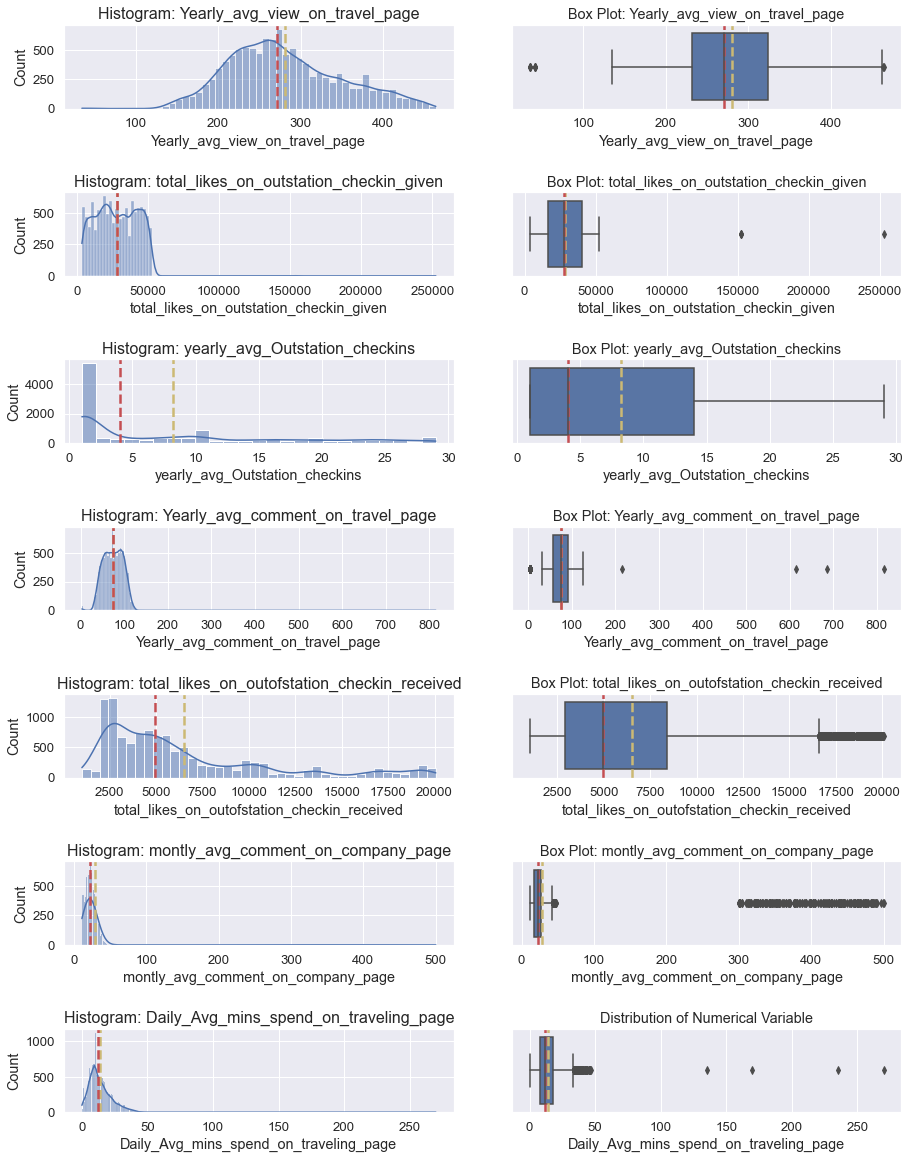

In [40]:
fig,axes = plt.subplots(7,2,figsize=(15,20))
plt.subplots_adjust(hspace=1,wspace=0.15)
for c,a in zip(num,axes):
        sns.histplot(x=user_data[c],kde=True,ax=a[0])
        a[0].set_title("Histogram: "+c,fontsize=16)
        a[0].axvline(x=user_data[c].mean(),linestyle='--',linewidth=2.5,color='y')
        a[0].axvline(x=user_data[c].median(),linestyle='--',linewidth=2.5,color='r')
        sns.boxplot(x=user_data[c],ax=a[1])
        a[1].set_title("Box Plot: "+c)
        a[1].axvline(x=user_data[c].mean(),linestyle='--',linewidth=2.5,color='y')
        a[1].axvline(x=user_data[c].median(),linestyle='--',linewidth=2.5,color='r')
plt.title("Distribution of Numerical Variable")
        #plt.tight_layout()

- Yearly average views on Travel pages is normally distributed with most number of views are aroung 250 to 300 views.
- Other than that all the variables are right skewed with outliers.
- total_likes_on_outstation_checkins_given, yearly_avg_comment_on_travel_page, montly_avg_comment_on_company_page and Daily_avg_mins_spend_on_traveling_page has very few extreme values at the upper band thus all are right skewed.
- Majority user has the yearly average outstation checkins below 5.
- Likewise, monthly average comments on company pages is also less than 50 for most of the users.
- Likes given on outstation check in has even distribution of users across different bucket of likes.


- yearly_avg_view_on_travel_page has very few outliers and normally distributed.
- total_likes_on_outstation_checkin_given also evenly distrbuted with only very few outliers at the upper limit which are significantly higher than the other values.
- yearly_avg_comment_on_travel_page is also has only few outliers which can be treated.
- monthly_avg_comment_on_company_page and Daily_Avg_mins_spend_on_travelling_page has whole group of outliers at the upper range.

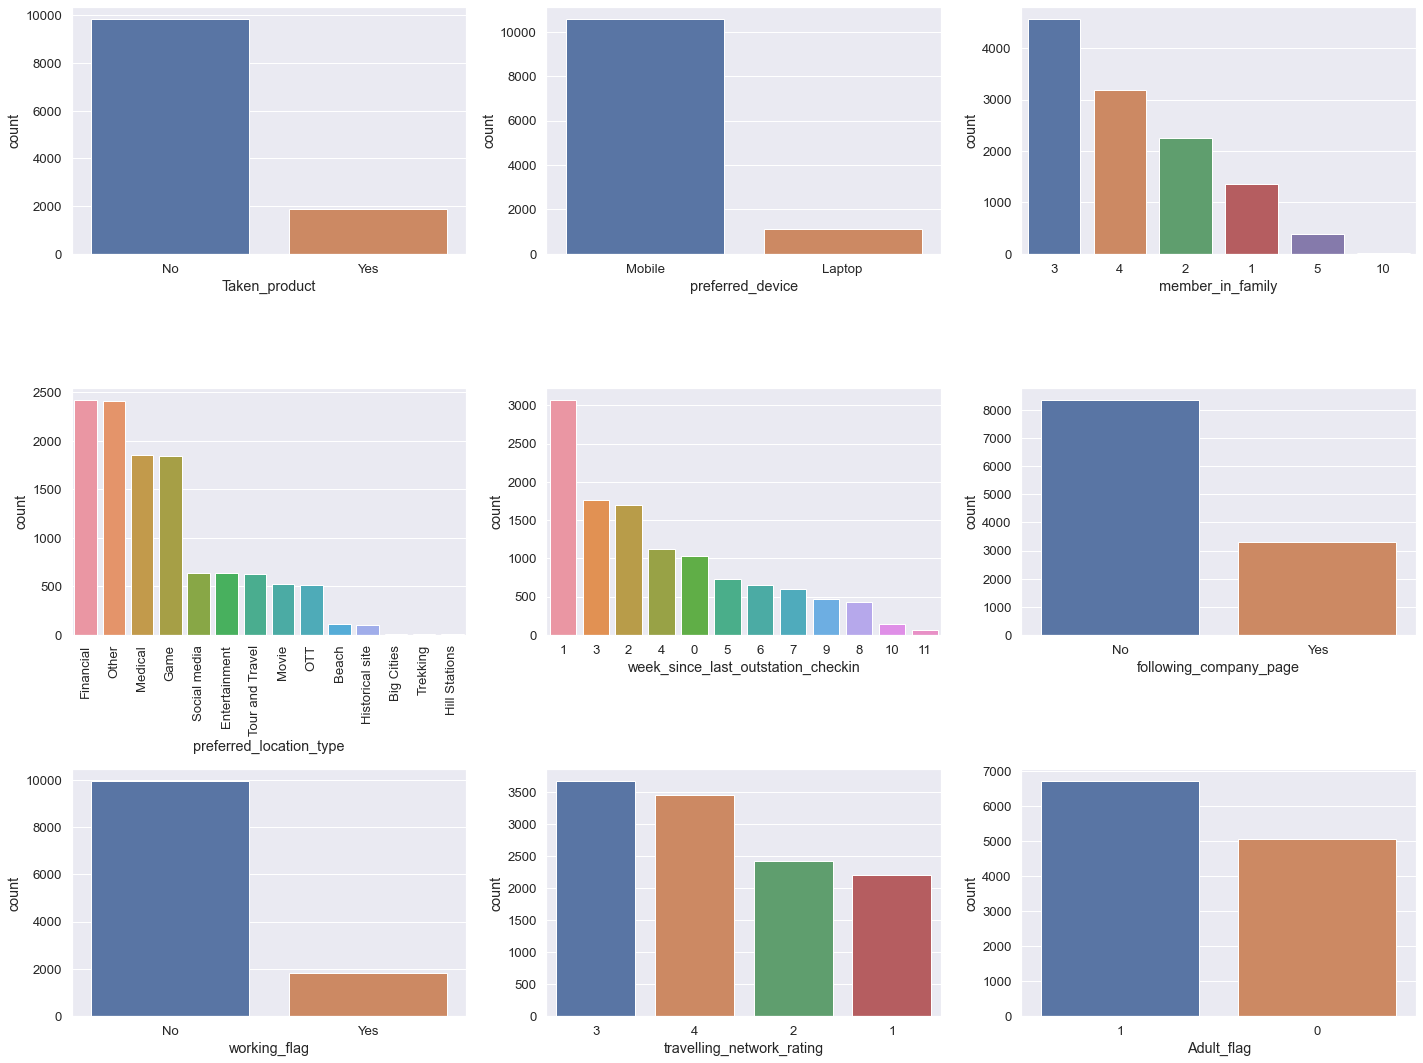

In [41]:
fig,axes = plt.subplots(3,3,figsize=(20,15))
for c,a in zip(cat,axes.flatten()):
    sns.countplot(x=user_data[c],ax=a,order=user_data[c].value_counts().index)
    if c == 'preferred_location_type':
        a.set_xticklabels(labels=['Financial', 'Other', 'Medical', 'Game', 'Social media',
       'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Beach',
       'Historical site', 'Big Cities', 'Trekking', 'Hill Stations'],rotation=90)
    plt.tight_layout()

- User's most preferred device is mobile devices (Tab, iOS, Android)
- Most of the users have a medium size family with 3 members.
- User's most preferred location type is Financial, which means that many may went for a business trip, which then followed by other (undisclosed) and Medical & Game. The least preferred location type would be hill station.
- Many of the users have very recent outstation checkin, within in 1 week or less. Indicates that many of the given users had a recent travel.
- Given data has more number of users who are not following the company's social medial page.
- Surpisingly we have larger number of users with no-work flag, which needs to be furthur analysed with preferred location type, adult flag and Product taken to understand better who are out targeted customers.
- Majority of the users with travelling network rating as 3 and 4 which indicates that many of the users doesn't have network of travellers.

#### 3. b) Bivariate analysis (relationship between different variables , correlations)	

In [42]:
import textwrap

In [43]:
labels = ['Financial', 'Other', 'Medical', 'Game', 'Social media',
       'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Beach',
       'Historical site', 'Big Cities', 'Trekking', 'Hill Stations']
type(labels)

list

In [44]:
ls =[]
for l in labels:
    ls.append(textwrap.fill(l,width=10,break_long_words=False))
ls

['Financial',
 'Other',
 'Medical',
 'Game',
 'Social\nmedia',
 'Entertainment',
 'Tour and\nTravel',
 'Movie',
 'OTT',
 'Beach',
 'Historical\nsite',
 'Big Cities',
 'Trekking',
 'Hill\nStations']

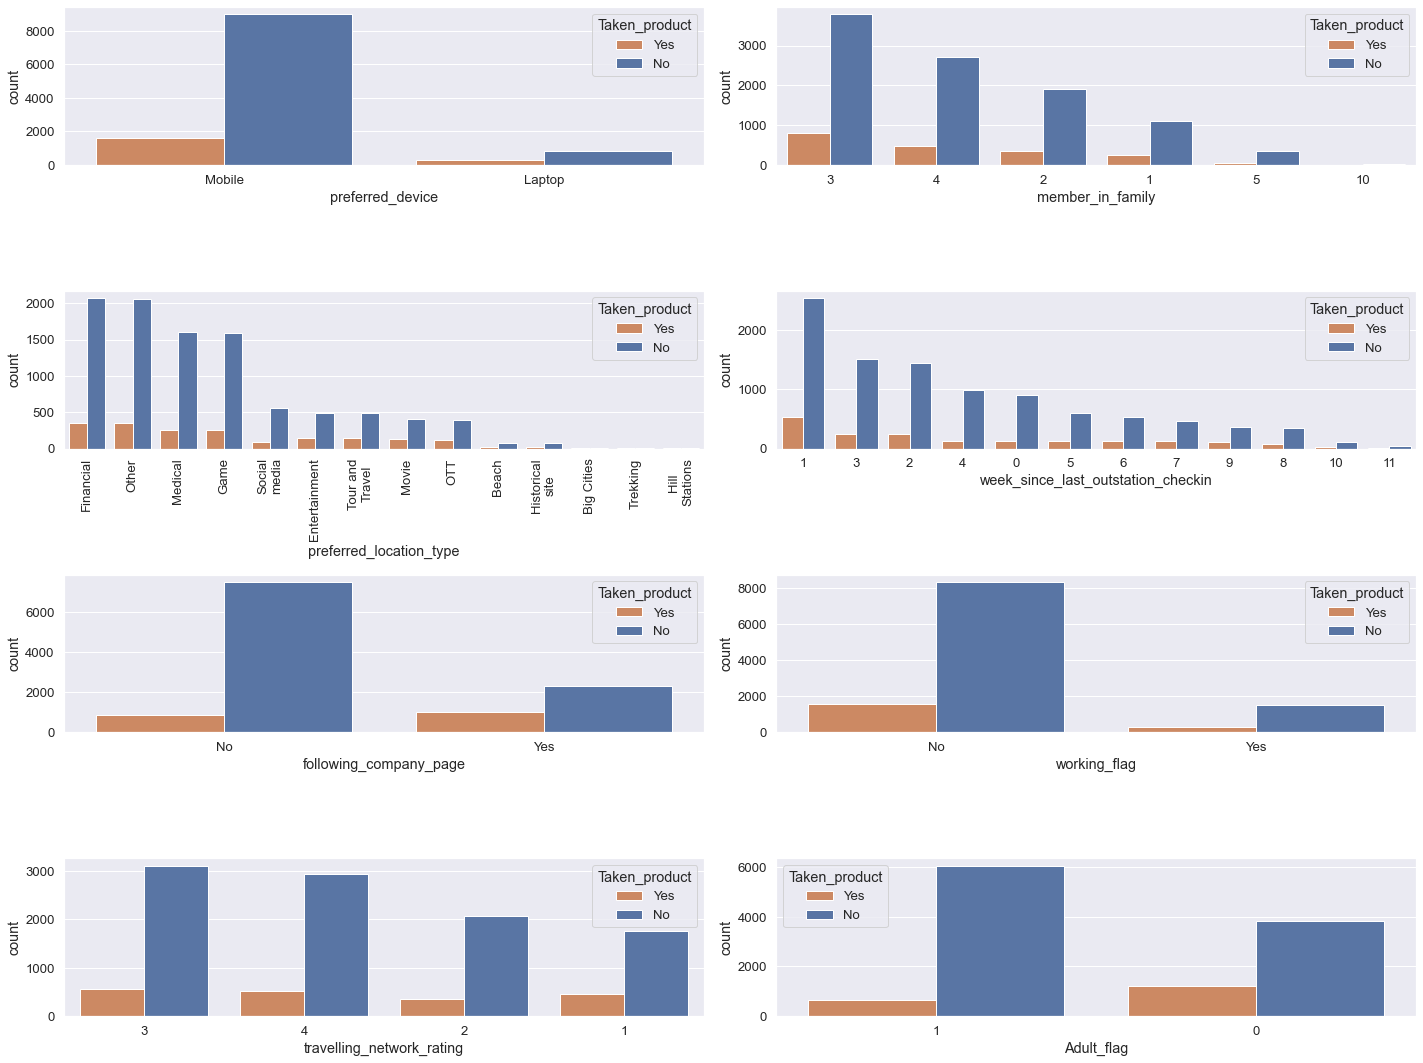

In [45]:
fig,axes = plt.subplots(4,2,figsize=(20,15))
for c,a in zip(cat.drop('Taken_product'),axes.flatten()):
    sns.countplot(x=c,data=user_data,hue='Taken_product',ax=a,order=user_data[c].value_counts().index,palette={'Yes':'C1','No':'C0'})
    if c == 'preferred_location_type':
        a.set_xticklabels(ls, rotation=90)
    plt.tight_layout()

/var/folders/pc/78yk54bj3jv7njrr40lv60w80000gn/T/ipykernel_15167/1535174656.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=['Financial', 'Other', 'Medical', 'Game', 'Social media',
/var/folders/pc/78yk54bj3jv7njrr40lv60w80000gn/T/ipykernel_15167/1535174656.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=['Financial', 'Other', 'Medical', 'Game', 'Social media',


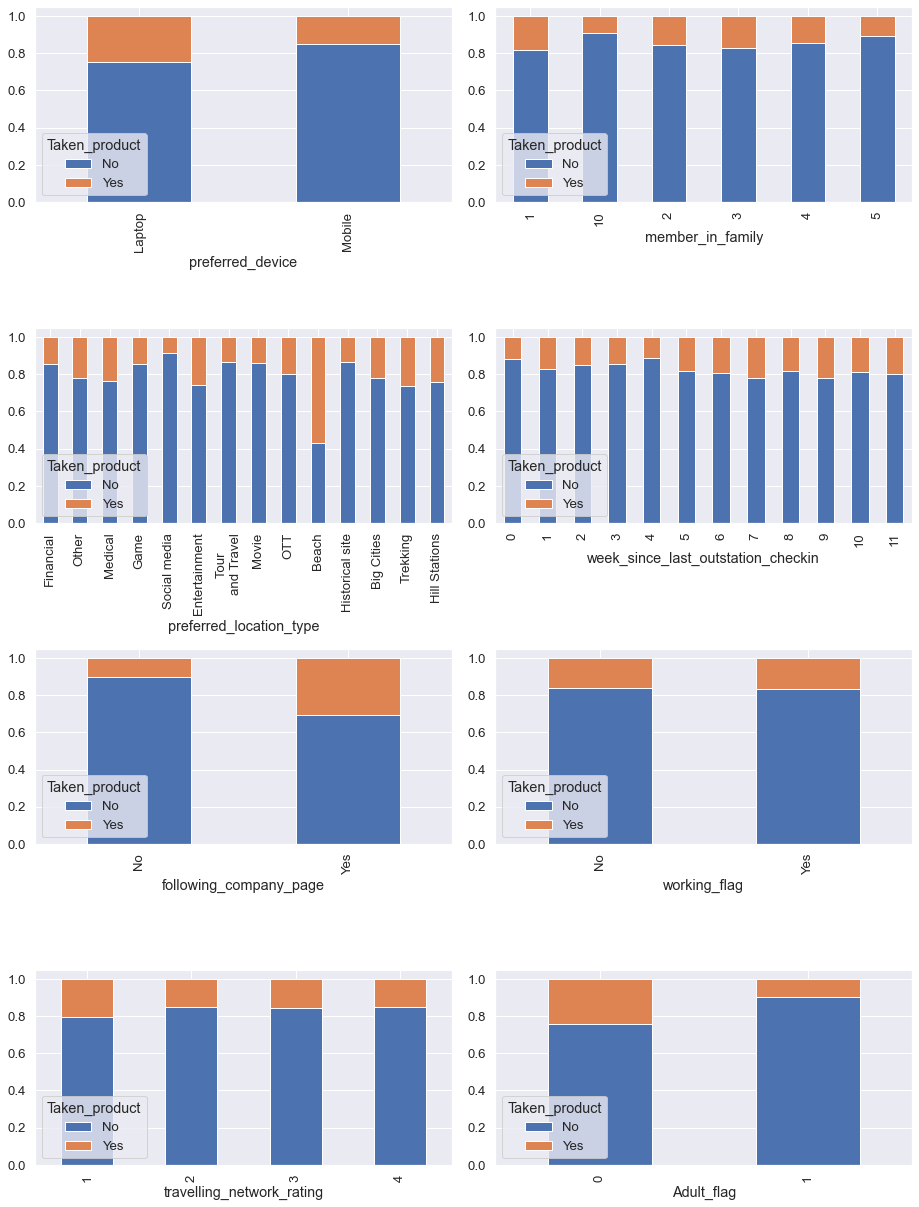

In [46]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(13,17))
# plt.subplots_adjust(hspace=0.75)
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
for c,a in zip(cat.drop('Taken_product'),axes):
    user_data.groupby(c)['Taken_product'].value_counts(normalize=True).unstack('Taken_product').plot(ax=a,kind='bar',stacked=True)
    ax3.set_xticklabels(labels=['Financial', 'Other', 'Medical', 'Game', 'Social media',
       'Entertainment', 'Tour \nand Travel', 'Movie', 'OTT', 'Beach',
       'Historical site', 'Big Cities', 'Trekking', 'Hill Stations'],rotation=90)
plt.tight_layout()

- Using Mobile or Laptop has a signifiance in target variable.
- Number of family member doesn't give any pattern on predicting the target variable.
- As the recency of the last outstation checkins increases chance of taking the product decreases.
- People who follow company's page doesn't give any significant difference in to predict the customer's who preferred the prodcut.
- However, people who are not working has better difference in target class prediction.

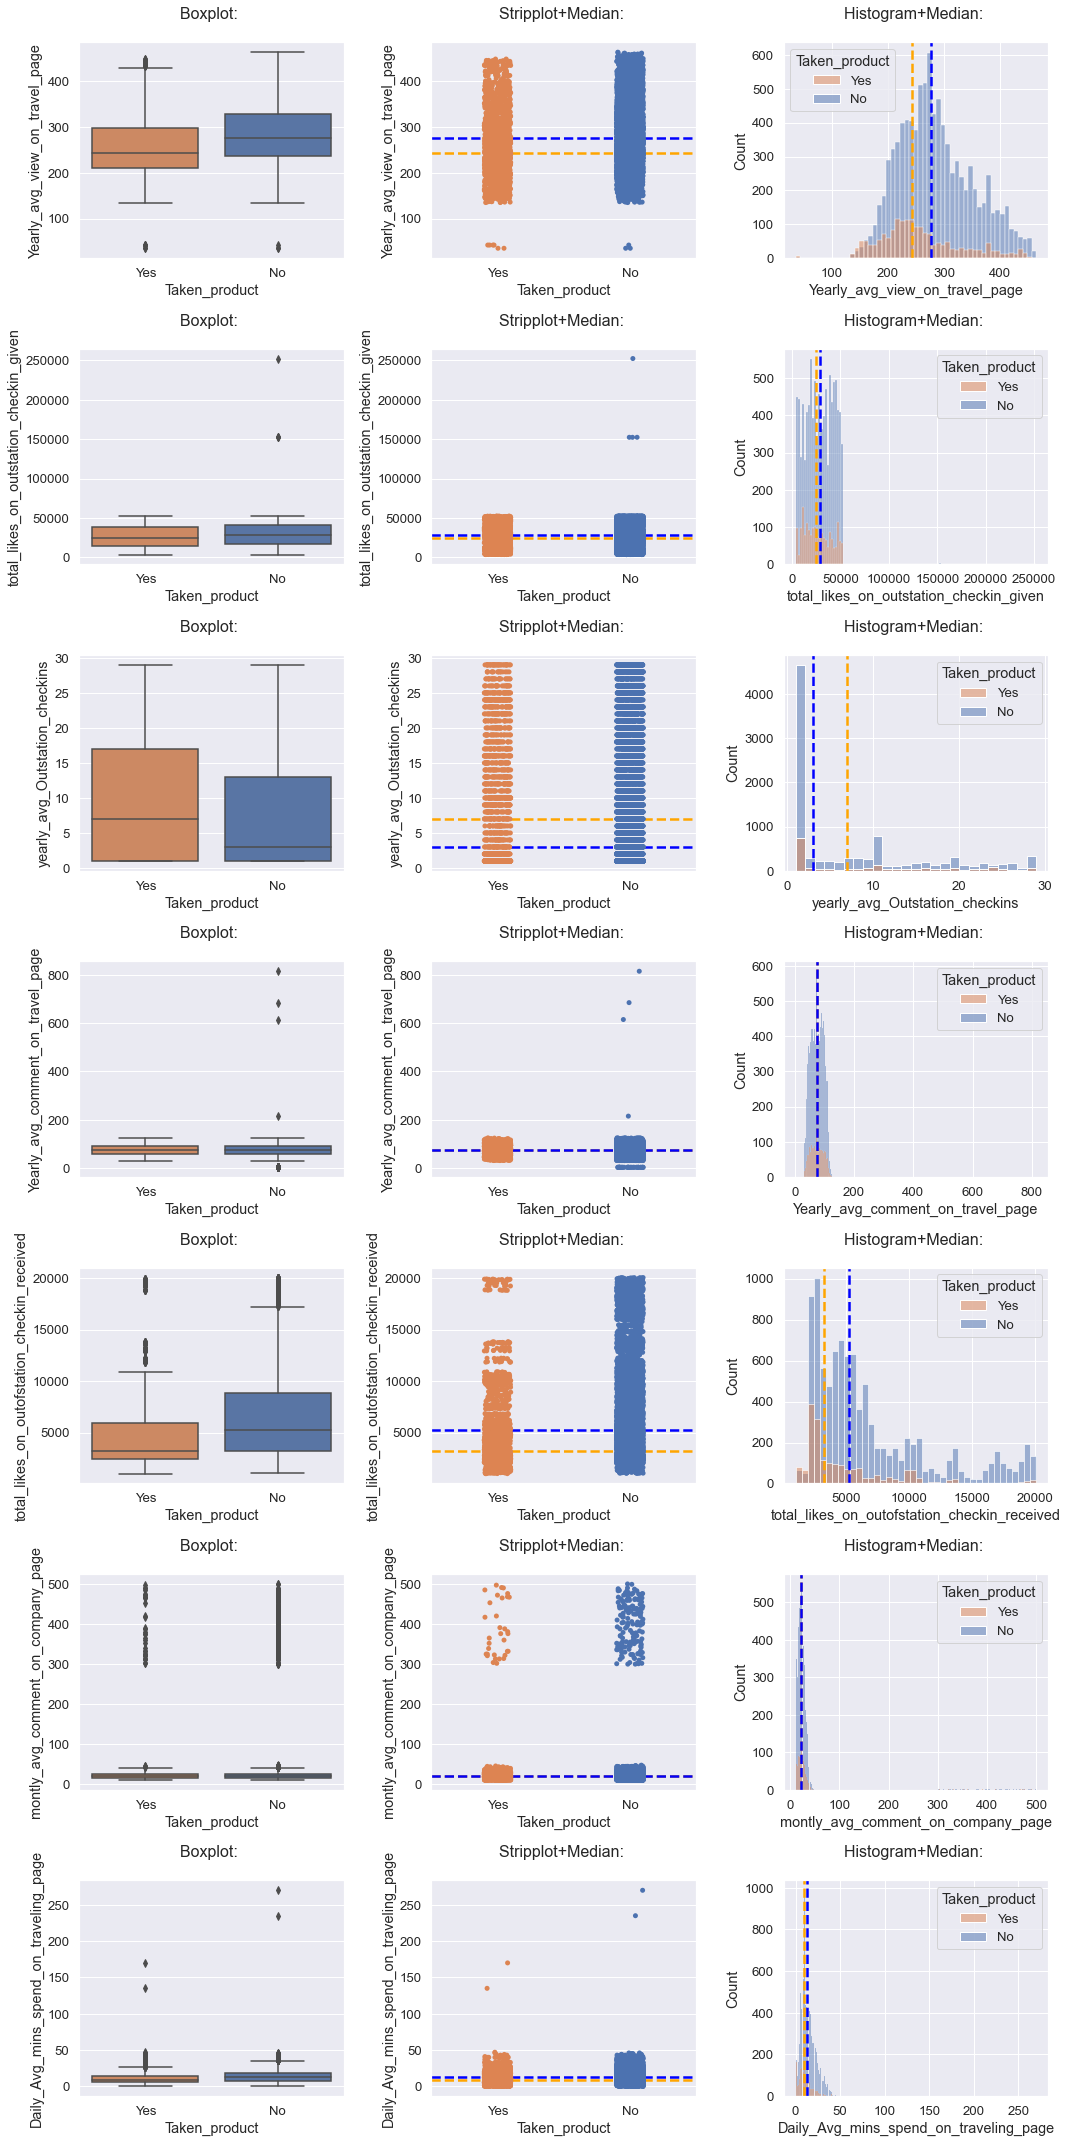

In [47]:
fig,axes = plt.subplots(7,3,figsize=(15,30))
for c,a in zip(num,axes):
    sns.boxplot(x=user_data['Taken_product'],y=user_data[c],ax=a[0],palette={'Yes':'C1','No':'C0'})
    a[0].set_title("Boxplot: \n",fontsize=16)
    sns.stripplot(x=user_data['Taken_product'],y=user_data[c],ax=a[1],palette={'Yes':'C1','No':'C0'})
    a[1].axhline(y=user_data[user_data['Taken_product']=='Yes'][c].median(),linestyle='--',linewidth=2.5,color='orange')
    a[1].axhline(y=user_data[user_data['Taken_product']=='No'][c].median(),linestyle='--',linewidth=2.5,color='blue')
    a[1].set_title("Stripplot+Median: \n",fontsize=16)
    sns.histplot(x=user_data[c],hue=user_data['Taken_product'],ax=a[2],palette={'Yes':'C1','No':'C0'})
    a[2].axvline(x=user_data[user_data['Taken_product']=='Yes'][c].median(),linestyle='--',linewidth=2.5,color='orange')
    a[2].axvline(x=user_data[user_data['Taken_product']=='No'][c].median(),linestyle='--',linewidth=2.5,color='blue')
    a[2].set_title("Histogram+Median: \n",fontsize=16)
    plt.tight_layout()

- Yearly_avg_view_on_travel_page, yearly_avg_outstation_checkins, total_likes_on_outstation_checkin_received makes a significant difference between the two classes of target variable.
- However, same is not the case with other continuous variables. They are very good at seperating the classes.

In [48]:
# fig = plt.figure(figsize=(20,10))
# g = sns.FacetGrid(user_data,col='travelling_network_rating',hue='following_company_page')
# g.map(plt.scatter,'Daily_Avg_mins_spend_on_traveling_page',
#                 'montly_avg_comment_on_company_page',alpha=0.5)
# g.add_legend()
# g.tight_layout()
# g.set_xlabels()
# plt.show()

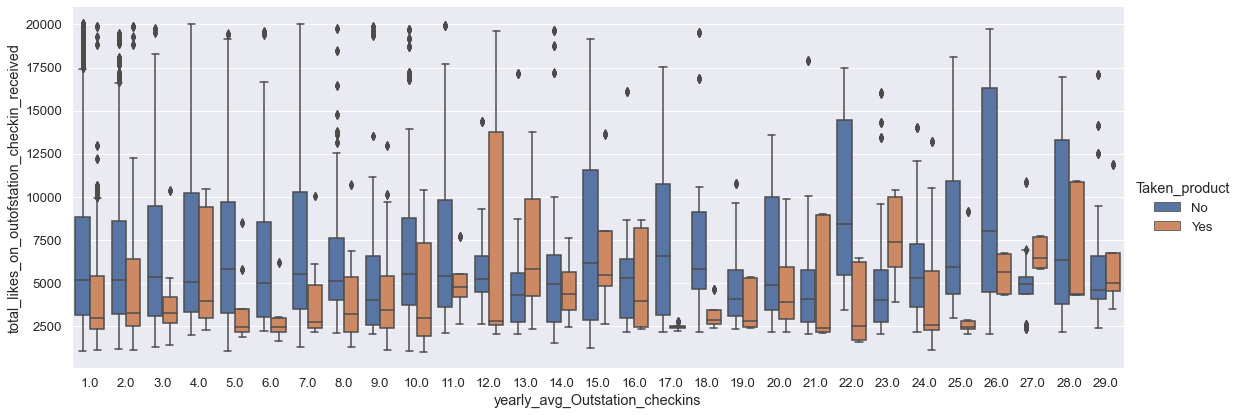

In [49]:
#Outstation Checkins vs Likes received compared to the Target variable
sns.catplot(x = 'yearly_avg_Outstation_checkins',y='total_likes_on_outofstation_checkin_received',
           data=user_data,kind='box',hue='Taken_product',height=6,aspect=16/6,hue_order=['No','Yes'])
plt.show()

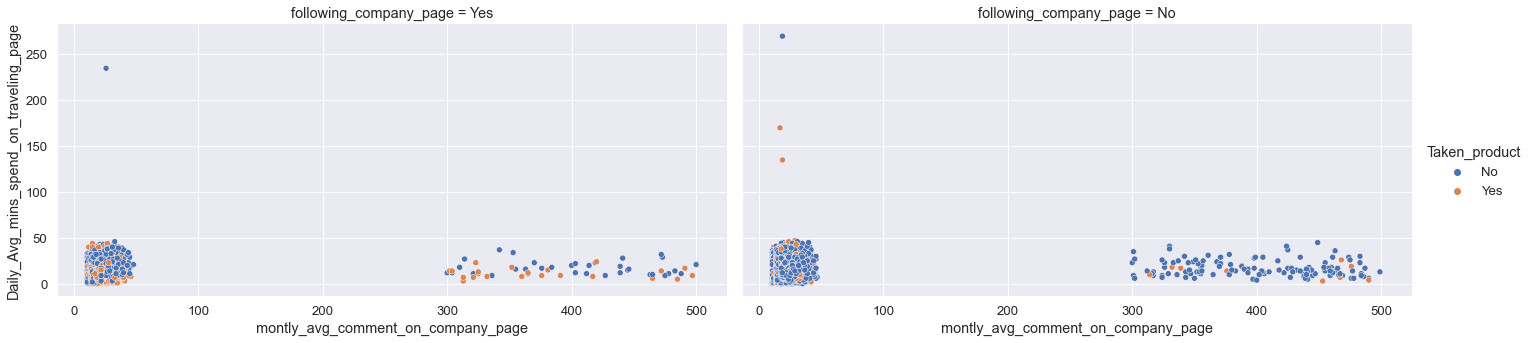

In [50]:
sns.relplot(x='montly_avg_comment_on_company_page',y='Daily_Avg_mins_spend_on_traveling_page',
            data=user_data,col='following_company_page',hue='Taken_product',
            hue_order=['No','Yes'],
            height=5,aspect=2)

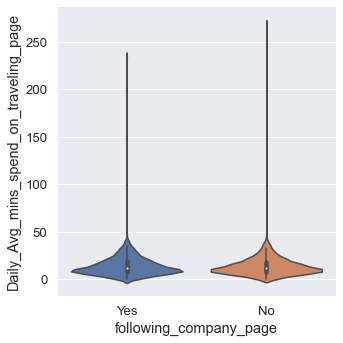

In [51]:
sns.catplot(x='following_company_page',y='Daily_Avg_mins_spend_on_traveling_page',data=user_data,kind='violin')

In [52]:
user_data[user_data['Taken_product']=='No']['yearly_avg_Outstation_checkins'].median()

3.0

In [53]:
for i in num:
    print('Median of ',i,'for 1 ',user_data[user_data['Taken_product']=='Yes'][i].median())
    print('Median of ',i,'for 0',user_data[user_data['Taken_product']=='No'][i].median())

Median of  Yearly_avg_view_on_travel_page for 1  243.0
Median of  Yearly_avg_view_on_travel_page for 0 276.0
Median of  total_likes_on_outstation_checkin_given for 1  24511.0
Median of  total_likes_on_outstation_checkin_given for 0 28605.5
Median of  yearly_avg_Outstation_checkins for 1  7.0
Median of  yearly_avg_Outstation_checkins for 0 3.0
Median of  Yearly_avg_comment_on_travel_page for 1  74.0
Median of  Yearly_avg_comment_on_travel_page for 0 75.0
Median of  total_likes_on_outofstation_checkin_received for 1  3239.0
Median of  total_likes_on_outofstation_checkin_received for 0 5215.0
Median of  montly_avg_comment_on_company_page for 1  22.0
Median of  montly_avg_comment_on_company_page for 0 22.0
Median of  Daily_Avg_mins_spend_on_traveling_page for 1  9.0
Median of  Daily_Avg_mins_spend_on_traveling_page for 0 13.0


Text(0.5, 1.0, 'Correlation Heatmap\n')

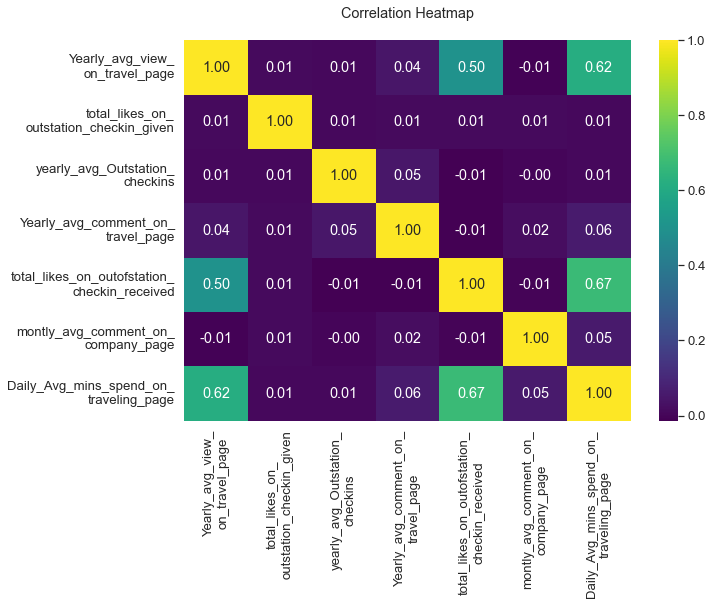

In [54]:
plt.figure(figsize=(10,7))
g = sns.heatmap(user_data.corr(),annot=True,fmt='.2f',cmap='viridis')
g.set_xticklabels(['Yearly_avg_view_\non_travel_page',
 'total_likes_on_\noutstation_checkin_given',
 'yearly_avg_Outstation_\ncheckins',
 'Yearly_avg_comment_on_\ntravel_page',
 'total_likes_on_outofstation_\ncheckin_received',
 'montly_avg_comment_on_\ncompany_page',
 'Daily_Avg_mins_spend_on_\ntraveling_page'],rotation=90)
g.set_yticklabels(['Yearly_avg_view_\non_travel_page',
 'total_likes_on_\noutstation_checkin_given',
 'yearly_avg_Outstation_\ncheckins',
 'Yearly_avg_comment_on_\ntravel_page',
 'total_likes_on_outofstation_\ncheckin_received',
 'montly_avg_comment_on_\ncompany_page',
 'Daily_Avg_mins_spend_on_\ntraveling_page'],rotation=0)
g.set_title("Correlation Heatmap\n")

- We cannot see any strong correlation between the variables. 
- Dail_avg_mins_spend_on_traveling_page and total_likes_on_outofstation_checkin_received has moderate postive correlation suggest that person who spends more time on traeling page has higer likes for their checkins.
- Interestingly monthly_avg_comment_on_company_page and yearly_average_view_on_travel_page is negatively correlated
- Also, yearly_avg_outstation_checkins and total_likes_on_outofstation_checkin_received is negatively correlated. Thus, the number of checkins are high tendency to recevie likes is low.
- However, the negative correlation are very weak correlation and doesn't show any strong relationship.


#### 3.a) Removal of unwanted variables (if applicable)

As of now there is not need of dropping any variables. Only variable we can get rid of is of UserID columns as it doesn't provide any information about the class of target variable.

#### 3.b) Missing Value treatment (if applicable)	

We shall use Median for continuous variables and mode for categorical variable to impute the missing values.

In [55]:
user_data['following_company_page'] = np.where(user_data['following_company_page'].isna(),user_data['following_company_page'].mode(),user_data['following_company_page'])
user_data['preferred_device'] = np.where(user_data['preferred_device'].isna(),user_data['preferred_device'].mode(),user_data['preferred_device'])
user_data['preferred_location_type'] = np.where(user_data['preferred_location_type'].isna(),user_data['preferred_location_type'].mode(),user_data['preferred_location_type'])

In [56]:
user_data['Yearly_avg_view_on_travel_page'] = np.where(user_data['Yearly_avg_view_on_travel_page'].isna(),user_data['Yearly_avg_view_on_travel_page'].median(),user_data['Yearly_avg_view_on_travel_page'])
user_data['total_likes_on_outstation_checkin_given'] = np.where(user_data['total_likes_on_outstation_checkin_given'].isna(),user_data['total_likes_on_outstation_checkin_given'].median(),user_data['total_likes_on_outstation_checkin_given'])
user_data['yearly_avg_Outstation_checkins'] = np.where(user_data['yearly_avg_Outstation_checkins'].isna(),user_data['yearly_avg_Outstation_checkins'].median(),user_data['yearly_avg_Outstation_checkins'])
user_data['Yearly_avg_comment_on_travel_page'] = np.where(user_data['Yearly_avg_comment_on_travel_page'].isna(),user_data['Yearly_avg_comment_on_travel_page'].median(),user_data['Yearly_avg_comment_on_travel_page'])


In [57]:
user_data.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

#### 3.d) Outlier treatment (if required)	

In [58]:
def remove_outliers(column):
    Q1,Q3 = column.quantile([0.25,0.75])
    IQR = Q3-Q1
    Upper_limit = Q3 + (1.5 * IQR)
    Lower_limit = Q1 - (1.5 * IQR)
    return Upper_limit,Lower_limit

In [59]:
for col in num:
    ur,lr = remove_outliers(user_data[col])
    user_data[col] = np.where(user_data[col]>ur, ur,user_data[col])
    user_data[col] = np.where(user_data[col]<lr, lr,user_data[col])

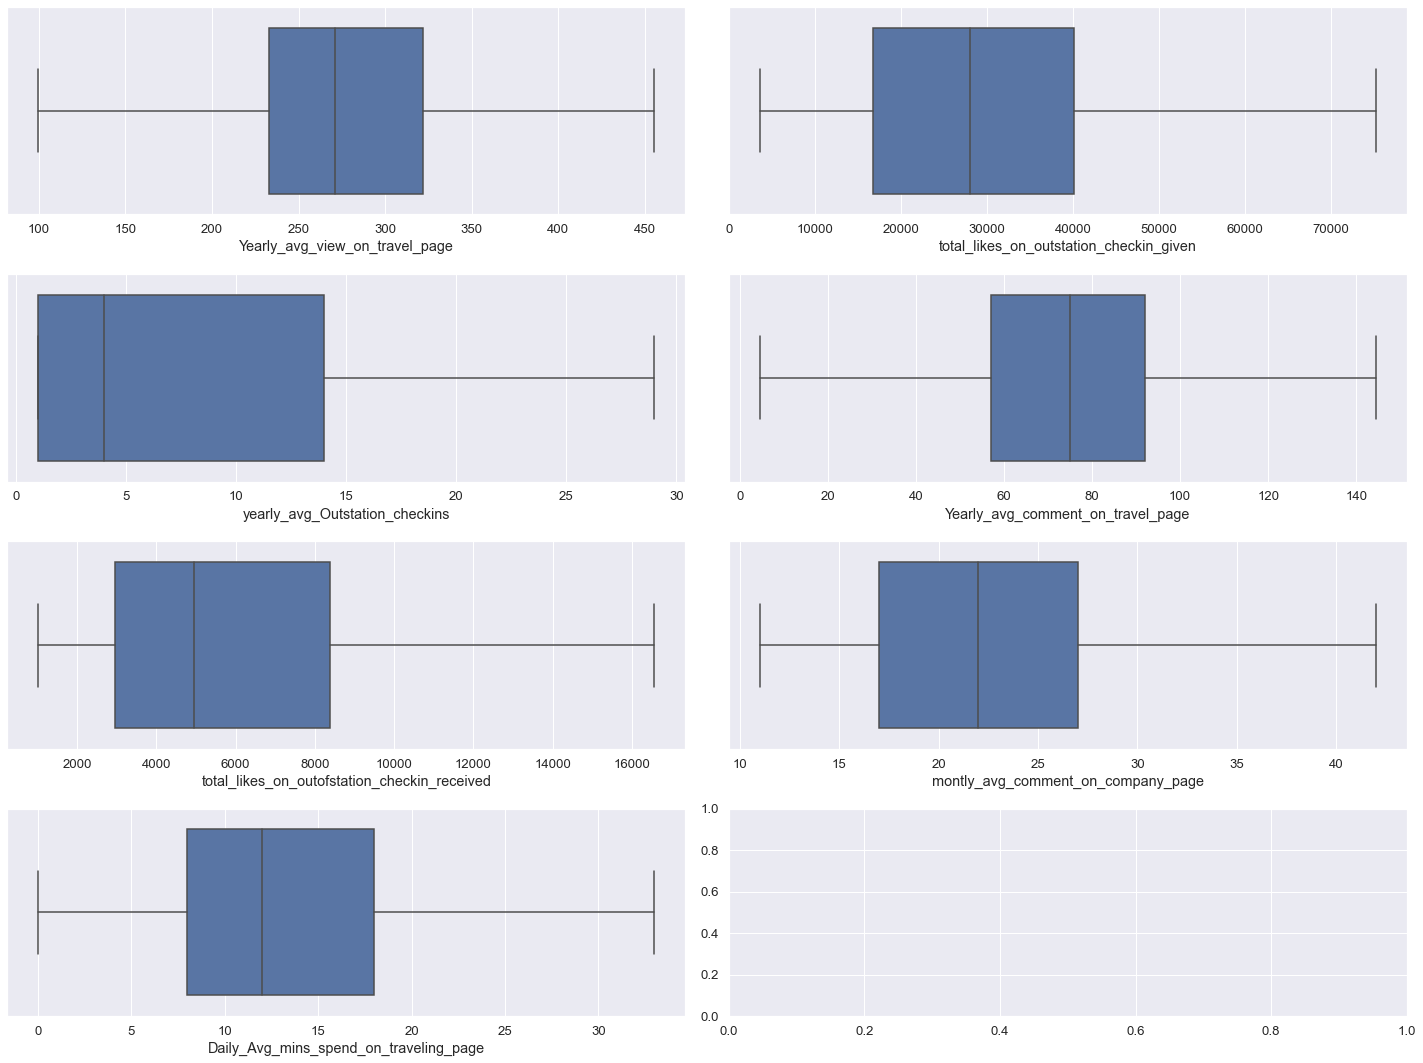

In [60]:
fig,axes = plt.subplots(4,2,figsize=(20,15))
for c,a in zip(num,axes.flatten()):
    sns.boxplot(x=user_data[c],ax=a)
    plt.tight_layout()

#### 3. e) Variable transformation (if applicable)	

In [61]:
#creating dummy variables for different categories of preferred location type as it is a nominal variable
user_data_encoded = pd.get_dummies(user_data,columns=['preferred_location_type'],drop_first=True)
user_data_encoded

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,preferred_location_type_Big Cities,preferred_location_type_Entertainment,preferred_location_type_Financial,preferred_location_type_Game,preferred_location_type_Hill Stations,preferred_location_type_Historical site,preferred_location_type_Medical,preferred_location_type_Movie,preferred_location_type_OTT,preferred_location_type_Other,preferred_location_type_Social media,preferred_location_type_Tour and Travel,preferred_location_type_Trekking
0,Yes,307.0,Mobile,38570.0,1.0,2,94.0,5993.0,8,Yes,11.0,No,1,0,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,No,367.0,Mobile,9765.0,1.0,1,61.0,5130.0,1,No,23.0,Yes,4,1,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Yes,277.0,Mobile,48055.0,1.0,2,92.0,2090.0,6,Yes,15.0,No,2,0,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,No,247.0,Mobile,48720.0,1.0,4,56.0,2909.0,1,Yes,11.0,No,3,0,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,No,202.0,Mobile,20685.0,1.0,1,40.0,3468.0,9,No,12.0,No,4,1,6.0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,No,279.0,Laptop,30987.0,23.0,2,58.0,2616.0,4,No,36.0,No,3,1,23.0,0,0,0,0,0,1,0,0,0,0,0,0,0
11756,No,305.0,Mobile,21510.0,6.0,1,55.0,10041.0,4,No,30.0,No,1,1,11.0,0,0,0,0,0,1,0,0,0,0,0,0,0
11757,No,214.0,Mobile,5478.0,4.0,3,103.0,6203.0,3,Yes,40.0,Yes,2,1,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0
11758,No,382.0,Laptop,35851.0,2.0,3,83.0,5444.0,3,No,32.0,No,4,0,20.0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [62]:
print(user_data['Taken_product'].value_counts())
print()
print(user_data['following_company_page'].value_counts())
print()
print(user_data['working_flag'].value_counts())
print()


No     9864
Yes    1896
Name: Taken_product, dtype: int64

No     8463
Yes    3297
Name: following_company_page, dtype: int64

No     9952
Yes    1808
Name: working_flag, dtype: int64



In [63]:
#Converting the 'Yes' 'No' value as binary '1's and '0's
user_data_encoded['Taken_product'] = np.where(user_data_encoded['Taken_product']=='Yes',1,0)
user_data_encoded['following_company_page'] = np.where(user_data_encoded['following_company_page']=='Yes',1,0)
user_data_encoded['working_flag'] = np.where(user_data_encoded['working_flag']=='Yes',1,0)

In [64]:
print(user_data_encoded['Taken_product'].value_counts())
print()
print(user_data_encoded['following_company_page'].value_counts())
print()
print(user_data_encoded['working_flag'].value_counts())
print()

0    9864
1    1896
Name: Taken_product, dtype: int64

0    8463
1    3297
Name: following_company_page, dtype: int64

0    9952
1    1808
Name: working_flag, dtype: int64



In [65]:
user_data_encoded['Adult_flag'] = user_data_encoded['Adult_flag'].astype('int64')
user_data_encoded['member_in_family'] = user_data_encoded['member_in_family'].astype('int64')
user_data_encoded['week_since_last_outstation_checkin'] = user_data_encoded['week_since_last_outstation_checkin'].astype('int64')
user_data_encoded['travelling_network_rating'] = user_data_encoded['travelling_network_rating'].astype('int64')

In [66]:
# user_data_encoded.info()

In [67]:
user_data_encoded.dtypes[user_data_encoded.dtypes=='object']


preferred_device    object
dtype: object

### Feature Engineering

#### 3.f) Addition of new variables (if required)	
New variable 'Popularity' based on average number of likes per each outstation check ins can be created in order to find the most infulential users buy dividing the values into 4 bukets 
- 0-500 likes per check-in as 1 (Ordinary User), 
- 501-5000 likes per check-in as 2 (Moderate User), 
- 50001-12500 likes per check-in as 3 (Popular user), 
- '>12500 as 4 (Infulencer).

Based on this user's popularity we can check whether their popularity status infulence in the converting them as a customer to taken the compnay's product.

In [68]:
user_data_encoded['Popularity_Score'] = user_data_encoded['total_likes_on_outofstation_checkin_received'] / user_data_encoded['yearly_avg_Outstation_checkins']
user_data_encoded['Popularity_Score'].head()


0    5993.0
1    5130.0
2    2090.0
3    2909.0
4    3468.0
Name: Popularity_Score, dtype: float64

<AxesSubplot:xlabel='Popularity_Score', ylabel='Count'>

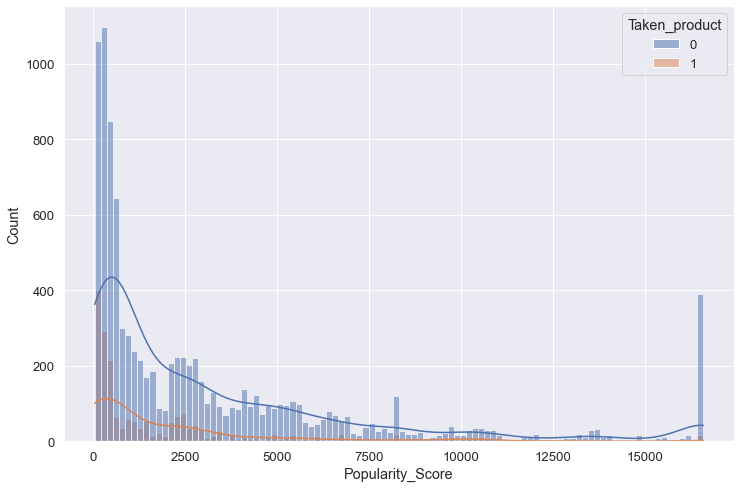

In [69]:
plt.figure(figsize=(12,8))
sns.histplot(x=user_data_encoded['Popularity_Score'],bins=100,
             kde=True,hue=user_data_encoded['Taken_product'])

In [70]:
#Let's give labels for the each bucket of users based on their popularity scores
user_data_encoded['Popularity'] = pd.cut(user_data_encoded['Popularity_Score'],bins=[0,500,5000,12500,20000],labels=[1,2,3,4])
user_data_encoded['Popularity'].value_counts()

2    5644
1    3672
3    1824
4     620
Name: Popularity, dtype: int64

New variable 'Traveller' based on yearly average number of outstation check-ins can be created in order to find the most frequent travellers buy dividing the values into 3 bukets 
- <=2 average check-ins per year  as 1 (Not a traveller), 
- 3-10 average check-ins per year as 2 (Moderate traveller), 
- 11-29 average check-ins per year as 3 (Frequent traveller)

Based on this user's travel frequency we can check whether their frequent travel and popularity status infulence in the converting them as a customer to taken the compnay's product.

<AxesSubplot:xlabel='yearly_avg_Outstation_checkins', ylabel='Count'>

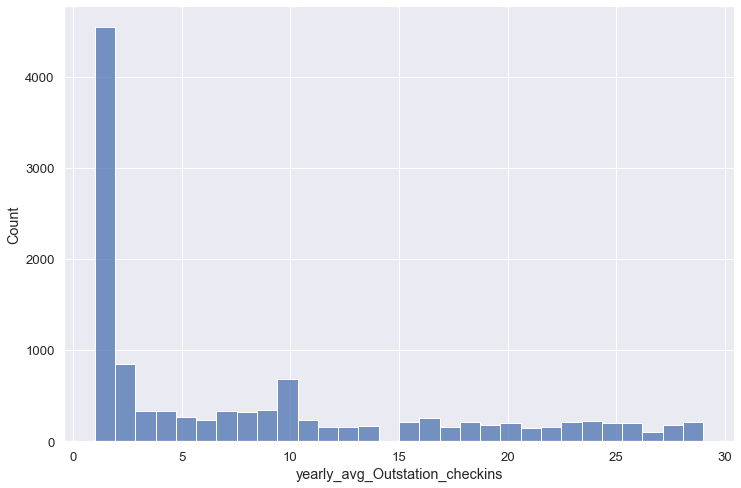

In [71]:
plt.figure(figsize=(12,8))
sns.histplot(user_data_encoded['yearly_avg_Outstation_checkins'],bins=30)

In [72]:
#Let's give labels for the each bucket of users based on their frequency of travel
user_data_encoded['Traveller'] = pd.cut(user_data_encoded['yearly_avg_Outstation_checkins'],bins=[0,2,11,29],labels=[1,2,3])
user_data_encoded['Traveller'].value_counts()

1    5388
3    3301
2    3071
Name: Traveller, dtype: int64

In [73]:
user_data_encoded[user_data_encoded['Taken_product']==1]['Popularity_Score'].median()

650.125

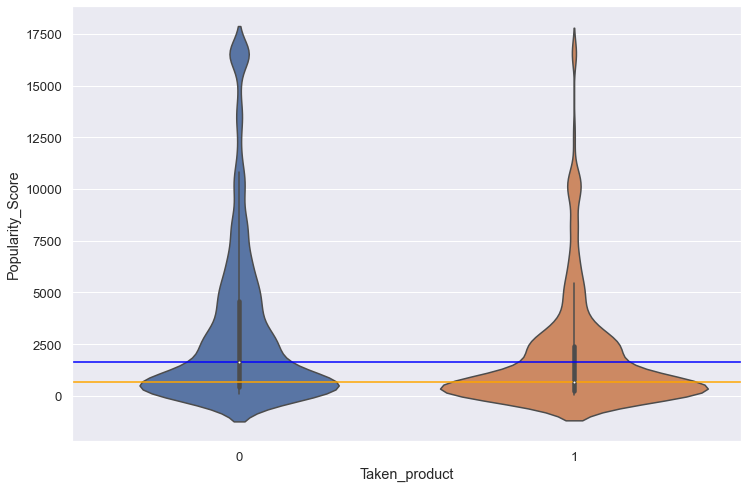

In [74]:
plt.figure(figsize=(12,8))
sns.violinplot(x=user_data_encoded['Taken_product'],y=user_data_encoded['Popularity_Score'])
plt.axhline(y=user_data_encoded[user_data_encoded['Taken_product']==1]['Popularity_Score'].median(),color='orange')
plt.axhline(y=user_data_encoded[user_data_encoded['Taken_product']==0]['Popularity_Score'].median(),color='blue')


Thus the populartiy score (average like per outstation check-in) of a user infulence in predicting the target variable as the median of class '0' is much higher than median of class '1'.

In [75]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm

formula = 'Popularity_Score ~ C(Taken_product)'
model = ols(formula, user_data_encoded).fit()
aov_table = anova_lm(model)
print(aov_table)


                       df        sum_sq       mean_sq           F  \
C(Taken_product)      1.0  2.999708e+09  2.999708e+09  192.429334   
Residual          11758.0  1.832910e+11  1.558862e+07         NaN   

                        PR(>F)  
C(Taken_product)  2.059847e-43  
Residual                   NaN  


Text(0.5, 1.0, 'Influence of New variables on Target Variable')

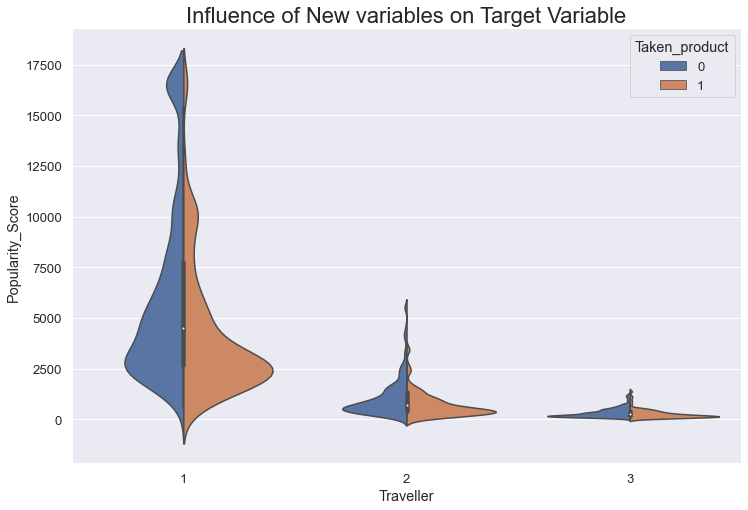

In [76]:
plt.figure(figsize=(12,8))
sns.violinplot(x=user_data_encoded['Traveller'],y=user_data_encoded['Popularity_Score'],hue=user_data_encoded['Taken_product'],split=True)
plt.title("Influence of New variables on Target Variable",fontsize=22)

## ANOVA
### Hypothesis testing for relationship between Popularity scores and the Target variable.

- H0(null hypothesis) : There is no relationship
- H1(alternative hypothesis) : There is a relationship

In [77]:
formula = 'Popularity_Score ~ C(Taken_product):C(Traveller)'
model = ols(formula, user_data_encoded).fit()
aov_table = anova_lm(model)
print(aov_table)
print()
print("As the p-value is <0.05 we can reject the null hyothesis. And conclude there will a relationship between the two variable")

                                    df        sum_sq       mean_sq  \
C(Taken_product):C(Traveller)      5.0  8.433153e+10  1.686631e+10   
Residual                       11754.0  1.019592e+11  8.674422e+06   

                                         F  PR(>F)  
C(Taken_product):C(Traveller)  1944.372317     0.0  
Residual                               NaN     NaN  

As the p-value is <0.05 we can reject the null hyothesis. And conclude there will a relationship between the two variable


In [78]:
# user_data_encoded.groupby('Traveller')['Taken_product'].value_counts(normalize=True).unstack('Taken_product').plot.bar(stacked=True)

## Chi-square Test
#### Hypothesis Test on the newl created variable 'Popularity' and 'Traveller'
Let do a chi-square test on these to newly created features with the target variable for its relation.

- H0 (null hypothesis) : No relationship exist between the Predictor and Target variable
- H1 (alternative hypothesis) : There is a relationshop between the Predictor and Target variable

In [79]:
from scipy.stats import chi2_contingency
chi2,pval,dof,exp_freq = chi2_contingency(pd.crosstab(user_data_encoded['Popularity'],user_data_encoded['Taken_product']),correction=False)
print(pval)
print("As the p-value is <0.05 we can reject the null-hypothesis,thus variable 'Popularity' has significance in predicting the 'Taken_product'")

1.0383545003542686e-63
As the p-value is <0.05 we can reject the null-hypothesis,thus variable 'Popularity' has significance in predicting the 'Taken_product'


Text(0.5, 1.0, 'Influence of Popularity on Target Variable')

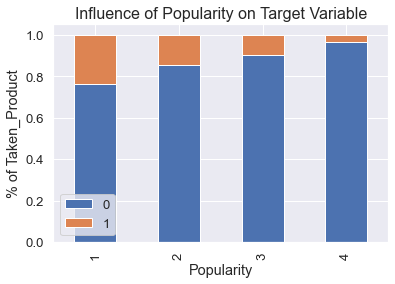

In [80]:
pd.crosstab(user_data_encoded['Popularity'],user_data_encoded['Taken_product'],normalize='index').plot.bar(stacked=True).legend(loc='lower left')
plt.ylabel('% of Taken_Product')
plt.title("Influence of Popularity on Target Variable",fontsize=16)

In [81]:
chi2,pval,dof,exp_freq = chi2_contingency(pd.crosstab(user_data_encoded['Traveller'],user_data_encoded['Taken_product']),correction=False)
print(pval)
print("As the p-value is <0.05 we can reject the null-hypothesis, thus variable 'Popularity' has significance in predicting the 'Taken_product'")

8.365206165807293e-22
As the p-value is <0.05 we can reject the null-hypothesis, thus variable 'Popularity' has significance in predicting the 'Taken_product'


#### As the p-value is <0.05 for both chi-squared test, we can reject the null-hypothesis, thus variable 'Popularity' and 'Traveller' has significance in predicting the 'Taken_product'

Text(0.5, 1.0, 'Influence of Traveller on Target Variable')

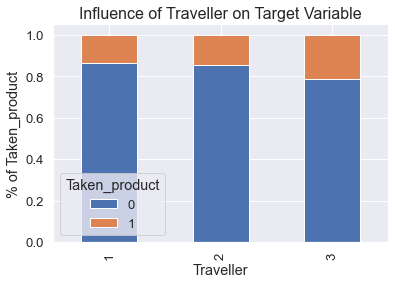

In [82]:
pd.crosstab(user_data_encoded['Traveller'],user_data_encoded['Taken_product'],normalize='index').plot.bar(stacked=True)
plt.ylabel('% of Taken_product')
plt.title("Influence of Traveller on Target Variable",fontsize=16)

Thus by grouping the users based on the Travel frequency based on the check-ins show significance in predicting the target of 'Taken_product'. As the user with higher travel frequency has more proportion of opting for the company's product.

In [83]:
user_data_encoded[['Traveller','Taken_product','Popularity']].groupby(['Traveller','Taken_product','Popularity'])['Taken_product'].count().unstack(level=-2).to_clipboard()

In [84]:
user_data_encoded['Popularity'] = user_data_encoded['Popularity'].astype('int64')
user_data_encoded['Traveller'] = user_data_encoded['Traveller'].astype('int64')

In [85]:
# user_data_encoded.info()

In [86]:
# user_data_encoded.to_csv('user_data_encoded.csv')

## 4) Business insights from EDA 	

#### Business Insights:
- 'Popularity' of the user give significance on the Target variable however, it is opposite that user who is not very popular tend to take the company's product. Thus company has higher scope of approaching these customers.

- 'Traveller' frequency of the user also has significance in predication the class '0' or '1' of target variable. Also, user who is a frequent traveller tends to take the company products. Even then we still have many customer to convert into the class '1' by making them to prefer the company's product.

#### 4. a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business

Before checking the balance of the data, let bifuricate the dataset into two based on the User preferred device - 'Laptop' and 'Mobile'.

In [87]:
data_laptop = user_data_encoded[user_data_encoded['preferred_device']=='Laptop']

In [88]:
data_laptop.drop(['preferred_device','Popularity_Score','yearly_avg_Outstation_checkins'],axis=1,inplace=True)
data_laptop

/var/folders/pc/78yk54bj3jv7njrr40lv60w80000gn/T/ipykernel_15167/4105076547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_laptop.drop(['preferred_device','Popularity_Score','yearly_avg_Outstation_checkins'],axis=1,inplace=True)


,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,preferred_location_type_Big Cities,preferred_location_type_Entertainment,preferred_location_type_Financial,preferred_location_type_Game,preferred_location_type_Hill Stations,preferred_location_type_Historical site,preferred_location_type_Medical,preferred_location_type_Movie,preferred_location_type_OTT,preferred_location_type_Other,preferred_location_type_Social media,preferred_location_type_Tour and Travel,preferred_location_type_Trekking,Popularity,Traveller
5881,0,379.0,9776.0,1,64.0,5142.0,1,0,33.0,1,4,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
5883,0,255.0,48725.0,4,59.0,2913.0,1,1,19.0,0,3,0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
5885,0,250.0,35184.0,2,84.0,3074.0,0,0,23.0,0,3,0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
5888,0,295.0,7572.0,3,48.0,9532.0,0,0,33.0,1,2,0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
5906,1,250.0,39379.0,1,80.0,3926.0,1,1,33.0,1,2,0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11730,0,278.0,24127.0,2,115.0,5184.0,7,0,35.0,0,2,1,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
11742,1,388.0,30775.0,4,109.0,6787.0,8,0,29.0,0,4,1,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1
11746,0,268.0,42010.0,4,98.0,5753.0,2,1,34.0,0,4,1,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
11755,0,279.0,30987.0,2,58.0,2616.0,4,0,36.0,0,3,1,23.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3


In [89]:
data_mobile = user_data_encoded[user_data_encoded['preferred_device']=='Mobile']

In [90]:
data_mobile.drop(['preferred_device','Popularity_Score','yearly_avg_Outstation_checkins'],axis=1,inplace=True)
data_mobile

/var/folders/pc/78yk54bj3jv7njrr40lv60w80000gn/T/ipykernel_15167/3354957579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mobile.drop(['preferred_device','Popularity_Score','yearly_avg_Outstation_checkins'],axis=1,inplace=True)


,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,preferred_location_type_Big Cities,preferred_location_type_Entertainment,preferred_location_type_Financial,preferred_location_type_Game,preferred_location_type_Hill Stations,preferred_location_type_Historical site,preferred_location_type_Medical,preferred_location_type_Movie,preferred_location_type_OTT,preferred_location_type_Other,preferred_location_type_Social media,preferred_location_type_Tour and Travel,preferred_location_type_Trekking,Popularity,Traveller
0,1,307.0,38570.0,2,94.0,5993.0,8,1,11.0,0,1,0,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1
1,0,367.0,9765.0,1,61.0,5130.0,1,0,23.0,1,4,1,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1
2,1,277.0,48055.0,2,92.0,2090.0,6,1,15.0,0,2,0,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1
3,0,247.0,48720.0,4,56.0,2909.0,1,1,11.0,0,3,0,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1
4,0,202.0,20685.0,1,40.0,3468.0,9,0,12.0,0,4,1,6.0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11753,0,247.0,11418.0,3,99.0,9983.0,1,0,28.0,0,2,0,16.0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2
11754,0,210.0,40886.0,3,53.0,3024.0,2,0,32.0,0,4,0,14.0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,2
11756,0,305.0,21510.0,1,55.0,10041.0,4,0,30.0,0,1,1,11.0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2
11757,0,214.0,5478.0,3,103.0,6203.0,3,1,40.0,1,2,1,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2


#### Checking for class imbalance

In [91]:
data_laptop['Taken_product'].value_counts(normalize=True)

0    0.750903
1    0.249097
Name: Taken_product, dtype: float64

In [92]:
data_mobile['Taken_product'].value_counts(normalize=True)

0    0.847916
1    0.152084
Name: Taken_product, dtype: float64

**As the Target class:1 of the Dependent variable is more than 10% of the given data in both of the data set there is no need for any data balancing.**

### **Business Insights:**
- 'Popularity' of the user give significance on the Target variable however, it is opposite that user who is highly popular tend to take the company's product. Thus company has higher scope of approching these customers as they have move infulence on people in the social media since their average likes per check-in is high.
- 'Traveller' frequency of the user also has significance in predicition the class '0' or '1' of target variable. Also, user who is a frequent traveller tends to take the company products. Even then we still have many customer to convert into the class '1' by making them to prefer the company's product.

## **Project Notes -2 (Model Selection)**

### **1) Model Building and interpretation**

#### Splitting the data set into 'Predictor' and 'Target' variables

In [93]:
X_laptop = data_laptop.drop('Taken_product',axis=1)
Y_laptop = data_laptop['Taken_product']
print('Size of X_laptop: ',X_laptop.shape)
print('Size of Y_laptop: ',Y_laptop.shape)

Size of X_laptop:  (1108, 27)
Size of Y_laptop:  (1108,)


In [94]:
X_mobile = data_mobile.drop('Taken_product',axis=1)
Y_mobile = data_mobile['Taken_product']
print('Size of X_laptop: ',X_mobile.shape)
print('Size of Y_laptop: ',Y_mobile.shape)

Size of X_laptop:  (10652, 27)
Size of Y_laptop:  (10652,)


#### Divide the data into Test and Train dataset

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
#for laptop data
X_laptop_train, X_laptop_test, y_laptop_train, y_laptop_test = train_test_split(X_laptop,Y_laptop,test_size=0.30,random_state=1)
print('Size of X_train for laptop: ', X_laptop_train.shape) 
print('Size of X_test for laptop: ',X_laptop_test.shape)
print('Size of y_train for laptop: ',y_laptop_train.shape)
print('Size of y_test for laptop: ',y_laptop_test.shape)

Size of X_train for laptop:  (775, 27)
Size of X_test for laptop:  (333, 27)
Size of y_train for laptop:  (775,)
Size of y_test for laptop:  (333,)


In [97]:
#for mobile data
X_mobile_train, X_mobile_test, y_mobile_train, y_mobile_test = train_test_split(X_mobile,Y_mobile,test_size=0.30,random_state=1)
print('Size of X_train for mobile: ', X_mobile_train.shape) 
print('Size of X_test for mobile: ',X_mobile_test.shape)
print('Size of y_train for mobile: ',y_mobile_train.shape)
print('Size of y_test for mobile: ',y_mobile_test.shape)

Size of X_train for mobile:  (7456, 27)
Size of X_test for mobile:  (3196, 27)
Size of y_train for mobile:  (7456,)
Size of y_test for mobile:  (3196,)


In [98]:
X_laptop_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 9404 to 11483
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Yearly_avg_view_on_travel_page                775 non-null    float64
 1   total_likes_on_outstation_checkin_given       775 non-null    float64
 2   member_in_family                              775 non-null    int64  
 3   Yearly_avg_comment_on_travel_page             775 non-null    float64
 4   total_likes_on_outofstation_checkin_received  775 non-null    float64
 5   week_since_last_outstation_checkin            775 non-null    int64  
 6   following_company_page                        775 non-null    int64  
 7   montly_avg_comment_on_company_page            775 non-null    float64
 8   working_flag                                  775 non-null    int64  
 9   travelling_network_rating                     775 non-null  

In [99]:
num_columns = X_laptop_train.select_dtypes('float64').columns
cat_columns = X_laptop_train.select_dtypes(['int64','uint8']).columns
print(len(cat_columns))
print(len(num_columns))

21
6


#### Scale the 'predictor' variables as few models are sensitive to scales of different variables

In [100]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [101]:
lap_num_scaled_train = pd.DataFrame(std_scaler.fit_transform(X_laptop_train[num_columns]),columns=num_columns,index=X_laptop_train.index)
X_laptop_train_scaled = lap_num_scaled_train
X_laptop_train_scaled[cat_columns] = X_laptop_train[cat_columns]

lap_num_scaled_test = pd.DataFrame(std_scaler.transform(X_laptop_test[num_columns]),columns=num_columns,index=X_laptop_test.index)
X_laptop_test_scaled = lap_num_scaled_test
X_laptop_test_scaled[cat_columns] = X_laptop_test[cat_columns]

print(X_laptop_train_scaled.shape)
print(X_laptop_test_scaled.shape)

(775, 27)
(333, 27)


In [102]:
mob_num_scaled_train = pd.DataFrame(std_scaler.fit_transform(X_mobile_train[num_columns]),columns=num_columns,index=X_mobile_train.index)
X_mobile_train_scaled = mob_num_scaled_train
X_mobile_train_scaled[cat_columns] = X_mobile_train[cat_columns]

mob_num_scaled_test = pd.DataFrame(std_scaler.transform(X_mobile_test[num_columns]),columns=num_columns,index=X_mobile_test.index)
X_mobile_test_scaled = mob_num_scaled_test
X_mobile_test_scaled[cat_columns] = X_mobile_test[cat_columns]

print(X_mobile_train_scaled.shape)
print(X_mobile_test_scaled.shape)

(7456, 27)
(3196, 27)


### **Models for Laptop**

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif

In [104]:
vif_laptop = calc_vif(X_laptop_train_scaled)
vif_laptop.sort_values('VIF',ascending=False)

/Users/venkadasubramanianjayakumar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
6,member_in_family,9.775742
10,travelling_network_rating,7.809063
25,Popularity,7.460796
26,Traveller,6.959013
5,Daily_Avg_mins_spend_on_traveling_page,3.025502
7,week_since_last_outstation_checkin,2.947541
11,Adult_flag,2.333614
3,total_likes_on_outofstation_checkin_received,2.313665
0,Yearly_avg_view_on_travel_page,1.822134
17,preferred_location_type_Historical site,1.712719


### Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
model_logistic_lap = LogisticRegression(random_state=123)
model_logistic_lap.fit(X_laptop_train_scaled,y_laptop_train)

LogisticRegression(random_state=123)

In [106]:
# def create_confusion_matrix(model_name,model,y_actual,X,labels=[1, 0]):
#     '''
#     model : classifier to predict values of X
#     y_actual : ground truth  
    
#     '''
#     y_predict = model.predict(X)
#     cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
#     df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
#                   columns = ['Predicted - No','Predicted - Yes'])
#     # group_counts = ["{0:0.0f}".format(value) for value in
#     #             cm.flatten()]
#     # group_percentages = ["{0:.2%}".format(value) for value in
#     #                      cm.flatten()/np.sum(cm)]
#     # labels = [f"{v1}\n{v2}" for v1, v2 in
#     #           zip(group_counts,group_percentages)]
#     # labels = np.asarray(labels).reshape(2,2)
#     plt.figure(figsize = (7,5))
#     sns.heatmap(df_cm, annot=True,fmt='')
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.title(model_name)

In [107]:
# fig,axes = plt.subplots(1,2,figsize=(10,6))
# cm1 = metrics.confusion_matrix(y_laptop_train,model_ANN_lap.predict(X_laptop_train_scaled))
# disp1 = metrics.ConfusionMatrixDisplay(cm1,display_labels=[0,1])
# disp1.plot(ax=axes[0])
# cm2 = metrics.confusion_matrix(y_laptop_test,model_ANN_lap.predict(X_laptop_test_scaled))
# disp2 = metrics.ConfusionMatrixDisplay(cm2,display_labels=[0,1])
# disp2.plot(ax=axes[1])


In [108]:
def make_confusion_matrix(model_name,model,y_actual,X,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    fig,axes = plt.subplots(1,2,figsize = (12,5))
    for i,j,a,m in zip(y_actual,X,axes,model_name):
        y_predict = model.predict(j)
        cm=metrics.confusion_matrix( i, y_predict, labels=[0, 1])
        df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
                      columns = ['Predicted - No','Predicted - Yes'])
        g = sns.heatmap(df_cm, annot=True,fmt='',ax=a)
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        g.set_title(m)

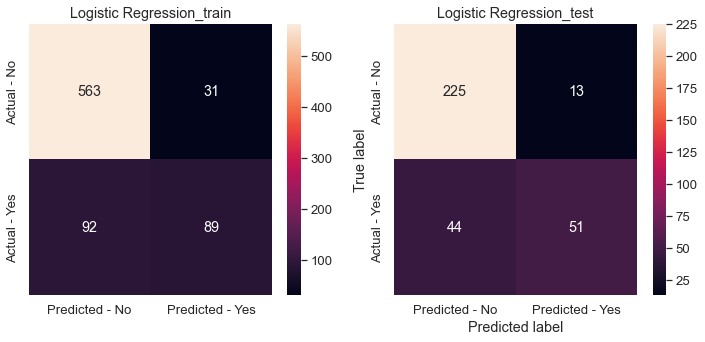

In [109]:
make_confusion_matrix(['Logistic Regression_train','Logistic Regression_test'],model_logistic_lap
                      ,[y_laptop_train,y_laptop_test],[X_laptop_train_scaled,X_laptop_test_scaled])

In [110]:
pred_laptop_train_model_logistic = model_logistic_lap.predict(X_laptop_train_scaled)
pred_laptop_test_model_logistic = model_logistic_lap.predict(X_laptop_test_scaled)
pred_prob_laptop_train_model_logistic = model_logistic_lap.predict_proba(X_laptop_train_scaled)
pred_prob_laptop_test_model_logistic = model_logistic_lap.predict_proba(X_laptop_test_scaled)


print('Train Accuracy of the Logistic Regression model: ',model_logistic_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Logistic Regression model: ',model_logistic_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,pred_laptop_train_model_logistic))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,pred_laptop_test_model_logistic))
print()

print('Train AUC Score of the Logistic Regression Model:', metrics.roc_auc_score(y_laptop_train,pred_prob_laptop_train_model_logistic[:,1]))
print('Test AUC Score of the Logistic Regression Model:', metrics.roc_auc_score(y_laptop_test,pred_prob_laptop_test_model_logistic[:,1]))


Train Accuracy of the Logistic Regression model:  0.8412903225806452
Test Accuracy of the Logistic Regression model:  0.8288288288288288

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       594
           1       0.74      0.49      0.59       181

    accuracy                           0.84       775
   macro avg       0.80      0.72      0.75       775
weighted avg       0.83      0.84      0.83       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       238
           1       0.80      0.54      0.64        95

    accuracy                           0.83       333
   macro avg       0.82      0.74      0.76       333
weighted avg       0.83      0.83      0.82       333


Train AUC Score of the Logistic Regression Model: 0.8386163662406757
Test AUC Score of the Logistic Regression Model: 0.865015479876161


### Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier
model_DT_lap = DecisionTreeClassifier(random_state=123)
model_DT_lap.fit(X_laptop_train_scaled,y_laptop_train)

DecisionTreeClassifier(random_state=123)

In [112]:
# pd.DataFrame(model_DT.feature_importances_,columns=['Importance'],index=X_laptop_train.columns).sort_values('Importance',ascending=False)


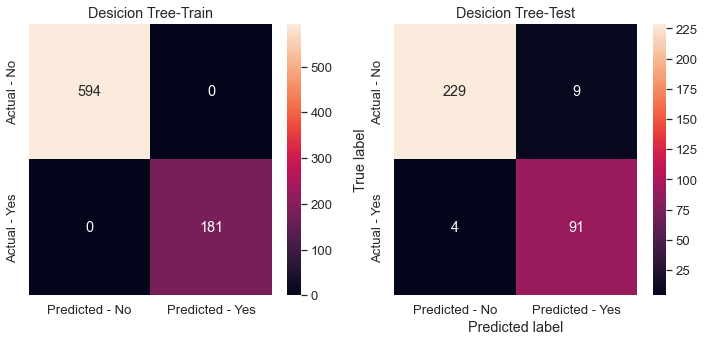

In [113]:
make_confusion_matrix(['Desicion Tree-Train','Desicion Tree-Test']
                      ,model_DT_lap,[y_laptop_train,y_laptop_test]
                      ,[X_laptop_train_scaled,X_laptop_test_scaled])

In [114]:
pred_laptop_train_model_DT = model_DT_lap.predict(X_laptop_train_scaled)
pred_laptop_test_model_DT = model_DT_lap.predict(X_laptop_test_scaled)

print('Train Accuracy of the Decision Tree model: ',model_DT_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Decision model: ',model_DT_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,pred_laptop_train_model_DT))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,pred_laptop_test_model_DT))

Train Accuracy of the Decision Tree model:  1.0
Test Accuracy of the Decision model:  0.960960960960961

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       238
           1       0.91      0.96      0.93        95

    accuracy                           0.96       333
   macro avg       0.95      0.96      0.95       333
weighted avg       0.96      0.96      0.96       333



### Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
model_RF_lap = RandomForestClassifier(random_state=123)
model_RF_lap.fit(X_laptop_train_scaled,y_laptop_train)

RandomForestClassifier(random_state=123)

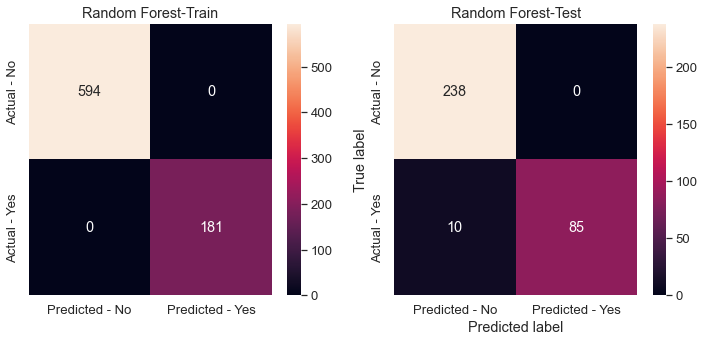

In [116]:
make_confusion_matrix(['Random Forest-Train','Random Forest-Test']
                      ,model_RF_lap
                      ,[y_laptop_train,y_laptop_test]
                      ,[X_laptop_train_scaled,X_laptop_test_scaled])


In [117]:
pred_laptop_train_model_RF = model_RF_lap.predict(X_laptop_train_scaled)
pred_laptop_test_model_RF = model_RF_lap.predict(X_laptop_test_scaled)

print('Train Accuracy of the Random Forest model: ',model_RF_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Random Forest model: ',model_RF_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,pred_laptop_train_model_RF))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,pred_laptop_test_model_RF))

Train Accuracy of the Random Forest model:  1.0
Test Accuracy of the Random Forest model:  0.96996996996997

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       238
           1       1.00      0.89      0.94        95

    accuracy                           0.97       333
   macro avg       0.98      0.95      0.96       333
weighted avg       0.97      0.97      0.97       333



In [118]:
from xgboost import XGBClassifier
model_XGB_lap = XGBClassifier(random_state=123)
model_XGB_lap.fit(X_laptop_train_scaled,y_laptop_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

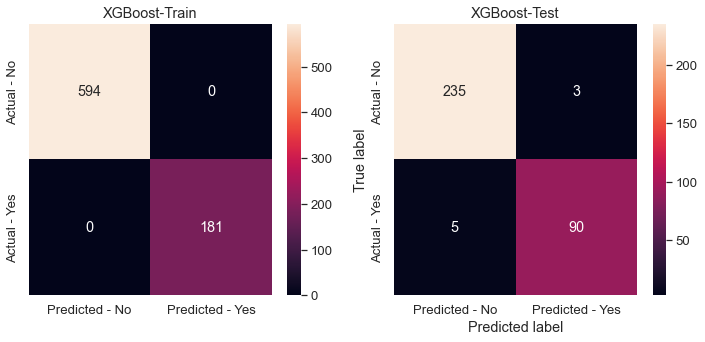

In [119]:
make_confusion_matrix(['XGBoost-Train','XGBoost-Test']
                      ,model_XGB_lap
                      ,[y_laptop_train,y_laptop_test]
                      ,[X_laptop_train_scaled,X_laptop_test_scaled])


In [120]:
pred_laptop_train_model_XGB = model_XGB_lap.predict(X_laptop_train_scaled)
pred_laptop_test_model_XGB = model_XGB_lap.predict(X_laptop_test_scaled)

print('Train Accuracy of the XGBoost model: ',model_XGB_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the XGBoost model: ',model_XGB_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,pred_laptop_train_model_XGB))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,pred_laptop_test_model_XGB))

Train Accuracy of the XGBoost model:  1.0
Test Accuracy of the XGBoost model:  0.975975975975976

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       238
           1       0.97      0.95      0.96        95

    accuracy                           0.98       333
   macro avg       0.97      0.97      0.97       333
weighted avg       0.98      0.98      0.98       333



### Artifical Neural Network (ANN)

In [121]:
from sklearn.neural_network import MLPClassifier
model_ANN_lap = MLPClassifier(activation='logistic',solver='adam',max_iter=400,random_state=123)
model_ANN_lap.fit(X_laptop_train_scaled,y_laptop_train)

/Users/venkadasubramanianjayakumar/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', max_iter=400, random_state=123)

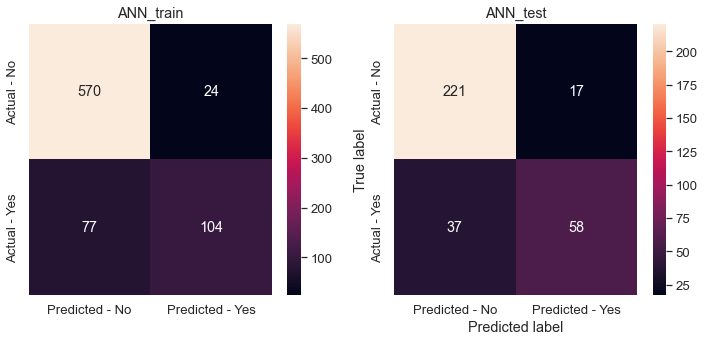

In [122]:
make_confusion_matrix(['ANN_train','ANN_test']
                        ,model_ANN_lap
                        ,[y_laptop_train,y_laptop_test]
                        ,[X_laptop_train_scaled,X_laptop_test_scaled])

In [123]:
pred_laptop_train_model_ANN = model_ANN_lap.predict(X_laptop_train_scaled)
pred_laptop_test_model_ANN = model_ANN_lap.predict(X_laptop_test_scaled)

print('Train Accuracy of the ANN model: ',model_ANN_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the ANN model: ',model_ANN_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,pred_laptop_train_model_ANN))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,pred_laptop_test_model_ANN))

Train Accuracy of the ANN model:  0.8696774193548387
Test Accuracy of the ANN model:  0.8378378378378378

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       594
           1       0.81      0.57      0.67       181

    accuracy                           0.87       775
   macro avg       0.85      0.77      0.80       775
weighted avg       0.86      0.87      0.86       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       238
           1       0.77      0.61      0.68        95

    accuracy                           0.84       333
   macro avg       0.81      0.77      0.79       333
weighted avg       0.83      0.84      0.83       333



In [124]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
mod = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
acc_train=[]
pre_train=[]
rec_train=[]
f1_train=[]
acc_test=[]
pre_test=[]
rec_test=[]
f1_test=[]

train_pred = [pred_laptop_train_model_logistic, pred_laptop_train_model_DT, pred_laptop_train_model_RF, pred_laptop_train_model_XGB, pred_laptop_train_model_ANN]
test_pred = [pred_laptop_test_model_logistic, pred_laptop_test_model_DT, pred_laptop_test_model_RF, pred_laptop_test_model_XGB, pred_laptop_test_model_ANN]
for i,j in zip(train_pred,test_pred):
    acc_train.append(accuracy_score(y_laptop_train,i))
    pre_train.append(precision_score(y_laptop_train,i,zero_division=0))
    rec_train.append(recall_score(y_laptop_train,i))
    f1_train.append(f1_score(y_laptop_train,i))
    
    acc_test.append(accuracy_score(y_laptop_test,j))
    pre_test.append(precision_score(y_laptop_test,j,zero_division=0))
    rec_test.append(recall_score(y_laptop_test,j))
    f1_test.append(f1_score(y_laptop_test,j))
metric_laptop = pd.DataFrame({'Model':mod,'Accuracy_train':acc_train,'Accuracy_test':acc_test
                                   ,'Precision_train':pre_train, 'Precision_test':pre_test
                                   ,'Recall_train':rec_train, 'Recall_test': rec_test
                                   ,'F1_Score_train':f1_train,'F1_score_test':f1_test}) 

### Model Metrics - Laptop Data

In [125]:
lap_train_auc_score = []
for i in [model_logistic_lap,model_DT_lap,model_RF_lap,model_XGB_lap,model_ANN_lap]:
    lap_train_auc_score.append(metrics.roc_auc_score(y_laptop_train,i.predict_proba(X_laptop_train_scaled)[:,1]))

lap_test_auc_score = []
for i in [model_logistic_lap,model_DT_lap,model_RF_lap,model_XGB_lap,model_ANN_lap]:
    lap_test_auc_score.append(metrics.roc_auc_score(y_laptop_test,i.predict_proba(X_laptop_test_scaled)[:,1]))

metric_laptop['AUC_Score_train'] = lap_train_auc_score
metric_laptop['AUC_Score_test'] = lap_test_auc_score

metric_laptop

,Model,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_Score_train,F1_score_test,AUC_Score_train,AUC_Score_test
0,Logistic,0.841290,0.828829,0.741667,0.796875,0.491713,0.536842,0.591362,0.641509,0.838616,0.865015
1,DecisionTree,1.000000,0.960961,1.000000,0.910000,1.000000,0.957895,1.000000,0.933333,1.000000,0.960040
2,RandomForest,1.000000,0.969970,1.000000,1.000000,1.000000,0.894737,1.000000,0.944444,1.000000,0.999071
3,XGBoost,1.000000,0.975976,1.000000,0.967742,1.000000,0.947368,1.000000,0.957447,1.000000,0.997921
4,ANN,0.869677,0.837838,0.812500,0.773333,0.574586,0.610526,0.673139,0.682353,0.898013,0.885626


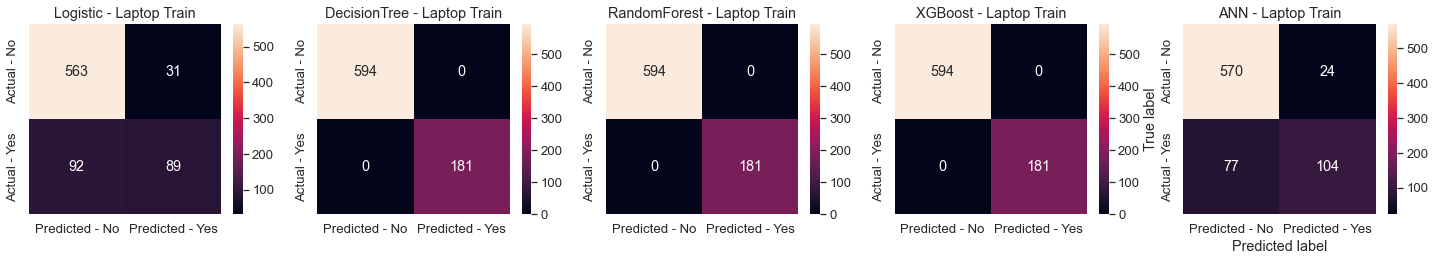

In [126]:
fig,axes = plt.subplots(1,5,figsize = (25,3.5))
models = [model_logistic_lap, model_DT_lap, model_RF_lap, model_XGB_lap, model_ANN_lap]
model_name = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
for i,a,m in zip(models,axes,model_name):
    y_predict = i.predict(X_laptop_train_scaled)
    cm=metrics.confusion_matrix( y_laptop_train, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
                  columns = ['Predicted - No','Predicted - Yes'])
    g = sns.heatmap(df_cm, annot=True,fmt='',ax=a)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    g.set_title(m+" - Laptop Train")

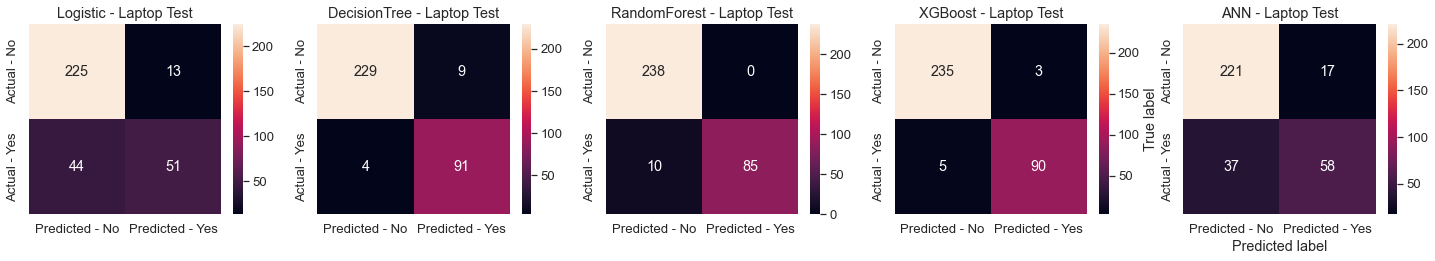

In [127]:
fig,axes = plt.subplots(1,5,figsize = (25,3.5))
models = [model_logistic_lap, model_DT_lap, model_RF_lap, model_XGB_lap, model_ANN_lap]
model_name = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
for i,a,m in zip(models,axes,model_name):
    y_predict = i.predict(X_laptop_test_scaled)
    cm=metrics.confusion_matrix( y_laptop_test, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
                  columns = ['Predicted - No','Predicted - Yes'])
    g = sns.heatmap(df_cm, annot=True,fmt='',ax=a)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    g.set_title(m + " - Laptop Test")

### **Models for Mobile**

In [128]:
vif_mobile = calc_vif(X_mobile_train_scaled)
vif_mobile.sort_values('VIF',ascending=False)

,variables,VIF
25,Popularity,9.932672
6,member_in_family,8.733054
10,travelling_network_rating,7.058812
26,Traveller,6.105475
5,Daily_Avg_mins_spend_on_traveling_page,2.969586
7,week_since_last_outstation_checkin,2.801166
3,total_likes_on_outofstation_checkin_received,2.723870
14,preferred_location_type_Financial,2.613184
11,Adult_flag,2.390906
18,preferred_location_type_Medical,2.275754


### Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
model_logistic_mobile = LogisticRegression(solver='liblinear',random_state=123)
model_logistic_mobile.fit(X_mobile_train_scaled,y_mobile_train)

LogisticRegression(random_state=123, solver='liblinear')

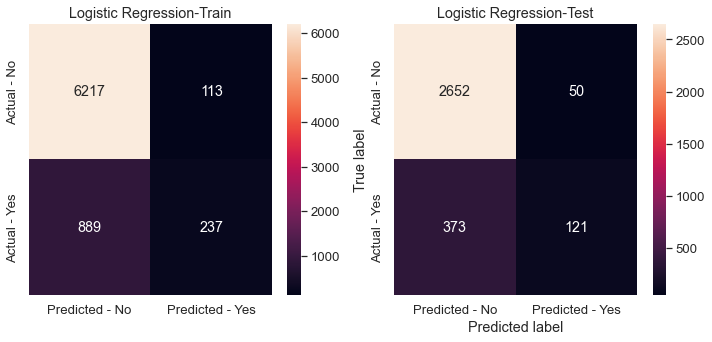

In [130]:
make_confusion_matrix(['Logistic Regression-Train','Logistic Regression-Test']
                      ,model_logistic_mobile
                      ,[y_mobile_train,y_mobile_test]
                      ,[X_mobile_train_scaled,X_mobile_test_scaled])


In [131]:
pred_mobile_train_model_logistic = model_logistic_mobile.predict(X_mobile_train_scaled)
pred_mobile_test_model_logistic = model_logistic_mobile.predict(X_mobile_test_scaled)

print('Train Accuracy of the Logistic Regression model: ',model_logistic_mobile.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Logistic Regression model: ',model_logistic_mobile.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,pred_mobile_train_model_logistic))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,pred_mobile_test_model_logistic))

Train Accuracy of the Logistic Regression model:  0.8656115879828327
Test Accuracy of the Logistic Regression model:  0.8676470588235294

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      6330
           1       0.68      0.21      0.32      1126

    accuracy                           0.87      7456
   macro avg       0.78      0.60      0.62      7456
weighted avg       0.85      0.87      0.83      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2702
           1       0.71      0.24      0.36       494

    accuracy                           0.87      3196
   macro avg       0.79      0.61      0.65      3196
weighted avg       0.85      0.87      0.84      3196



### Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier
model_DT_mobile = DecisionTreeClassifier(random_state=123)
model_DT_mobile.fit(X_mobile_train_scaled,y_mobile_train)

DecisionTreeClassifier(random_state=123)

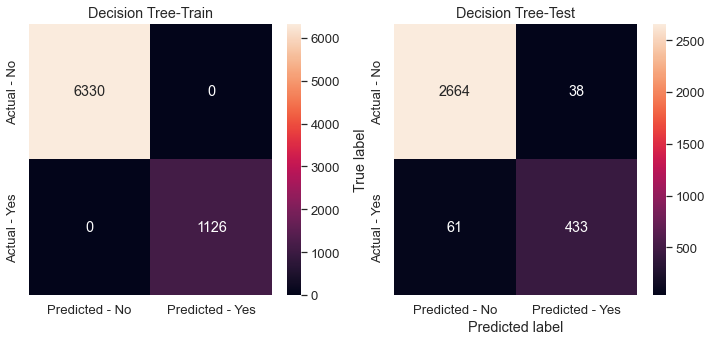

In [133]:
make_confusion_matrix(['Decision Tree-Train','Decision Tree-Test']
                      ,model_DT_mobile
                      ,[y_mobile_train,y_mobile_test]
                      ,[X_mobile_train_scaled,X_mobile_test_scaled])


In [134]:
pred_mobile_train_model_DT = model_DT_mobile.predict(X_mobile_train_scaled)
pred_mobile_test_model_DT = model_DT_mobile.predict(X_mobile_test_scaled)

print('Train Accuracy of the Decision Tree model: ',model_DT_mobile.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Decision model: ',model_DT_mobile.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,pred_mobile_train_model_DT))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,pred_mobile_test_model_DT))

Train Accuracy of the Decision Tree model:  1.0
Test Accuracy of the Decision model:  0.9690237797246558

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2702
           1       0.92      0.88      0.90       494

    accuracy                           0.97      3196
   macro avg       0.95      0.93      0.94      3196
weighted avg       0.97      0.97      0.97      3196



### Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier
model_RF_mobile = RandomForestClassifier(random_state=123)
model_RF_mobile.fit(X_mobile_train_scaled,y_mobile_train)

RandomForestClassifier(random_state=123)

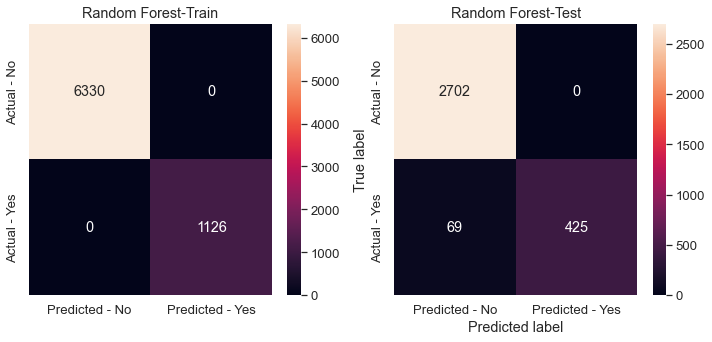

In [136]:
make_confusion_matrix(['Random Forest-Train','Random Forest-Test']
                      ,model_RF_mobile
                      ,[y_mobile_train,y_mobile_test]
                      ,[X_mobile_train_scaled,X_mobile_test_scaled])


In [137]:
pred_mobile_train_model_RF = model_RF_mobile.predict(X_mobile_train_scaled)
pred_mobile_test_model_RF = model_RF_mobile.predict(X_mobile_test_scaled)

print('Train Accuracy of the Random Forest model: ',model_RF_mobile.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Random Forest model: ',model_RF_mobile.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,pred_mobile_train_model_RF))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,pred_mobile_test_model_RF))

Train Accuracy of the Random Forest model:  1.0
Test Accuracy of the Random Forest model:  0.9784105131414268

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2702
           1       1.00      0.86      0.92       494

    accuracy                           0.98      3196
   macro avg       0.99      0.93      0.96      3196
weighted avg       0.98      0.98      0.98      3196



In [138]:
from xgboost import XGBClassifier
model_XGB_mobile = XGBClassifier(random_state=123)
model_XGB_mobile.fit(X_mobile_train_scaled,y_mobile_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

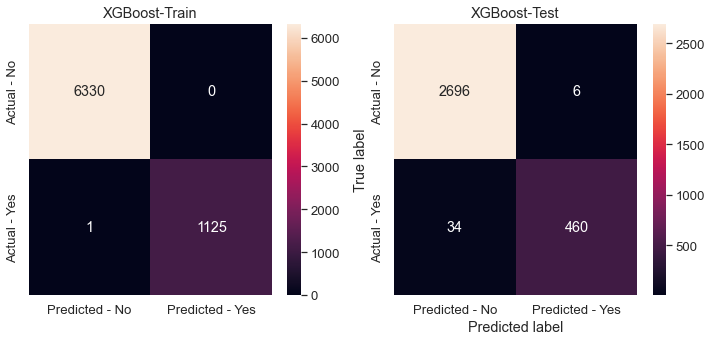

In [139]:
make_confusion_matrix(['XGBoost-Train','XGBoost-Test']
                      ,model_XGB_mobile
                      ,[y_mobile_train,y_mobile_test]
                      ,[X_mobile_train_scaled,X_mobile_test_scaled])


In [140]:
pred_mobile_train_model_XGB = model_XGB_mobile.predict(X_mobile_train_scaled)
pred_mobile_test_model_XGB = model_XGB_mobile.predict(X_mobile_test_scaled)

print('Train Accuracy of the XGBoost model: ',model_XGB_mobile.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the XGBoost model: ',model_XGB_mobile.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,pred_mobile_train_model_XGB))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,pred_mobile_test_model_XGB))

Train Accuracy of the XGBoost model:  0.9998658798283262
Test Accuracy of the XGBoost model:  0.9874843554443054

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2702
           1       0.99      0.93      0.96       494

    accuracy                           0.99      3196
   macro avg       0.99      0.96      0.98      3196
weighted avg       0.99      0.99      0.99      3196



In [141]:
# importance = model_XGB_mobile.feature_importances_
# indices = np.argsort(importance)
# feature_names = X_laptop.columns

# plt.figure(figsize=(12,10))
# plt.barh(range(len(indices)),importance[indices],align='center')
# plt.yticks(range(len(indices)),[feature_names[i]for i in indices])
# plt.xlabel('Relative Importance')
# plt.title('Feature Importance for Mobile Model')

### Artifical Neural Network (ANN)

In [142]:
from sklearn.neural_network import MLPClassifier
model_ANN_mobile = MLPClassifier(activation='logistic',solver='adam',max_iter=400,learning_rate_init=0.0001,random_state=123)
model_ANN_mobile.fit(X_mobile_train,y_mobile_train)

MLPClassifier(activation='logistic', learning_rate_init=0.0001, max_iter=400,
              random_state=123)

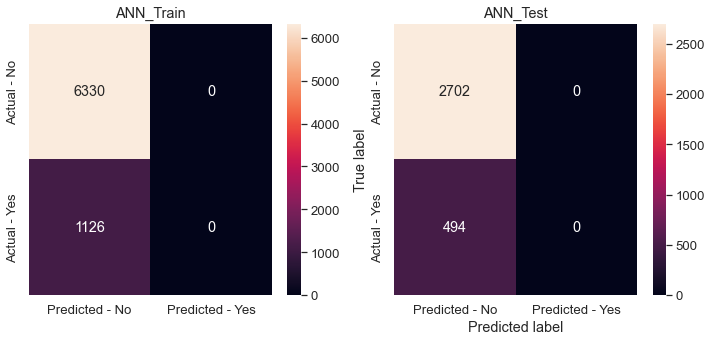

In [143]:
make_confusion_matrix(['ANN_Train','ANN_Test']
                      ,model_ANN_mobile
                      ,[y_mobile_train,y_mobile_test]
                      ,[X_mobile_train_scaled,X_mobile_test_scaled])

In [144]:
pred_mobile_train_model_ANN = model_ANN_mobile.predict(X_mobile_train_scaled)
pred_mobile_test_model_ANN = model_ANN_mobile.predict(X_mobile_test_scaled)

print('Train Accuracy of the XGBoost model: ',model_ANN_mobile.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the XGBoost model: ',model_ANN_mobile.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,pred_mobile_train_model_ANN))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,pred_mobile_test_model_ANN))

Train Accuracy of the XGBoost model:  0.8489806866952789
Test Accuracy of the XGBoost model:  0.8454317897371715

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6330
           1       0.00      0.00      0.00      1126

    accuracy                           0.85      7456
   macro avg       0.42      0.50      0.46      7456
weighted avg       0.72      0.85      0.78      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2702
           1       0.00      0.00      0.00       494

    accuracy                           0.85      3196
   macro avg       0.42      0.50      0.46      3196
weighted avg       0.71      0.85      0.77      3196



/Users/venkadasubramanianjayakumar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model Metrics - Mobile Data

In [145]:
# Comparing the models as per performance on testing set
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
mod = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
acc_train=[]
pre_train=[]
rec_train=[]
f1_train=[]
acc_test=[]
pre_test=[]
rec_test=[]
f1_test=[]

train_pred = [pred_mobile_train_model_logistic, pred_mobile_train_model_DT, pred_mobile_train_model_RF, pred_mobile_train_model_XGB, pred_mobile_train_model_ANN]
test_pred = [pred_mobile_test_model_logistic, pred_mobile_test_model_DT, pred_mobile_test_model_RF, pred_mobile_test_model_XGB, pred_mobile_test_model_ANN]
for i,j in zip(train_pred,test_pred):
    acc_train.append(accuracy_score(y_mobile_train,i))
    pre_train.append(precision_score(y_mobile_train,i,zero_division=0))
    rec_train.append(recall_score(y_mobile_train,i))
    f1_train.append(f1_score(y_mobile_train,i))
    
    acc_test.append(accuracy_score(y_mobile_test,j))
    pre_test.append(precision_score(y_mobile_test,j,zero_division=0))
    rec_test.append(recall_score(y_mobile_test,j))
    f1_test.append(f1_score(y_mobile_test,j))
metric_mobile = pd.DataFrame({'Model':mod,'Accuracy_train':acc_train,'Accuracy_test':acc_test
                                   ,'Precision_train':pre_train, 'Precision_test':pre_test
                                   ,'Recall_train':rec_train, 'Recall_test': rec_test
                                   ,'F1_Score_train':f1_train,'F1_score_test':f1_test})    

In [146]:
mob_train_auc_score = []
mob_test_auc_score = []

for i in [model_logistic_mobile,model_DT_mobile,model_RF_mobile,model_XGB_mobile,model_ANN_mobile]:
    mob_train_auc_score.append(metrics.roc_auc_score(y_mobile_train,i.predict_proba(X_mobile_train_scaled)[:,1]))

for i in [model_logistic_mobile,model_DT_mobile,model_RF_mobile,model_XGB_mobile,model_ANN_mobile]:
    mob_test_auc_score.append(metrics.roc_auc_score(y_mobile_test,i.predict_proba(X_mobile_test_scaled)[:,1]))

metric_mobile['AUC_Score_train'] = mob_train_auc_score
metric_mobile['AUC_Score_test'] = mob_train_auc_score

metric_mobile.to_clipboard()


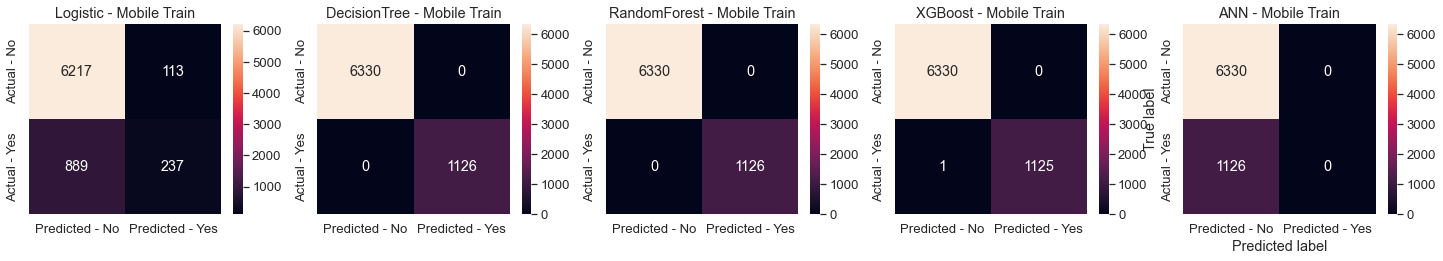

In [147]:
fig,axes = plt.subplots(1,5,figsize = (25,3.5))
models = [model_logistic_mobile, model_DT_mobile, model_RF_mobile, model_XGB_mobile, model_ANN_mobile]
model_name = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
for i,a,m in zip(models,axes,model_name):
    y_predict = i.predict(X_mobile_train_scaled)
    cm=metrics.confusion_matrix( y_mobile_train, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
                  columns = ['Predicted - No','Predicted - Yes'])
    g = sns.heatmap(df_cm, annot=True,fmt='',ax=a)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    g.set_title(m + " - Mobile Train")

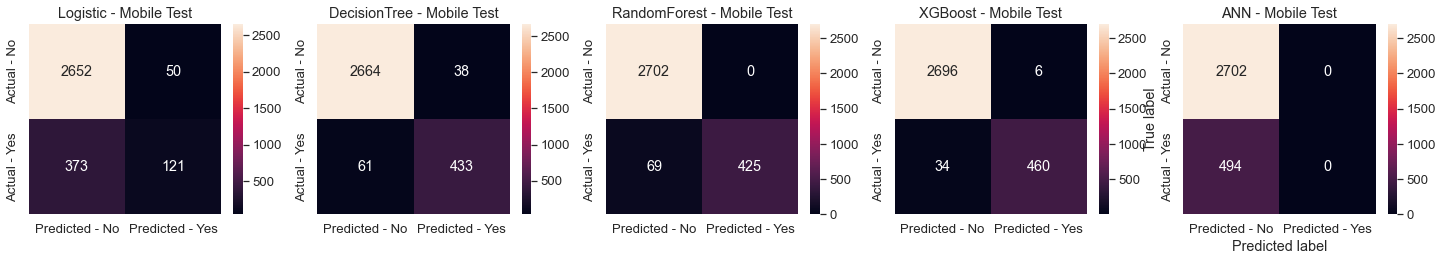

In [148]:
fig,axes = plt.subplots(1,5,figsize = (25,3.5))
models = [model_logistic_mobile, model_DT_mobile, model_RF_mobile, model_XGB_mobile, model_ANN_mobile]
model_name = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
for i,a,m in zip(models,axes,model_name):
    y_predict = i.predict(X_mobile_test_scaled)
    cm=metrics.confusion_matrix( y_mobile_test, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
                  columns = ['Predicted - No','Predicted - Yes'])
    g = sns.heatmap(df_cm, annot=True,fmt='',ax=a)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    g.set_title(m + " - Mobile Test")

In [149]:
# #Visualing the model metrics - Laptop Train data
# fig,axes = plt.subplots(5,2,figsize=(20,15))
# cols = list(metric_laptop.columns)[1:]
# for i,j in zip(cols,axes.flatten()):
#     a = sns.barplot(x='Model',y=i,data=metric_laptop.sort_values(by=i,ascending=False),ax=j,palette='PuBuGn_r')
#     a.set_title('{} for Laptop Data'.format(i))
#     plt.tight_layout()

In [150]:
# #Visualing the model metrics - Laptop Test data
# fig,axes = plt.subplots(5,2,figsize=(20,15))
# cols = list(metric_mobile.columns)[1:]
# for i,j in zip(cols,axes.flatten()):
#     a= sns.barplot(x='Model',y=i,data=metric_mobile.sort_values(by=i,ascending=False),ax=j,palette='PuBuGn_r')
#     a.set_title('{} for Mobile Data'.format(i))
#     plt.tight_layout()

In [151]:
metric_laptop

,Model,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_Score_train,F1_score_test,AUC_Score_train,AUC_Score_test
0,Logistic,0.841290,0.828829,0.741667,0.796875,0.491713,0.536842,0.591362,0.641509,0.838616,0.865015
1,DecisionTree,1.000000,0.960961,1.000000,0.910000,1.000000,0.957895,1.000000,0.933333,1.000000,0.960040
2,RandomForest,1.000000,0.969970,1.000000,1.000000,1.000000,0.894737,1.000000,0.944444,1.000000,0.999071
3,XGBoost,1.000000,0.975976,1.000000,0.967742,1.000000,0.947368,1.000000,0.957447,1.000000,0.997921
4,ANN,0.869677,0.837838,0.812500,0.773333,0.574586,0.610526,0.673139,0.682353,0.898013,0.885626


In [152]:
metric_mobile

,Model,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_Score_train,F1_score_test,AUC_Score_train,AUC_Score_test
0,Logistic,0.865612,0.867647,0.677143,0.707602,0.210480,0.244939,0.321138,0.363910,0.795440,0.795440
1,DecisionTree,1.000000,0.969024,1.000000,0.919321,1.000000,0.876518,1.000000,0.897409,1.000000,1.000000
2,RandomForest,1.000000,0.978411,1.000000,1.000000,1.000000,0.860324,1.000000,0.924918,1.000000,1.000000
3,XGBoost,0.999866,0.987484,1.000000,0.987124,0.999112,0.931174,0.999556,0.958333,1.000000,1.000000
4,ANN,0.848981,0.845432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.443171,0.443171


<AxesSubplot:title={'center':'Performance Metrics - Mobile Data'}, xlabel='Model'>

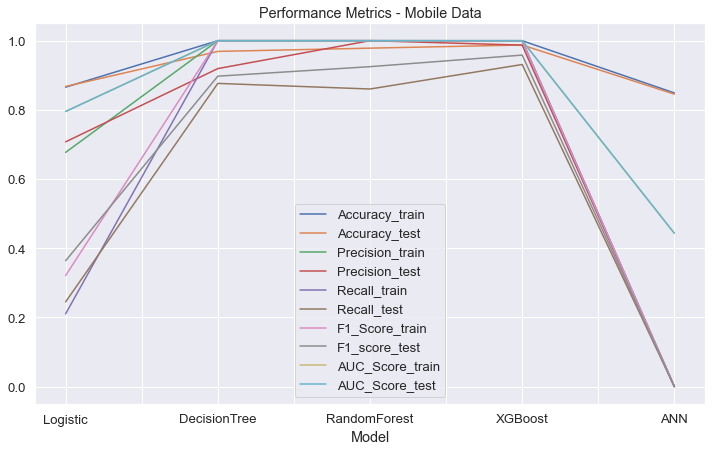

In [153]:
metric_mobile.plot(x='Model',kind='line',stacked=False,figsize=(12,7),title="Performance Metrics - Mobile Data")

### Hyperparameter Tuning - Laptop

In [154]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [155]:
#XGBoost Classifier
param_xgb = {
    'n_estimators':[65,70,75],
    'max_depth':[1,2,3],
    'min_child_weight':[2,3,5],
    'learning_rate':[0.01,0.1,0.2],
    'subsample':[0.5],
    'gamma':[0.3]
    
}
gsearch_xgb = GridSearchCV(estimator = XGBClassifier(),param_grid=param_xgb,cv=3)

In [156]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

In [157]:
gsearch_xgb.fit(X_laptop_train_scaled,y_laptop_train)
gsearch_xgb.best_params_

{'gamma': 0.3,
 'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 75,
 'subsample': 0.5}

In [158]:
# best_grid_xgb = gsearch_xgb.best_estimator_

In [159]:
tuned_Xgb_lap = gsearch_xgb.best_estimator_
tuned_Xgb_lap.fit(X_laptop_train_scaled,y_laptop_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=75, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [160]:
print('Train Accuracy of the XGBoost model: ',tuned_Xgb_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the XGBoost model: ',tuned_Xgb_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,tuned_Xgb_lap.predict(X_laptop_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,tuned_Xgb_lap.predict(X_laptop_test_scaled)))

Train Accuracy of the XGBoost model:  0.9767741935483871
Test Accuracy of the XGBoost model:  0.9279279279279279

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       594
           1       0.98      0.92      0.95       181

    accuracy                           0.98       775
   macro avg       0.98      0.96      0.97       775
weighted avg       0.98      0.98      0.98       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       238
           1       0.93      0.81      0.87        95

    accuracy                           0.93       333
   macro avg       0.93      0.89      0.91       333
weighted avg       0.93      0.93      0.93       333



In [161]:
#Logistic Regression
param_logistic = {
    'solver':['newton-cg','lbfgs','liblinear'],
    'penalty':['l2'],
    'C':[100,10,1,0.1,0.001]
}
gsearch_logistic = GridSearchCV(estimator=LogisticRegression(),param_grid=param_logistic,cv=5)

In [162]:
gsearch_logistic.fit(X_laptop_train_scaled,y_laptop_train)
print(gsearch_logistic.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [163]:
tuned_logi_lap = gsearch_logistic.best_estimator_
tuned_logi_lap.fit(X_laptop_train_scaled,y_laptop_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [164]:
print('Train Accuracy of the Tuned Logistics Regression model: ',tuned_logi_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Tuned Logistics Regression model: ',tuned_logi_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,tuned_logi_lap.predict(X_laptop_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,tuned_logi_lap.predict(X_laptop_test_scaled)))

Train Accuracy of the Tuned Logistics Regression model:  0.8503225806451613
Test Accuracy of the Tuned Logistics Regression model:  0.8228228228228228

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       594
           1       0.82      0.46      0.59       181

    accuracy                           0.85       775
   macro avg       0.84      0.71      0.75       775
weighted avg       0.85      0.85      0.83       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       238
           1       0.85      0.46      0.60        95

    accuracy                           0.82       333
   macro avg       0.83      0.71      0.74       333
weighted avg       0.83      0.82      0.80       333



In [165]:
#Decision Tree
param_dt = {
            "max_depth": [5],
            "max_features": [15,17,19],
            "min_samples_leaf": [15,20,25],
            "min_samples_split": [45,60,75],
            "criterion": ["gini", "entropy"]
}
gsearch_dt = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_dt,cv=3)

In [166]:
gsearch_dt.fit(X_laptop_train_scaled,y_laptop_train)
print(gsearch_dt.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 17, 'min_samples_leaf': 15, 'min_samples_split': 45}


In [167]:
tuned_dt_lap = gsearch_dt.best_estimator_
tuned_dt_lap.fit(X_laptop_train_scaled,y_laptop_train)

DecisionTreeClassifier(max_depth=5, max_features=17, min_samples_leaf=15,
                       min_samples_split=45)

In [168]:
print('Train Accuracy of the Tuned Decision Tree model: ',tuned_dt_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Tuned Decision Tree model: ',tuned_dt_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,tuned_dt_lap.predict(X_laptop_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,tuned_dt_lap.predict(X_laptop_test_scaled)))

Train Accuracy of the Tuned Decision Tree model:  0.8541935483870968
Test Accuracy of the Tuned Decision Tree model:  0.8708708708708709

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       594
           1       0.79      0.51      0.62       181

    accuracy                           0.85       775
   macro avg       0.83      0.74      0.77       775
weighted avg       0.85      0.85      0.84       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       238
           1       0.82      0.71      0.76        95

    accuracy                           0.87       333
   macro avg       0.85      0.82      0.83       333
weighted avg       0.87      0.87      0.87       333



In [169]:
#Random Forest
param_rf = {
            "n_estimators":[100],
            "max_depth": [6,7,8],
            "max_features": [15,17,19],
            "min_samples_leaf": [5,10,15],
            "min_samples_split": [10,20,45],
            "criterion": ["gini", "entropy"]
}
gsearch_RF = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_rf,cv=3)


In [170]:
gsearch_RF.fit(X_laptop_train_scaled,y_laptop_train)
print(gsearch_RF.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 19, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [171]:
tuned_RF_lap = gsearch_RF.best_estimator_
tuned_RF_lap.fit(X_laptop_train_scaled,y_laptop_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features=19,
                       min_samples_leaf=5, min_samples_split=10)

In [172]:
print('Train Accuracy of the Tuned Random Forest model: ',tuned_RF_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Tuned Random Forest model: ',tuned_RF_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,tuned_RF_lap.predict(X_laptop_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,tuned_RF_lap.predict(X_laptop_test_scaled)))

Train Accuracy of the Tuned Random Forest model:  0.9741935483870968
Test Accuracy of the Tuned Random Forest model:  0.9369369369369369

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       594
           1       1.00      0.89      0.94       181

    accuracy                           0.97       775
   macro avg       0.98      0.94      0.96       775
weighted avg       0.98      0.97      0.97       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       238
           1       0.94      0.83      0.88        95

    accuracy                           0.94       333
   macro avg       0.94      0.91      0.92       333
weighted avg       0.94      0.94      0.94       333



In [173]:
#ANN
param_ann = {
    "hidden_layer_sizes":[100,200],
    "activation":['logistic','relu'],
    "solver":['sgd','adam'],
    "tol":[0.1,0.01],
    "max_iter":[1000]
}
gsearch_ann = GridSearchCV(estimator=MLPClassifier(),param_grid=param_ann,cv=3)

In [174]:
gsearch_ann.fit(X_laptop_train_scaled,y_laptop_train)
print(gsearch_ann.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 200, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.01}


In [175]:
tuned_ANN_lap = gsearch_ann.best_estimator_
tuned_ANN_lap.fit(X_laptop_train_scaled,y_laptop_train)

MLPClassifier(hidden_layer_sizes=200, max_iter=1000, tol=0.01)

In [176]:
print('Train Accuracy of the Tuned ANN model: ',tuned_ANN_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Tuned ANN model: ',tuned_ANN_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,tuned_ANN_lap.predict(X_laptop_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,tuned_ANN_lap.predict(X_laptop_test_scaled)))

Train Accuracy of the Tuned ANN model:  0.8619354838709677
Test Accuracy of the Tuned ANN model:  0.8438438438438438

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       594
           1       0.94      0.44      0.60       181

    accuracy                           0.86       775
   macro avg       0.90      0.71      0.76       775
weighted avg       0.87      0.86      0.84       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       238
           1       0.91      0.51      0.65        95

    accuracy                           0.84       333
   macro avg       0.87      0.74      0.77       333
weighted avg       0.85      0.84      0.83       333



### Performance Metric after Hyperparameter Tuning - Laptop

In [177]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
models = [tuned_logi_lap,tuned_dt_lap,tuned_RF_lap,tuned_Xgb_lap,tuned_ANN_lap]
mod = ['Tuned_Logistic','Tuned_DecisionTree','Tune_RandomForest','Tuned_XGBoost','Tuned_ANN']
acc_train=[]
pre_train=[]
rec_train=[]
f1_train=[]
acc_test=[]
pre_test=[]
rec_test=[]
f1_test=[]
auc_train =[]
auc_test =[]

for i in models:
    acc_train.append(accuracy_score(y_laptop_train,i.predict(X_laptop_train_scaled)))
    pre_train.append(precision_score(y_laptop_train,i.predict(X_laptop_train_scaled),zero_division=0))
    rec_train.append(recall_score(y_laptop_train,i.predict(X_laptop_train_scaled)))
    f1_train.append(f1_score(y_laptop_train,i.predict(X_laptop_train_scaled)))
    auc_train.append(roc_auc_score(y_laptop_train,i.predict_proba(X_laptop_train_scaled)[:,1]))
    
    acc_test.append(accuracy_score(y_laptop_test,i.predict(X_laptop_test_scaled)))
    pre_test.append(precision_score(y_laptop_test,i.predict(X_laptop_test_scaled),zero_division=0))
    rec_test.append(recall_score(y_laptop_test,i.predict(X_laptop_test_scaled)))
    f1_test.append(f1_score(y_laptop_test,i.predict(X_laptop_test_scaled)))
    auc_test.append(roc_auc_score(y_laptop_test,i.predict_proba(X_laptop_test_scaled)[:,1]))
       
best_metric_lap = pd.DataFrame({'Model':mod
                                    ,'Accuracy_train':acc_train,'Accuracy_test':acc_test
                                   ,'Precision_train':pre_train, 'Precision_test':pre_test
                                   ,'Recall_train':rec_train, 'Recall_test': rec_test
                                   ,'F1_Score_train':f1_train,'F1_score_test':f1_test
                                    ,'auc_train':auc_train, 'auc_test':auc_test}) 
best_metric_lap

,Model,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_Score_train,F1_score_test,auc_train,auc_test
0,Tuned_Logistic,0.850323,0.822823,0.821782,0.846154,0.458564,0.463158,0.588652,0.598639,0.834031,0.869306
1,Tuned_DecisionTree,0.854194,0.870871,0.788136,0.817073,0.513812,0.705263,0.622074,0.757062,0.903966,0.913158
2,Tune_RandomForest,0.974194,0.936937,1.000000,0.940476,0.889503,0.831579,0.941520,0.882682,0.999470,0.991066
3,Tuned_XGBoost,0.976774,0.927928,0.982249,0.927711,0.917127,0.810526,0.948571,0.865169,0.995433,0.970809
4,Tuned_ANN,0.861935,0.843844,0.940476,0.905660,0.436464,0.505263,0.596226,0.648649,0.853303,0.876780


### Hyperparameter Tuning - Mobile

In [178]:
#XGBoost Classifier
param_xgb = {
    'n_estimators':[70,75,80],
    'max_depth':[3,4,5],
    'min_child_weight':[1,2,3],
    'learning_rate':[0.1,0.2,0.3],
    'subsample':[0.5],
    'gamma':[0.2,0.3]
    
}
gsearch_xgb = GridSearchCV(estimator = XGBClassifier(),param_grid=param_xgb,cv=3)

In [179]:
gsearch_xgb.fit(X_mobile_train_scaled,y_mobile_train)
gsearch_xgb.best_params_

{'gamma': 0.2,
 'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 80,
 'subsample': 0.5}

In [180]:
# best_grid_xgb = gsearch_xgb.best_estimator_

In [181]:
tuned_Xgb_mob = gsearch_xgb.best_estimator_
tuned_Xgb_mob.fit(X_mobile_train_scaled,y_mobile_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=80, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [182]:
print('Train Accuracy of the XGBoost model: ',tuned_Xgb_mob.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the XGBoost model: ',tuned_Xgb_mob.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,tuned_Xgb_mob.predict(X_mobile_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,tuned_Xgb_mob.predict(X_mobile_test_scaled)))

Train Accuracy of the XGBoost model:  0.9935622317596566
Test Accuracy of the XGBoost model:  0.9699624530663329

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6330
           1       1.00      0.96      0.98      1126

    accuracy                           0.99      7456
   macro avg       1.00      0.98      0.99      7456
weighted avg       0.99      0.99      0.99      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2702
           1       0.98      0.83      0.89       494

    accuracy                           0.97      3196
   macro avg       0.97      0.91      0.94      3196
weighted avg       0.97      0.97      0.97      3196



In [183]:
#Logistic Regression
param_logistic = {
    'solver':['newton-cg','lbfgs','liblinear'],
    'penalty':['l2'],
    'C':[100,10,1,0.1,0.001]
}
gsearch_logistic = GridSearchCV(estimator=LogisticRegression(),param_grid=param_logistic,cv=5)

In [184]:
gsearch_logistic.fit(X_mobile_train_scaled,y_mobile_train)
print(gsearch_logistic.best_params_)

/Users/venkadasubramanianjayakumar/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/venkadasubramanianjayakumar/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/venkadasubramanianjayakumar/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/venkadasubramanianjayakumar/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/venkadasubramanianjayakumar/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._disp

/Users/venkadasubramanianjayakumar/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/venkadasubramanianjayakumar/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/venkadasubramanianjayakumar/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/venkadasubramanianjayakumar/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/venkadasubramanianjayakumar/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._disp

/Users/venkadasubramanianjayakumar/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/venkadasubramanianjayakumar/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/venkadasubramanianjayakumar/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/venkadasubramanianjayakumar/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/venkadasubramanianjayakumar/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._disp

/Users/venkadasubramanianjayakumar/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/venkadasubramanianjayakumar/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/venkadasubramanianjayakumar/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/venkadasubramanianjayakumar/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/venkadasubramanianjayakumar/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._disp

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [185]:
tuned_logi_mob = gsearch_logistic.best_estimator_
tuned_logi_mob.fit(X_mobile_train_scaled,y_mobile_train)

LogisticRegression(C=100, solver='newton-cg')

In [186]:
print('Train Accuracy of the Tuned Logistics Regression model: ',tuned_logi_mob.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Tuned Logistics Regression model: ',tuned_logi_mob.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,tuned_logi_mob.predict(X_mobile_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,tuned_logi_mob.predict(X_mobile_test_scaled)))

Train Accuracy of the Tuned Logistics Regression model:  0.866818669527897
Test Accuracy of the Tuned Logistics Regression model:  0.8688986232790988

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6330
           1       0.68      0.22      0.33      1126

    accuracy                           0.87      7456
   macro avg       0.78      0.60      0.63      7456
weighted avg       0.85      0.87      0.84      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2702
           1       0.71      0.25      0.37       494

    accuracy                           0.87      3196
   macro avg       0.80      0.62      0.65      3196
weighted avg       0.85      0.87      0.84      3196



In [187]:
#Decision Tree
param_dt = {
            "max_depth": [5],
            "max_features": [15,17,19],
            "min_samples_leaf": [15,20,25],
            "min_samples_split": [45,60,75],
            "criterion": ["gini", "entropy"]
}
gsearch_dt = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_dt,cv=3)

In [188]:
gsearch_dt.fit(X_mobile_train_scaled,y_mobile_train)
print(gsearch_dt.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 19, 'min_samples_leaf': 15, 'min_samples_split': 45}


In [189]:
tuned_dt_mob = gsearch_dt.best_estimator_
tuned_dt_mob.fit(X_mobile_train_scaled,y_mobile_train)

DecisionTreeClassifier(max_depth=5, max_features=19, min_samples_leaf=15,
                       min_samples_split=45)

In [190]:
print('Train Accuracy of the Tuned Decision Tree model: ',tuned_dt_mob.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Tuned Decision Tree model: ',tuned_dt_mob.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,tuned_dt_mob.predict(X_mobile_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,tuned_dt_mob.predict(X_mobile_test_scaled)))

Train Accuracy of the Tuned Decision Tree model:  0.8806330472103004
Test Accuracy of the Tuned Decision Tree model:  0.876720901126408

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6330
           1       0.75      0.31      0.44      1126

    accuracy                           0.88      7456
   macro avg       0.82      0.65      0.69      7456
weighted avg       0.87      0.88      0.86      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2702
           1       0.75      0.31      0.44       494

    accuracy                           0.88      3196
   macro avg       0.82      0.64      0.68      3196
weighted avg       0.86      0.88      0.85      3196



In [191]:
#Random Forest
param_rf = {
            "n_estimators":[100],
            "max_depth": [7,8,9],
            "max_features": [17,19,21],
            "min_samples_leaf": [2,5,10],
            "min_samples_split": [4,10,20],
            "criterion": ["gini", "entropy"]
}
gsearch_RF = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_rf,cv=3)


In [192]:
gsearch_RF.fit(X_mobile_train_scaled,y_mobile_train)
print(gsearch_RF.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 21, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}


In [193]:
tuned_RF_mob = gsearch_RF.best_estimator_
tuned_RF_mob.fit(X_mobile_train_scaled,y_mobile_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=21,
                       min_samples_leaf=2, min_samples_split=4)

In [194]:
print('Train Accuracy of the Tuned Random Forest model: ',tuned_RF_mob.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Tuned Random Forest model: ',tuned_RF_mob.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,tuned_RF_mob.predict(X_mobile_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,tuned_RF_mob.predict(X_mobile_test_scaled)))

Train Accuracy of the Tuned Random Forest model:  0.959093347639485
Test Accuracy of the Tuned Random Forest model:  0.9361702127659575

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      6330
           1       1.00      0.73      0.84      1126

    accuracy                           0.96      7456
   macro avg       0.98      0.87      0.91      7456
weighted avg       0.96      0.96      0.96      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2702
           1       1.00      0.59      0.74       494

    accuracy                           0.94      3196
   macro avg       0.96      0.79      0.85      3196
weighted avg       0.94      0.94      0.93      3196



In [195]:
#ANN
param_ann = {
    "hidden_layer_sizes":[100,200],
    "activation":['logistic','relu'],
    "solver":['sgd','adam'],
    "tol":[0.1,0.01],
    "max_iter":[1000]
}
gsearch_ann = GridSearchCV(estimator=MLPClassifier(),param_grid=param_ann,cv=3)

In [196]:
gsearch_ann.fit(X_mobile_train_scaled,y_mobile_train)
print(gsearch_ann.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 200, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.01}


In [197]:
tuned_ANN_mob = gsearch_ann.best_estimator_
tuned_ANN_mob.fit(X_mobile_train_scaled,y_mobile_train)

MLPClassifier(hidden_layer_sizes=200, max_iter=1000, tol=0.01)

In [198]:
print('Train Accuracy of the Tuned ANN model: ',tuned_ANN_mob.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Tuned ANN model: ',tuned_ANN_mob.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,tuned_ANN_mob.predict(X_mobile_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,tuned_ANN_mob.predict(X_mobile_test_scaled)))

Train Accuracy of the Tuned ANN model:  0.8744635193133047
Test Accuracy of the Tuned ANN model:  0.8717146433041302

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6330
           1       0.74      0.26      0.39      1126

    accuracy                           0.87      7456
   macro avg       0.81      0.62      0.66      7456
weighted avg       0.86      0.87      0.85      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2702
           1       0.71      0.29      0.41       494

    accuracy                           0.87      3196
   macro avg       0.80      0.63      0.67      3196
weighted avg       0.86      0.87      0.85      3196



### Performance Metric after Hyperparameter Tuning - Mobile

In [199]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
models = [tuned_logi_mob,tuned_dt_mob,tuned_RF_mob,tuned_Xgb_mob,tuned_ANN_mob]
mod = ['Tuned_Logistic','Tuned_DecisionTree','Tune_RandomForest','Tuned_XGBoost','Tuned_ANN']
acc_train=[]
pre_train=[]
rec_train=[]
f1_train=[]
acc_test=[]
pre_test=[]
rec_test=[]
f1_test=[]
auc_train =[]
auc_test =[]

for i in models:
    acc_train.append(accuracy_score(y_mobile_train,i.predict(X_mobile_train_scaled)))
    pre_train.append(precision_score(y_mobile_train,i.predict(X_mobile_train_scaled),zero_division=0))
    rec_train.append(recall_score(y_mobile_train,i.predict(X_mobile_train_scaled)))
    f1_train.append(f1_score(y_mobile_train,i.predict(X_mobile_train_scaled)))
    auc_train.append(roc_auc_score(y_mobile_train,i.predict_proba(X_mobile_train_scaled)[:,1]))
    
    acc_test.append(accuracy_score(y_mobile_test,i.predict(X_mobile_test_scaled)))
    pre_test.append(precision_score(y_mobile_test,i.predict(X_mobile_test_scaled),zero_division=0))
    rec_test.append(recall_score(y_mobile_test,i.predict(X_mobile_test_scaled)))
    f1_test.append(f1_score(y_mobile_test,i.predict(X_mobile_test_scaled)))
    auc_test.append(roc_auc_score(y_mobile_test,i.predict_proba(X_mobile_test_scaled)[:,1]))
       
best_metric_mob = pd.DataFrame({'Model':mod
                                    ,'Accuracy_train':acc_train,'Accuracy_test':acc_test
                                   ,'Precision_train':pre_train, 'Precision_test':pre_test
                                   ,'Recall_train':rec_train, 'Recall_test': rec_test
                                   ,'F1_Score_train':f1_train,'F1_score_test':f1_test
                                    ,'auc_train':auc_train, 'auc_test':auc_test}) 
best_metric_mob

,Model,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_Score_train,F1_score_test,auc_train,auc_test
0,Tuned_Logistic,0.866819,0.868899,0.684211,0.714286,0.219361,0.253036,0.332213,0.373692,0.795762,0.802187
1,Tuned_DecisionTree,0.880633,0.876721,0.754310,0.745098,0.310835,0.307692,0.440252,0.435530,0.809204,0.805369
2,Tune_RandomForest,0.959093,0.936170,0.997576,0.996575,0.730906,0.589069,0.843670,0.740458,0.997804,0.984598
3,Tuned_XGBoost,0.993562,0.969962,0.999074,0.976077,0.958259,0.825911,0.978241,0.894737,0.999648,0.991391
4,Tuned_ANN,0.874464,0.871715,0.735149,0.712121,0.263766,0.285425,0.388235,0.407514,0.850690,0.837028


In [255]:
l = best_metric_lap.T
l.columns = best_metric_lap['Model']
l = l.drop('Model')
l

Model,Tuned_Logistic,Tuned_DecisionTree,Tune_RandomForest,Tuned_XGBoost,Tuned_ANN
Accuracy_train,0.850323,0.854194,0.974194,0.976774,0.861935
Accuracy_test,0.822823,0.870871,0.936937,0.927928,0.843844
Precision_train,0.821782,0.788136,1.0,0.982249,0.940476
Precision_test,0.846154,0.817073,0.940476,0.927711,0.90566
Recall_train,0.458564,0.513812,0.889503,0.917127,0.436464
Recall_test,0.463158,0.705263,0.831579,0.810526,0.505263
F1_Score_train,0.588652,0.622074,0.94152,0.948571,0.596226
F1_score_test,0.598639,0.757062,0.882682,0.865169,0.648649
auc_train,0.834031,0.903966,0.99947,0.995433,0.853303
auc_test,0.869306,0.913158,0.991066,0.970809,0.87678


In [257]:
m = best_metric_mob.T
m.columns = best_metric_mob['Model']
m = m.drop('Model')
m

Model,Tuned_Logistic,Tuned_DecisionTree,Tune_RandomForest,Tuned_XGBoost,Tuned_ANN
Accuracy_train,0.866819,0.880633,0.959093,0.993562,0.874464
Accuracy_test,0.868899,0.876721,0.93617,0.969962,0.871715
Precision_train,0.684211,0.75431,0.997576,0.999074,0.735149
Precision_test,0.714286,0.745098,0.996575,0.976077,0.712121
Recall_train,0.219361,0.310835,0.730906,0.958259,0.263766
Recall_test,0.253036,0.307692,0.589069,0.825911,0.285425
F1_Score_train,0.332213,0.440252,0.84367,0.978241,0.388235
F1_score_test,0.373692,0.43553,0.740458,0.894737,0.407514
auc_train,0.795762,0.809204,0.997804,0.999648,0.85069
auc_test,0.802187,0.805369,0.984598,0.991391,0.837028


#### Laptop Data

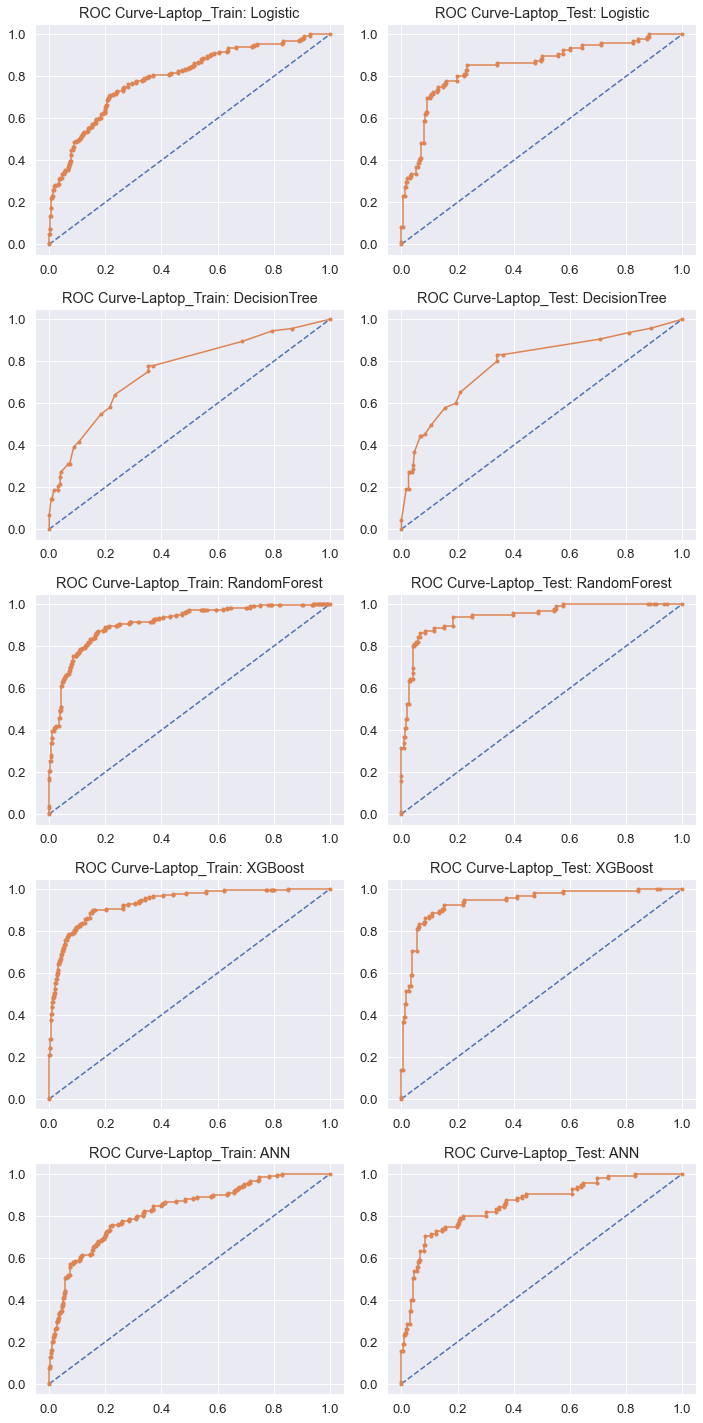

In [202]:
fig, axes = plt.subplots(5,2,figsize=(10,20))
l = [tuned_logi_mob,tuned_dt_mob,tuned_RF_mob,tuned_Xgb_mob,tuned_ANN_mob]
mod = ['Logistic', 'DecisionTree', 'RandomForest', 'XGBoost', 'ANN']
for i,j,k in zip(l,axes,mod):
    fpr_train,tpr_train, thershold_train = metrics.roc_curve(y_laptop_train,i.predict_proba(X_laptop_train_scaled)[:,1])
    j[0].plot([0,1],[0,1],linestyle="--")
    j[0].plot(fpr_train,tpr_train,marker=".")
    j[0].set_title('ROC Curve-Laptop_Train: '+k)
    
    fpr_test,tpr_test, thershold_test = metrics.roc_curve(y_laptop_test,i.predict_proba(X_laptop_test_scaled)[:,1])
    j[1].plot([0,1],[0,1],linestyle="--")
    j[1].plot(fpr_test,tpr_test,marker=".")
    j[1].set_title('ROC Curve-Laptop_Test: '+k)
    plt.tight_layout()
    

#### Mobile Data

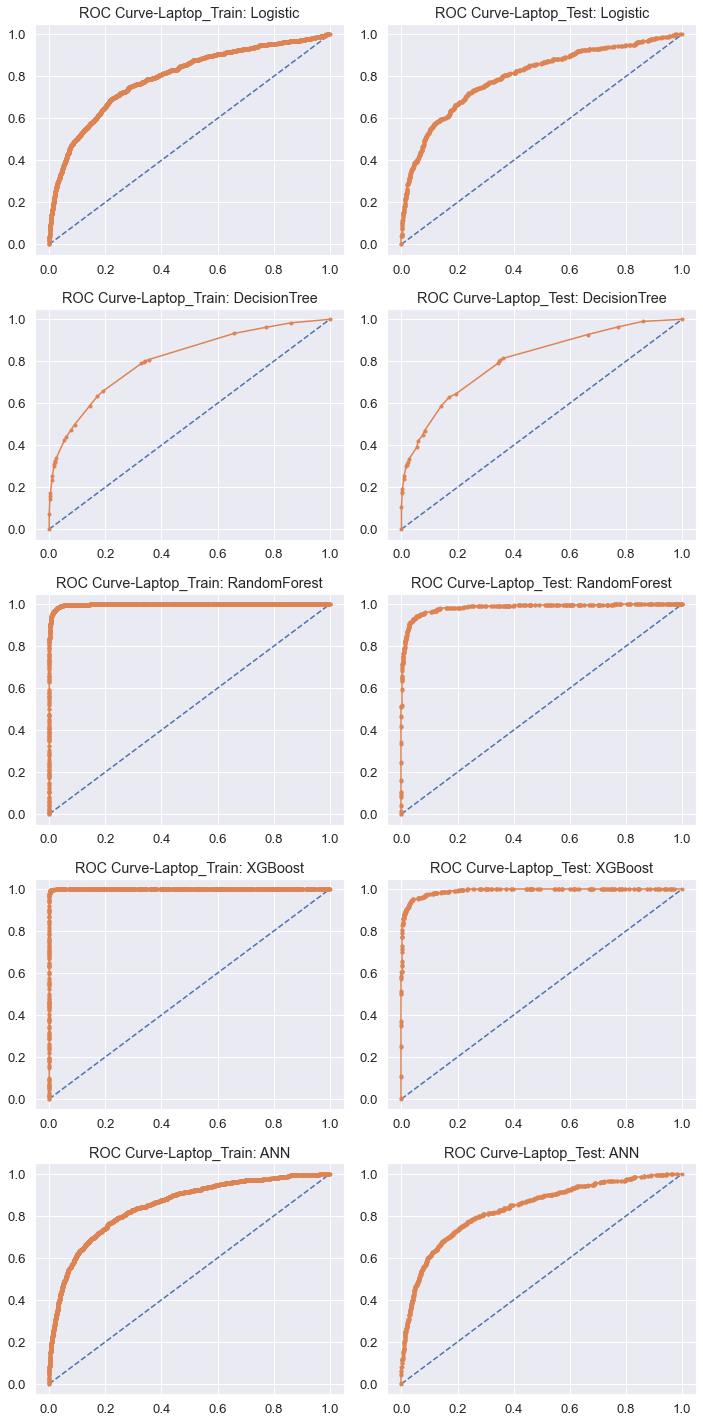

In [203]:
fig, axes = plt.subplots(5,2,figsize=(10,20))
m = [tuned_logi_mob,tuned_dt_mob,tuned_RF_mob,tuned_Xgb_mob,tuned_ANN_mob]
mod = ['Logistic', 'DecisionTree', 'RandomForest', 'XGBoost', 'ANN']
for i,j,k in zip(m,axes,mod):
    fpr_train,tpr_train, thershold_train = metrics.roc_curve(y_mobile_train,i.predict_proba(X_mobile_train_scaled)[:,1])
    j[0].plot([0,1],[0,1],linestyle="--")
    j[0].plot(fpr_train,tpr_train,marker=".")
    j[0].set_title('ROC Curve-Laptop_Train: '+k)
    
    fpr_test,tpr_test, thershold_test = metrics.roc_curve(y_mobile_test,i.predict_proba(X_mobile_test_scaled)[:,1])
    j[1].plot([0,1],[0,1],linestyle="--")
    j[1].plot(fpr_test,tpr_test,marker=".")
    j[1].set_title('ROC Curve-Laptop_Test: '+k)
    plt.tight_layout()

### Cut off Analysis

### Laptop Device

In [204]:
PP_test_model_XGB_laptop = tuned_Xgb_lap.predict_proba(X_laptop_test_scaled)[:,1]
cut_off = list(np.arange(0,1,0.005))
acc = []
rec = []
for i in cut_off:
    pred = np.where(PP_test_model_XGB_laptop>i,1,0)
    acc.append(accuracy_score(y_laptop_test,pred))
    rec.append(recall_score(y_laptop_test,pred,zero_division = 0))
cut_off_analysis_laptop = pd.DataFrame({'Cut_off':cut_off,'Accuracy':acc,'Recall':rec})    
cut_off_analysis_laptop

,Cut_off,Accuracy,Recall
0,0.000,0.285285,1.000000
1,0.005,0.360360,1.000000
2,0.010,0.435435,1.000000
3,0.015,0.465465,1.000000
4,0.020,0.498498,1.000000
...,...,...,...
195,0.975,0.735736,0.073684
196,0.980,0.735736,0.073684
197,0.985,0.732733,0.063158
198,0.990,0.726727,0.042105


In [205]:
(pd.DataFrame(data=tuned_Xgb_lap.predict_proba(X_laptop_test_scaled)).sort_values(by=1,ascending=False))

,0,1
219,0.000890,0.999110
190,0.002431,0.997569
124,0.004319,0.995681
253,0.009811,0.990189
125,0.011182,0.988818
...,...,...
252,0.998425,0.001575
249,0.999000,0.001000
140,0.999033,0.000967
271,0.999033,0.000967


Text(0.5, 1.0, 'Cut-off Analysis - Laptop')

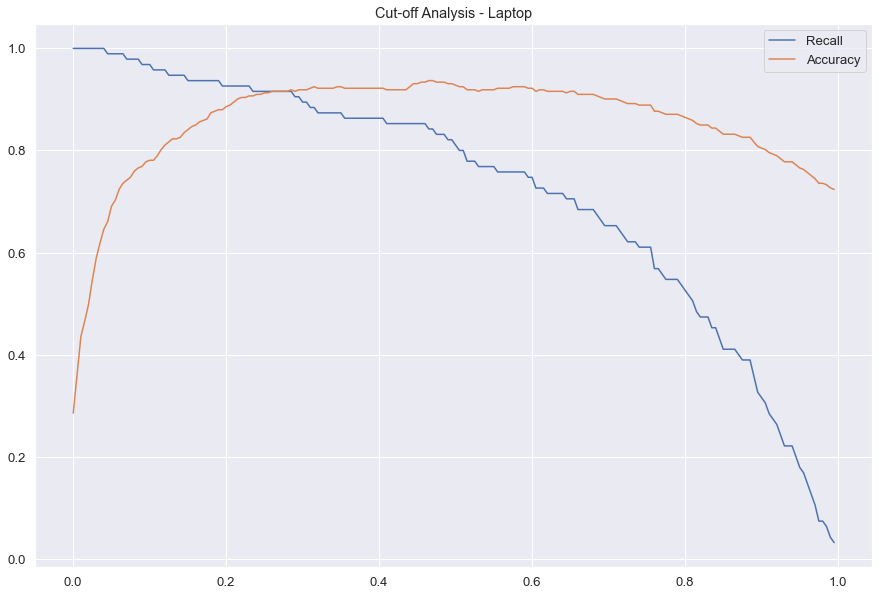

In [206]:
fig,axes = plt.subplots(figsize = (15,10))
plt.plot(cut_off,cut_off_analysis_laptop['Recall'],label='Recall')
plt.plot(cut_off,cut_off_analysis_laptop['Accuracy'],label='Accuracy')
plt.legend()
plt.title('Cut-off Analysis - Laptop')

In [259]:
cut_off_analysis_laptop.sort_values(by=['Accuracy','Recall'],ascending=False).head()


,Cut_off,Accuracy,Recall
93,0.465,0.936937,0.842105
94,0.470,0.936937,0.842105
91,0.455,0.933934,0.852632
92,0.460,0.933934,0.852632
95,0.475,0.933934,0.831579


### Mobile Device

In [208]:
PP_test_model_XGB_mobile = tuned_Xgb_mob.predict_proba(X_mobile_test_scaled)[:,1]
cut_off = list(np.arange(0,1,0.005))
acc = []
rec = []
for i in cut_off:
    pred = np.where(PP_test_model_XGB_mobile>i,1,0)
    acc.append(accuracy_score(y_mobile_test,pred))
    rec.append(recall_score(y_mobile_test,pred,zero_division = 0))
cut_off_analysis_mobile = pd.DataFrame({'Cut_off':cut_off,'Accuracy':acc,'Recall':rec})    
cut_off_analysis_mobile

,Cut_off,Accuracy,Recall
0,0.000,0.154568,1.000000
1,0.005,0.420213,1.000000
2,0.010,0.548185,1.000000
3,0.015,0.620463,1.000000
4,0.020,0.675845,1.000000
...,...,...,...
195,0.975,0.863892,0.119433
196,0.980,0.860763,0.099190
197,0.985,0.857009,0.074899
198,0.990,0.853880,0.054656


In [209]:
(pd.DataFrame(data=tuned_Xgb_mob.predict_proba(X_mobile_test_scaled)).sort_values(by=1,ascending=False))

,0,1
1254,0.000698,0.999302
1641,0.000811,0.999189
3130,0.001058,0.998942
1371,0.001733,0.998267
2579,0.001837,0.998163
...,...,...
1128,0.999891,0.000109
180,0.999902,0.000098
1045,0.999920,0.000080
828,0.999925,0.000075


Text(0.5, 1.0, 'Cut-off Analysis - Mobile Device')

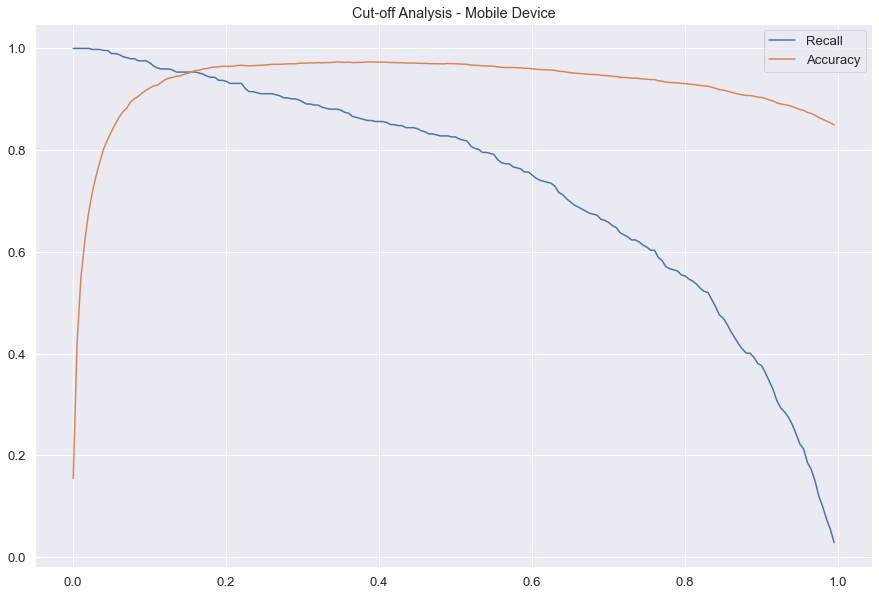

In [210]:
fig,axes = plt.subplots(figsize = (15,10))
plt.plot(cut_off,cut_off_analysis_mobile['Recall'],label='Recall')
plt.plot(cut_off,cut_off_analysis_mobile['Accuracy'],label='Accuracy')
plt.legend()
plt.title('Cut-off Analysis - Mobile Device')

In [260]:
cut_off_analysis_mobile.sort_values(by=['Accuracy','Recall'],ascending=False).head().to_clipboard()


In [212]:
# X_laptop.info()

In [213]:
#Predicted probability for Mobile and Laptop dataset
pred_prob_laptop_model_XGB = tuned_Xgb_lap.predict_proba(X_laptop_test_scaled)[:,1]
pred_prob_mobile_model_XGB = tuned_Xgb_mob.predict_proba(X_mobile_test_scaled)[:,1]

In [214]:
Taken_product_mob = []

for i in range(0,len(pred_prob_mobile_model_XGB)):
    if np.array(pred_prob_mobile_model_XGB)[i]> 0.35:
        a=1
    else:
        a=0
    Taken_product_mob.append(a)

In [215]:
predicted_mobile = X_mobile_test
predicted_mobile['Taken_product'] = Taken_product_mob

/var/folders/pc/78yk54bj3jv7njrr40lv60w80000gn/T/ipykernel_15167/3882393978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_mobile['Taken_product'] = Taken_product_mob


In [216]:
predicted_mobile[predicted_mobile['Taken_product']==1]

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,preferred_location_type_Big Cities,preferred_location_type_Entertainment,preferred_location_type_Financial,preferred_location_type_Game,preferred_location_type_Hill Stations,preferred_location_type_Historical site,preferred_location_type_Medical,preferred_location_type_Movie,preferred_location_type_OTT,preferred_location_type_Other,preferred_location_type_Social media,preferred_location_type_Tour and Travel,preferred_location_type_Trekking,Popularity,Traveller,Taken_product
5727,204.0,45435.0,2,66.0,2435.0,1,1,21.0,0,3,0,13.0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,1
575,405.0,28076.0,4,95.0,5485.0,9,1,11.0,0,2,1,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1
6525,229.0,11941.0,3,55.0,2812.0,6,1,29.0,0,3,1,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,1,1
1806,217.0,11130.0,4,77.0,2119.0,1,1,11.0,0,4,0,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,1
1260,240.0,33355.0,4,65.0,2718.0,2,0,14.0,0,2,0,12.0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,256.0,34628.0,3,48.0,10009.0,9,1,24.0,0,3,1,19.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1
5390,234.0,24643.0,3,103.0,2830.0,9,0,19.0,0,3,0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,1
10216,403.0,40929.0,4,85.0,10494.0,7,1,29.0,0,2,0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1
3067,143.0,18525.0,1,64.0,1718.0,3,1,22.0,0,4,0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,1


In [217]:
Taken_product_lap = []

for i in range(0,len(pred_prob_laptop_model_XGB)):
    if np.array(pred_prob_laptop_model_XGB)[i]> 0.46:
        a=1
    else:
        a=0
    Taken_product_lap.append(a)

In [218]:
predicted_laptop = X_laptop_test
predicted_laptop['Taken_product'] = Taken_product_lap

/var/folders/pc/78yk54bj3jv7njrr40lv60w80000gn/T/ipykernel_15167/1109068630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_laptop['Taken_product'] = Taken_product_lap


In [219]:
predicted_laptop[predicted_laptop['Taken_product']==1]

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,preferred_location_type_Big Cities,preferred_location_type_Entertainment,preferred_location_type_Financial,preferred_location_type_Game,preferred_location_type_Hill Stations,preferred_location_type_Historical site,preferred_location_type_Medical,preferred_location_type_Movie,preferred_location_type_OTT,preferred_location_type_Other,preferred_location_type_Social media,preferred_location_type_Tour and Travel,preferred_location_type_Trekking,Popularity,Traveller,Taken_product
6408,381.0,19676.0,2,56.0,6801.0,3,1,17.0,0,1,1,18.0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1
10582,246.0,15578.0,3,103.0,2857.0,1,0,27.0,0,3,1,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1
6446,365.0,25177.0,2,82.0,6402.0,4,1,23.0,0,4,0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1
11665,254.0,8376.0,2,68.0,2492.0,5,1,26.0,0,1,0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1
8302,239.0,37110.0,3,59.0,2312.0,1,1,23.0,0,1,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9772,242.0,37138.0,3,67.0,2349.0,2,1,25.0,0,1,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1
10837,320.0,32696.0,3,70.0,2814.0,8,1,20.0,0,4,0,16.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3,1
8177,222.0,27062.0,3,46.0,2711.0,1,1,23.0,0,4,1,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1
10904,205.0,31092.0,2,106.0,2431.0,2,1,32.0,0,1,1,9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,1


In [220]:
predicted_laptop['Taken_product'] = predicted_laptop['Taken_product'].astype('object')
predicted_mobile['Taken_product'] = predicted_mobile['Taken_product'].astype('object')

/var/folders/pc/78yk54bj3jv7njrr40lv60w80000gn/T/ipykernel_15167/3839699531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_laptop['Taken_product'] = predicted_laptop['Taken_product'].astype('object')
/var/folders/pc/78yk54bj3jv7njrr40lv60w80000gn/T/ipykernel_15167/3839699531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_mobile['Taken_product'] = predicted_mobile['Taken_product'].astype('object')


In [221]:
# mob_num_cols = predicted_mobile.select_dtypes(['int64','float64']).columns
# mob_cat_cols = predicted_mobile.select_dtypes(['uint8','category']).columns

# lap_num_cols = predicted_laptop.select_dtypes(['int64','float64']).columns
# lap_cat_cols = predicted_laptop.select_dtypes(['uint8','category']).columns

In [222]:
feature_imp_lap = pd.DataFrame(model_XGB_lap.feature_importances_,columns=['Imp'],index=X_laptop.columns).sort_values(by='Imp',ascending=False)
feature_imp_lap[:10]

,Imp
preferred_location_type_Hill Stations,0.315078
travelling_network_rating,0.080222
preferred_location_type_Other,0.062099
Yearly_avg_view_on_travel_page,0.052911
working_flag,0.052687
Daily_Avg_mins_spend_on_traveling_page,0.043039
total_likes_on_outstation_checkin_given,0.039289
Yearly_avg_comment_on_travel_page,0.039037
preferred_location_type_Big Cities,0.037582
Popularity,0.036179


Text(0.5, 1.0, 'Feature Importance for Laptop Model')

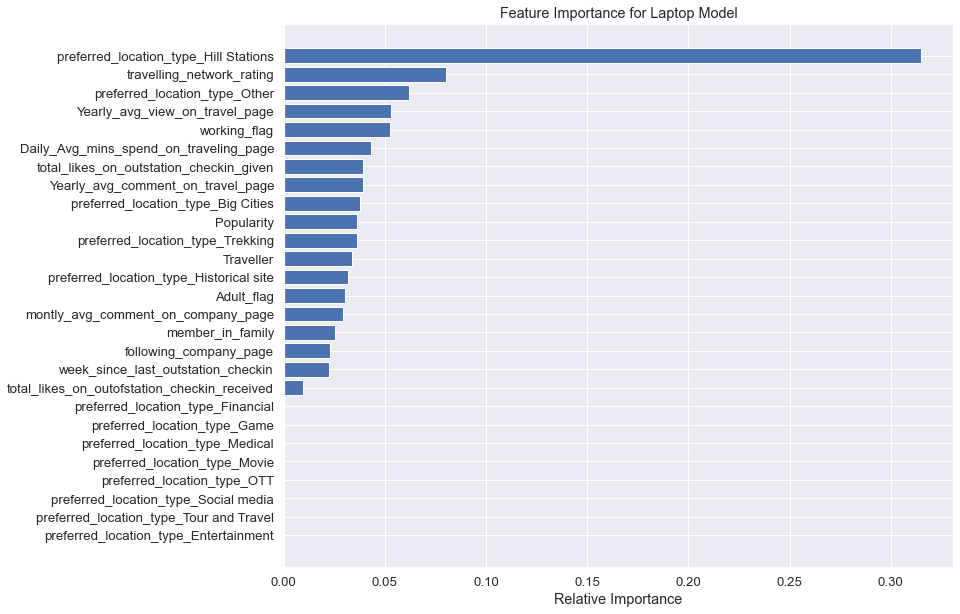

In [223]:
importance = model_XGB_lap.feature_importances_
indices = np.argsort(importance)
feature_names = X_laptop.columns

plt.figure(figsize=(12,10))
plt.barh(range(len(indices)),importance[indices],align='center')
plt.yticks(range(len(indices)),[feature_names[i]for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance for Laptop Model')

In [224]:
feature_imp_mob = pd.DataFrame(model_XGB_mobile.feature_importances_,columns=['Imp'],index=X_mobile.columns).sort_values(by='Imp',ascending=False)
feature_imp_mob[:10]

,Imp
working_flag,0.109565
Daily_Avg_mins_spend_on_traveling_page,0.087562
preferred_location_type_Big Cities,0.080333
travelling_network_rating,0.056700
Yearly_avg_comment_on_travel_page,0.052378
Popularity,0.051539
montly_avg_comment_on_company_page,0.046515
preferred_location_type_Social media,0.045679
Adult_flag,0.043888
preferred_location_type_Entertainment,0.043270


Text(0.5, 1.0, 'Feature Importance for Mobile XGB Model')

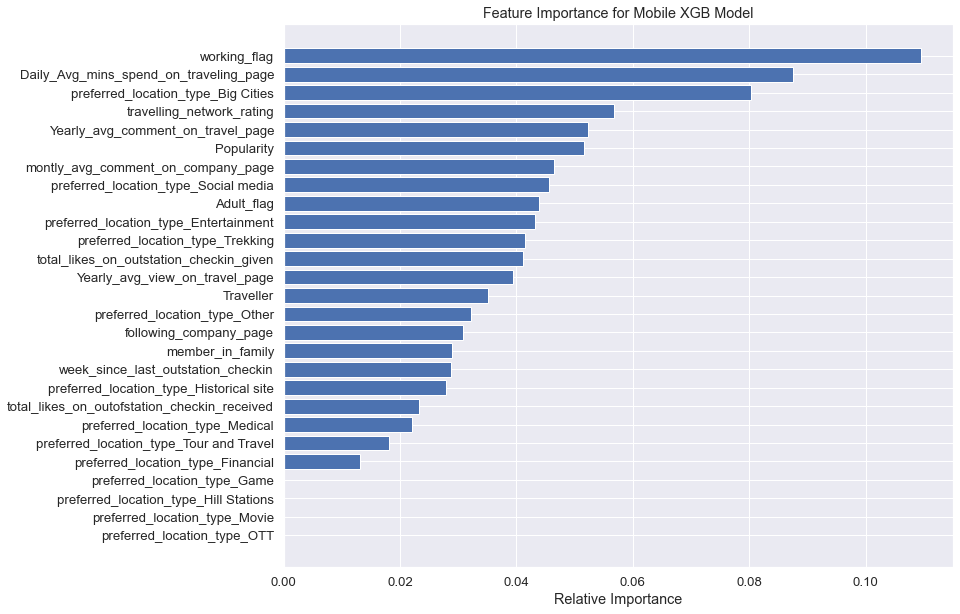

In [225]:
importance = model_XGB_mobile.feature_importances_
indices = np.argsort(importance)
feature_names = X_mobile.columns

plt.figure(figsize=(12,10))
plt.barh(range(len(indices)),importance[indices],align='center')
plt.yticks(range(len(indices)),[feature_names[i]for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance for Mobile XGB Model')

In [226]:
# X_laptop.filter(items=feature_imp_lap[:10].index,axis=1).select_dtypes('int64','float64')

In [227]:
feature_imp_lap.sort_values('Imp',ascending=False)[:10].index

Index(['preferred_location_type_Hill Stations', 'travelling_network_rating',
       'preferred_location_type_Other', 'Yearly_avg_view_on_travel_page',
       'working_flag', 'Daily_Avg_mins_spend_on_traveling_page',
       'total_likes_on_outstation_checkin_given',
       'Yearly_avg_comment_on_travel_page',
       'preferred_location_type_Big Cities', 'Popularity'],
      dtype='object')

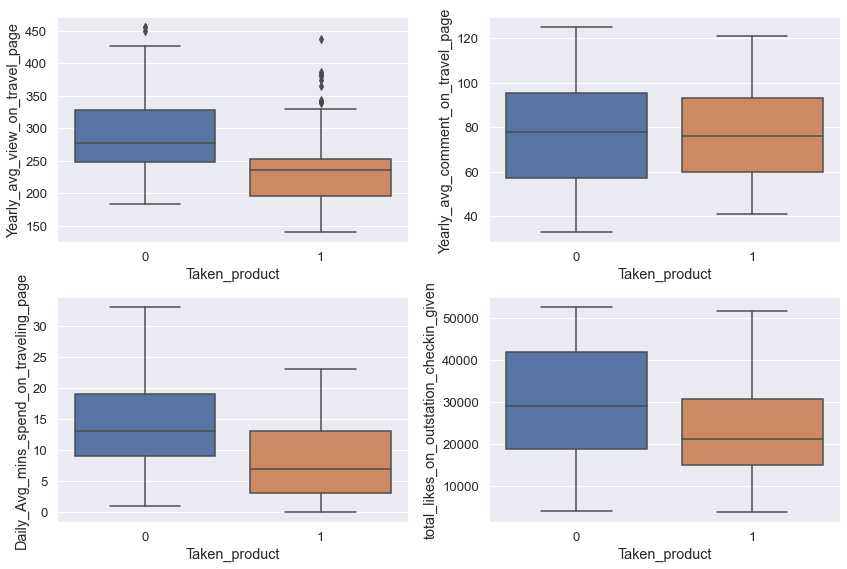

In [228]:
lap_num_cols = ['Yearly_avg_view_on_travel_page','Yearly_avg_comment_on_travel_page',
                        'Daily_Avg_mins_spend_on_traveling_page','total_likes_on_outstation_checkin_given']
fig,axes = plt.subplots(2,2,figsize=(12,8))
for c,a in zip(lap_num_cols,axes.flatten()):
    sns.boxplot(x='Taken_product',y=c,data=predicted_laptop,ax=a)
    plt.tight_layout()

In [229]:
lap_cat_cols = ['preferred_location_type_Hill Stations', 'travelling_network_rating',
       'preferred_location_type_Other','working_flag',
       'preferred_location_type_Big Cities', 'Popularity']
# fig,axes = plt.subplots(3,2,figsize=(17,12))
# for c,a in zip(lap_cat_cols,axes.flatten()):
#     sns.countplot(x=c,hue='Taken_product',data=predicted_laptop,ax=a)
#     plt.tight_layout()

In [230]:
feature_imp_mob.sort_values('Imp',ascending=False)[:10].index

Index(['working_flag', 'Daily_Avg_mins_spend_on_traveling_page',
       'preferred_location_type_Big Cities', 'travelling_network_rating',
       'Yearly_avg_comment_on_travel_page', 'Popularity',
       'montly_avg_comment_on_company_page',
       'preferred_location_type_Social media', 'Adult_flag',
       'preferred_location_type_Entertainment'],
      dtype='object')

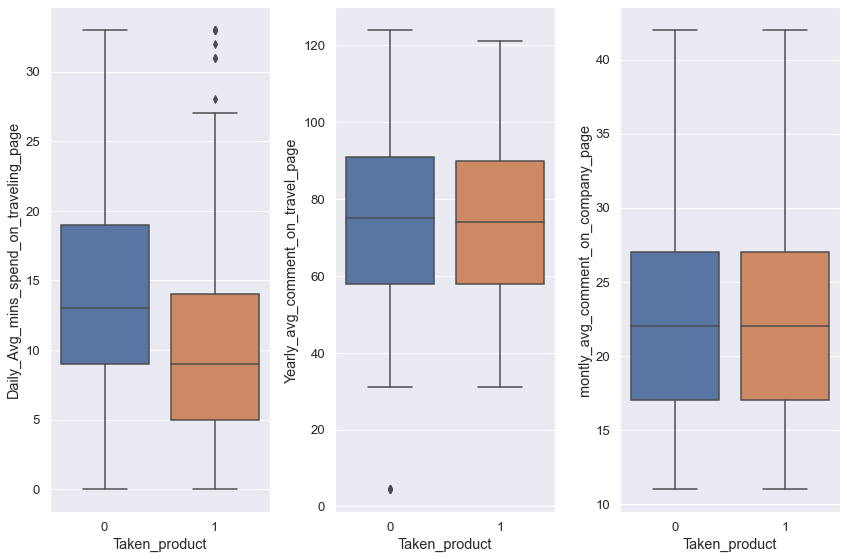

In [231]:
mob_num_cols = ['Daily_Avg_mins_spend_on_traveling_page',
               'Yearly_avg_comment_on_travel_page','montly_avg_comment_on_company_page'
               ]
fig,axes = plt.subplots(1,3,figsize=(12,8))
for c,a in zip(mob_num_cols,axes.flatten()):
    sns.boxplot(x='Taken_product',y=c,data=predicted_mobile,ax=a)
    plt.tight_layout()

In [232]:
mob_cat_cols = ['working_flag','preferred_location_type_Big Cities', 
                'travelling_network_rating','Popularity',
               'preferred_location_type_Social media', 'Adult_flag',
               'preferred_location_type_Entertainment']
# fig,axes = plt.subplots(1,3,figsize=(12,6))
# for c,a in zip(mob_cat_cols,axes.flatten()):
#     sns.countplot(x=c,hue='Taken_product',data=predicted_mobile,ax=a)
#     plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


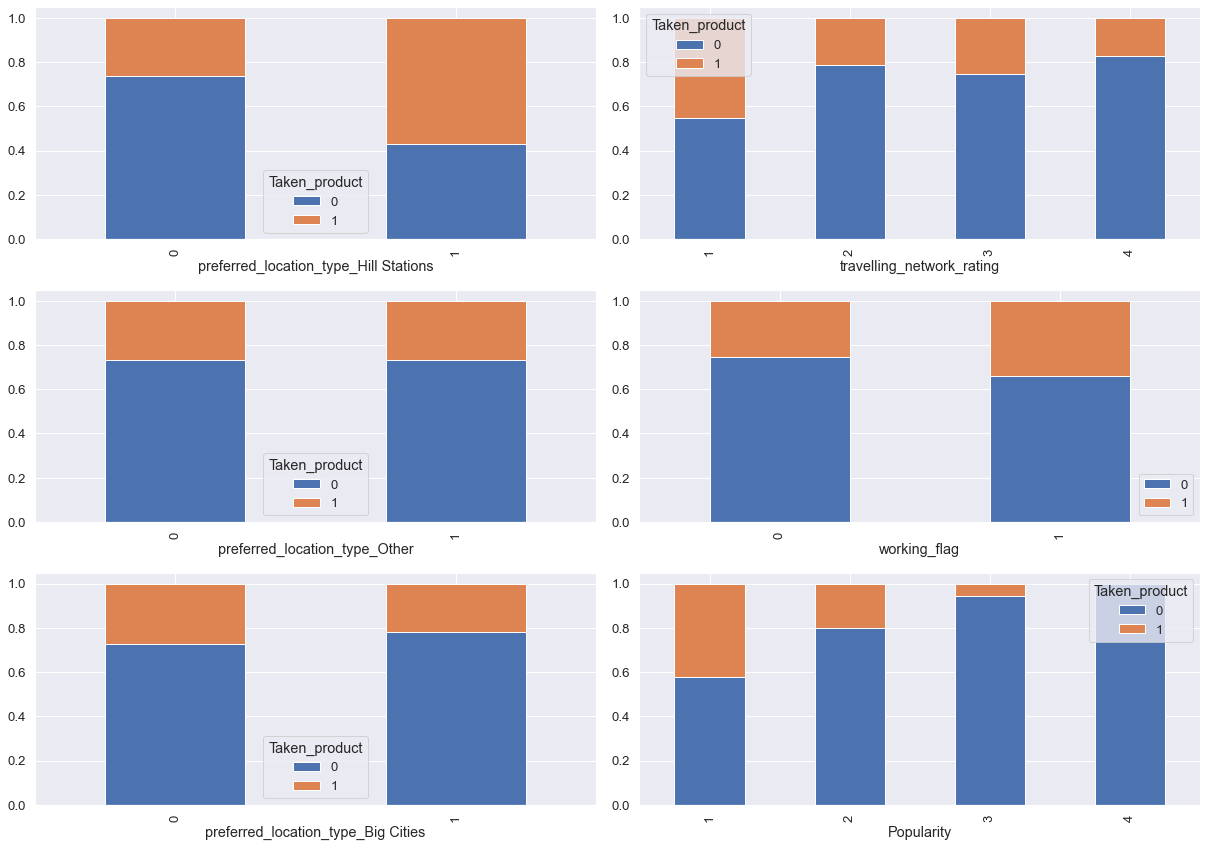

In [233]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(17,12))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
for c,a in zip(lap_cat_cols,axes):
    predicted_laptop.groupby(c)['Taken_product'].value_counts(normalize=True).unstack('Taken_product').plot(ax=a,kind='bar',stacked=True)
    ax4.legend(loc='lower right')
    plt.tight_layout()

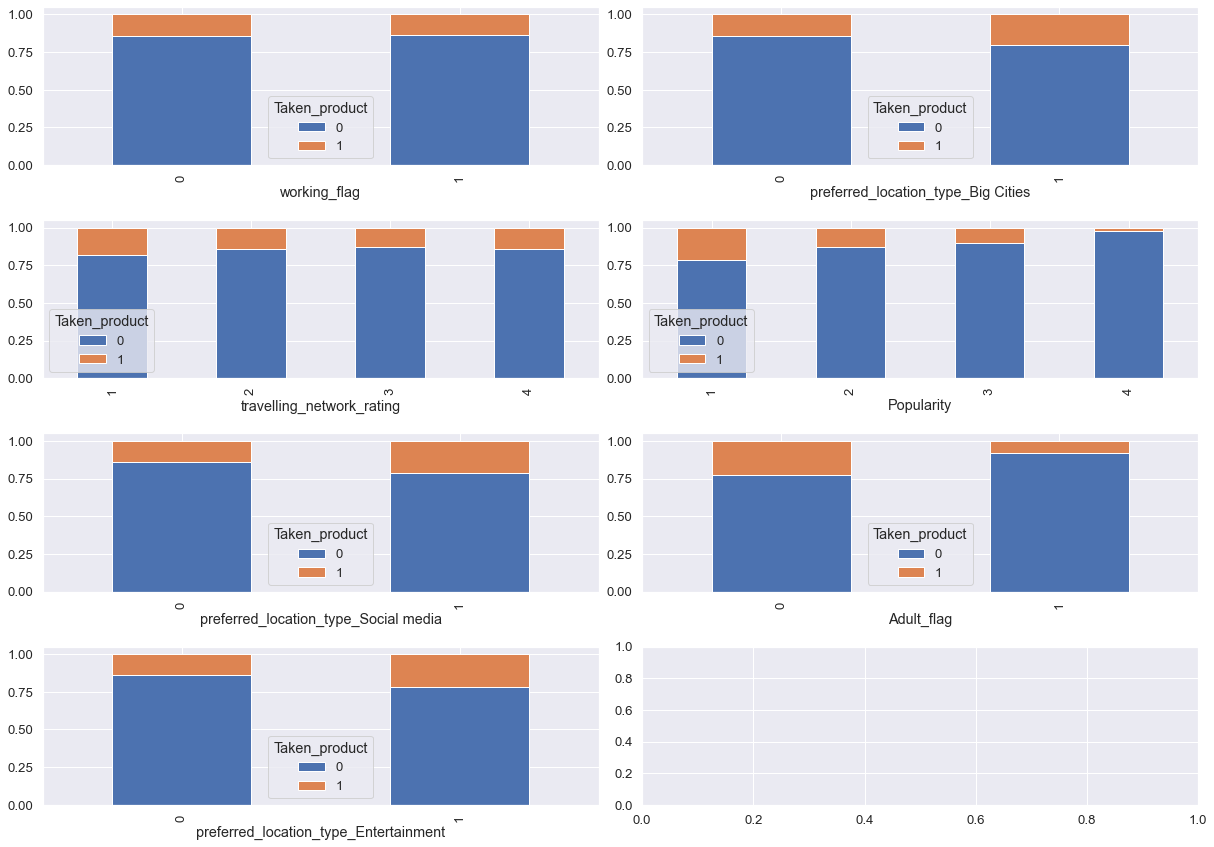

In [234]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(17,12))
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7]
for c,a in zip(mob_cat_cols,axes):
    predicted_mobile.groupby(c)['Taken_product'].value_counts(normalize=True).unstack('Taken_product').plot(ax=a,kind='bar',stacked=True)
    plt.tight_layout()

In [235]:
data_laptop[feature_imp_lap[:10].index]

,preferred_location_type_Hill Stations,travelling_network_rating,preferred_location_type_Other,Yearly_avg_view_on_travel_page,working_flag,Daily_Avg_mins_spend_on_traveling_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,preferred_location_type_Big Cities,Popularity
5881,0,4,0,379.0,1,10.0,9776.0,64.0,0,2
5883,0,3,0,255.0,0,8.0,48725.0,59.0,0,2
5885,0,3,0,250.0,0,8.0,35184.0,84.0,0,2
5888,0,2,0,295.0,1,10.0,7572.0,48.0,0,1
5906,0,2,0,250.0,1,10.0,39379.0,80.0,0,1
...,...,...,...,...,...,...,...,...,...,...
11730,0,2,0,278.0,0,23.0,24127.0,115.0,0,2
11742,0,4,0,388.0,0,14.0,30775.0,109.0,0,3
11746,0,4,0,268.0,0,17.0,42010.0,98.0,0,1
11755,0,3,0,279.0,0,23.0,30987.0,58.0,0,1


In [236]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [237]:
sc = StandardScaler()
data_laptop_scaled = sc.fit_transform(data_laptop[['working_flag','Popularity',
                                                   'travelling_network_rating',
                                                   'preferred_location_type_Hill Stations']])
data_mobile_scaled = sc.fit_transform(data_mobile[['working_flag','Popularity',
                                                   'Adult_flag',
                                                   'preferred_location_type_Entertainment']])

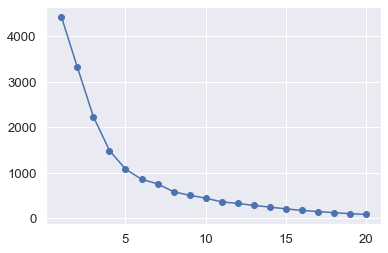

In [238]:
wss = []
for i in range (1,21):
    k_means_lap = KMeans(n_clusters=i,random_state=123)
    k_means_lap.fit(data_laptop_scaled)
    clust = k_means_lap.labels_
    wss.append(k_means_lap.inertia_)
wss_lap = pd.DataFrame(wss,columns=['WSS'])
wss_lap['Number_of_cluster'] = range(1,21)
wss_lap = wss_lap[['Number_of_cluster','WSS']]
plt.plot(wss_lap['Number_of_cluster'],wss_lap['WSS'],marker='o')


In [239]:
# sil_score = []
# for i in range (2,21):
#     k_means_lap = KMeans(n_clusters=i,random_state=123)
#     k_means_lap.fit(data_laptop_scaled)
#     clust = k_means_lap.labels_
#     sil_score.append(silhouette_score(X=data_laptop_scaled,labels=clust))
# plt.plot(range(2,21),sil_score,marker='o')

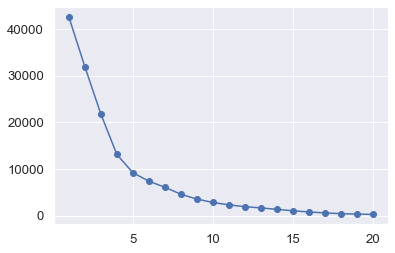

In [240]:
wss = []
shiloutte_score = []
for i in range (1,21):
    k_means_mob = KMeans(n_clusters=i,random_state=123)
    k_means_mob.fit(data_mobile_scaled)
    wss.append(k_means_mob.inertia_)
wss_mob = pd.DataFrame(wss,columns=['WSS'])
wss_mob['Number_of_cluster'] = range(1,21)
wss_mob = wss_mob[['Number_of_cluster','WSS']]
plt.plot(wss_mob['Number_of_cluster'],wss_mob['WSS'],marker='o')

In [241]:
# sil_score = []
# for i in range (2,11):
#     k_means_mob = KMeans(n_clusters=i,random_state=123)
#     k_means_mob.fit(data_mobile_scaled)
#     clust = k_means_mob.labels_
#     sil_score.append(silhouette_score(X=data_mobile_scaled,labels=clust))
# plt.plot(range(2,11),sil_score,marker='o')

In [242]:
k_means_lap = KMeans(n_clusters=4,random_state=123)
k_means_lap.fit(data_laptop_scaled)
labels_lap = k_means_lap.fit_predict(data_laptop_scaled)

k_means_mob = KMeans(n_clusters=4,random_state=123)
k_means_mob.fit(data_mobile_scaled)
labels_mob = k_means_mob.fit_predict(data_mobile_scaled)

In [243]:
data_laptop_copy = data_laptop.copy()
data_laptop_copy['cluster'] = labels_lap
data_laptop_copy['cluster'] = data_laptop_copy['cluster'].map({0: 'Cluster-1',
                                                              1 : 'Cluster-2',
                                                              2 : 'Cluster-3',
                                                              3 : 'Cluster-4'
                                                            })
data_laptop_copy

,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,preferred_location_type_Big Cities,preferred_location_type_Entertainment,preferred_location_type_Financial,preferred_location_type_Game,preferred_location_type_Hill Stations,preferred_location_type_Historical site,preferred_location_type_Medical,preferred_location_type_Movie,preferred_location_type_OTT,preferred_location_type_Other,preferred_location_type_Social media,preferred_location_type_Tour and Travel,preferred_location_type_Trekking,Popularity,Traveller,cluster
5881,0,379.0,9776.0,1,64.0,5142.0,1,0,33.0,1,4,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,Cluster-3
5883,0,255.0,48725.0,4,59.0,2913.0,1,1,19.0,0,3,0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,Cluster-2
5885,0,250.0,35184.0,2,84.0,3074.0,0,0,23.0,0,3,0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,Cluster-2
5888,0,295.0,7572.0,3,48.0,9532.0,0,0,33.0,1,2,0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,Cluster-3
5906,1,250.0,39379.0,1,80.0,3926.0,1,1,33.0,1,2,0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,Cluster-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11730,0,278.0,24127.0,2,115.0,5184.0,7,0,35.0,0,2,1,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,Cluster-1
11742,1,388.0,30775.0,4,109.0,6787.0,8,0,29.0,0,4,1,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,Cluster-2
11746,0,268.0,42010.0,4,98.0,5753.0,2,1,34.0,0,4,1,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,Cluster-2
11755,0,279.0,30987.0,2,58.0,2616.0,4,0,36.0,0,3,1,23.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3,Cluster-2


In [244]:
data_laptop_copy['cluster'].value_counts()

Cluster-2    580
Cluster-1    324
Cluster-3    180
Cluster-4     24
Name: cluster, dtype: int64

In [245]:
cluster_lap = data_laptop_copy[['Popularity', 'preferred_location_type_Hill Stations', 
                                'working_flag', 'travelling_network_rating',
            #'Yearly_avg_view_on_travel_page', 'Yearly_avg_comment_on_travel_page', 
            #'week_since_last_outstation_checkin', 'Daily_Avg_mins_spend_on_traveling_page', 
            #'montly_avg_comment_on_company_page',
                           'Taken_product','cluster']]

In [246]:
cluster_lap.groupby('cluster')['Taken_product'].value_counts(normalize=True)

cluster    Taken_product
Cluster-1  0                0.716049
           1                0.283951
Cluster-2  0                0.779310
           1                0.220690
Cluster-3  0                0.755556
           1                0.244444
Cluster-4  0                0.500000
           1                0.500000
Name: Taken_product, dtype: float64

In [262]:
pd.pivot_table(data=cluster_lap,index='cluster',sort=True)

,Popularity,Taken_product,preferred_location_type_Hill Stations,travelling_network_rating,working_flag
cluster,,,,,
Cluster-1,1.768519,0.283951,0,1.493827,0.000000
Cluster-2,1.741379,0.220690,0,3.531034,0.000000
Cluster-3,1.888889,0.244444,0,2.644444,1.000000
Cluster-4,1.666667,0.500000,1,2.833333,0.166667


In [248]:
data_mobile_copy = data_mobile.copy()
data_mobile_copy['cluster'] = labels_mob
data_mobile_copy['cluster'] = data_mobile_copy['cluster'].map({0: 'Cluster-1',
                                                              1 : 'Cluster-2',
                                                              2 : 'Cluster-3',
                                                              3 : 'Cluster-4'})
data_mobile_copy

,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,preferred_location_type_Big Cities,preferred_location_type_Entertainment,preferred_location_type_Financial,preferred_location_type_Game,preferred_location_type_Hill Stations,preferred_location_type_Historical site,preferred_location_type_Medical,preferred_location_type_Movie,preferred_location_type_OTT,preferred_location_type_Other,preferred_location_type_Social media,preferred_location_type_Tour and Travel,preferred_location_type_Trekking,Popularity,Traveller,cluster
0,1,307.0,38570.0,2,94.0,5993.0,8,1,11.0,0,1,0,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1,Cluster-2
1,0,367.0,9765.0,1,61.0,5130.0,1,0,23.0,1,4,1,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1,Cluster-4
2,1,277.0,48055.0,2,92.0,2090.0,6,1,15.0,0,2,0,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,Cluster-2
3,0,247.0,48720.0,4,56.0,2909.0,1,1,11.0,0,3,0,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,Cluster-2
4,0,202.0,20685.0,1,40.0,3468.0,9,0,12.0,0,4,1,6.0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1,Cluster-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11753,0,247.0,11418.0,3,99.0,9983.0,1,0,28.0,0,2,0,16.0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,Cluster-2
11754,0,210.0,40886.0,3,53.0,3024.0,2,0,32.0,0,4,0,14.0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,2,Cluster-2
11756,0,305.0,21510.0,1,55.0,10041.0,4,0,30.0,0,1,1,11.0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,Cluster-1
11757,0,214.0,5478.0,3,103.0,6203.0,3,1,40.0,1,2,1,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,Cluster-4


In [249]:
data_mobile_copy['cluster'].value_counts()

Cluster-1    4838
Cluster-2    3741
Cluster-4    1557
Cluster-3     516
Name: cluster, dtype: int64

In [250]:
feature_imp_mob[:10].index

Index(['working_flag', 'Daily_Avg_mins_spend_on_traveling_page',
       'preferred_location_type_Big Cities', 'travelling_network_rating',
       'Yearly_avg_comment_on_travel_page', 'Popularity',
       'montly_avg_comment_on_company_page',
       'preferred_location_type_Social media', 'Adult_flag',
       'preferred_location_type_Entertainment'],
      dtype='object')

In [251]:
cluster_mob = data_mobile_copy[['working_flag','Popularity','Adult_flag',
                                'preferred_location_type_Entertainment',
                          # 'montly_avg_comment_on_company_page', 'following_company_page',
                           #'total_likes_on_outstation_checkin_given',
                           #'preferred_location_type_Tour and Travel', 'Adult_flag',
                           'Taken_product','cluster']]

In [252]:
cluster_mob.groupby('cluster')['Taken_product'].value_counts(normalize=True)

cluster    Taken_product
Cluster-1  0                0.905746
           1                0.094254
Cluster-2  0                0.782678
           1                0.217322
Cluster-3  0                0.761628
           1                0.238372
Cluster-4  0                0.853565
           1                0.146435
Name: Taken_product, dtype: float64

In [264]:
pd.pivot_table(data=cluster_mob,index='cluster',sort=True)

,Adult_flag,Popularity,Taken_product,preferred_location_type_Entertainment,working_flag
cluster,,,,,
Cluster-1,1.000000,1.986771,0.094254,0,0.000000
Cluster-2,0.000000,1.942529,0.217322,0,0.000000
Cluster-3,0.569767,2.091085,0.238372,1,0.129845
Cluster-4,0.614001,1.921002,0.146435,0,1.000000


## Business Insights

### Laptop Devices
For the users who prefers Laptop devices, we shall target the below customers with the digital advertisment as they may tend to convert as a potention customer:

- Users who **following_company_page**, **preferred_location_type_as_hill_station** and are frequent **Traveller** (*has higher yearly_avg_outstation_checkins*) has the higher propensity to take the product.
- User who are **working** also has a very slight significant toward preferring the company's product.
- However, users who are **not Adult**, who has **less popularity** with **less number of total_likes_on_outofstation_received** are also has significance in taking the company's product.

### Mobile Devices
For the users who prefers Laptop devices, we shall target the below customers with the digital advertisment as they may tend to convert as a potention customer:

- Users who **following_company_page**, **preferred_location_type_as_hill_station** and are frequent **Traveller** (*has higher yearly_avg_outstation_checkins*) has the higher propensity to take the product.
- User who are **working** also has a very slight significant toward preferring the company's product.
- However, users who are **not Adult**, who has **less popularity** with **less number of total_likes_on_outofstation_received** are also has significance in taking the company's product.

Overall the most significant variables to concentrate shall be **following_company_page**, **working_flag**,**Adult_flag**, **Traveller** and **Popularity**

Also with the newly created variables **Popularity** and **Traveller** we can easily cluster the customers to target for the digital marketing.